In [1]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results from Illinois State Board of Elections(https://www.elections.il.gov/ElectionOperations/ElectionVoteTotals.aspx)

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The following counties used maps sourced from the respective county governments instead: DuPage, Kane, Kendall, Will.

Some counties used the Census Redistricting shapefiles as a starting point, but were corrected using PDF maps to reverse changes made since 2016. These include Champaign, Greene, Hancock, Kane, Knox, LaSalle, Lawrence, Mason, St. Clair, Will, and Winnebago Counties.

Countywide votes were distributed for Coles, Knox, Macon, McDonough, Tazewell. It was just a single vote in each of Knox, Macon, Tazewell; 3 votes in McDonough; and 30 votes in Coles.

The SBOE results do not include write-in votes by precinct for 42 counties. For these counties the write-in votes by precinct are transcribed from the official county or city canvass reports.

- G16PREDCLI - Hillary Clinton (Democratic Party)
- G16PRERTRU - Donald J. Trump (Republican Party)
- G16PRELJOH - Gary Johnson (Libertarian Party)
- G16PREGSTE - Jill Stein (Green Party)
- G16PREOWRI - Write-in Votes


- G16USSDDUC - Tammy Duckworth (Democratic Party)
- G16USSRKIR - Mark Steven Kirk (Republican Party)
- G16USSLMCM - Kenton McMillen (Libertarian Party)
- G16USSGSUM - Scott Summers (Green Party)
- G16USSOWRI - Write-in Votes


- G16COMDMEN - Susana Mendoza (Democratic Party)
- G16COMRMUN - Leslie Geissler Munger (Republican Party)
- G16COMLBAL - Claire Ball (Libertarian Party)
- G16COMGCUR - Tim Curtin (Green Party)


## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/il_2016/il_2016.shp")

In [3]:
vest_shp.shape

(10090, 17)

In [4]:
vest_shp.head(1)

,COUNTYFP,NAME,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI,G16USSDDUC,G16USSRKIR,G16USSLMCM,G16USSGSUM,G16USSOWRI,G16COMDMEN,G16COMRMUN,G16COMLBAL,G16COMGCUR,geometry
0,001,CLAYTON 1,76,359,10,1,2,175,260,5,7,0,117,299,10,9,"POLYGON Z ((-91.03099 40.01947 0.00000, -91.03..."


<AxesSubplot:>

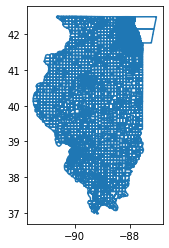

In [5]:
vest_shp.boundary.plot()

In [6]:
races = [x for x in vest_shp.columns if "G16" in x]

# Loading, Combining Election Results

## Load County Fips File

In [7]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Illinois"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

## Presidential Results

In [8]:
pres_results = pd.read_csv('./raw-from-source/SOS/51-120-PRESIDENT AND VICE PRESIDENT-2016GE.csv')
pres_results.head()

,JurisdictionID,JurisContainerID,JurisName,EISCandidateID,CandidateName,EISContestID,ContestName,PrecinctName,Registration,EISPartyID,PartyName,VoteCount
0,87,0,STARK,150,DONALD J. TRUMP,120,PRESIDENT AND VICE PRESIDENT,GOSHEN,516,12,REPUBLICAN,237
1,87,0,STARK,150,DONALD J. TRUMP,120,PRESIDENT AND VICE PRESIDENT,VALLEY,196,12,REPUBLICAN,111
2,54,0,LOGAN,5010,JILL STEIN,120,PRESIDENT AND VICE PRESIDENT,EAST LINCOLN 5,1158,13,GREEN,8
3,54,0,LOGAN,5010,JILL STEIN,120,PRESIDENT AND VICE PRESIDENT,WEST LINCOLN 2,512,13,GREEN,4
4,54,0,LOGAN,5015,GARY JOHNSON,120,PRESIDENT AND VICE PRESIDENT,AETNA,346,19,LIBERTARIAN,10


In [9]:
pres_results = pres_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
pres_results.reset_index(inplace = True)
pres_results.head()

JurisdictionID JurisName      PrecinctName  \
ContestName                                                
CandidateName                                              
0                          1     ADAMS           BEVERLY   
1                          1     ADAMS            BURTON   
2                          1     ADAMS  CAMP POINT PCT 1   
3                          1     ADAMS  CAMP POINT PCT 2   
4                          1     ADAMS           CLAYTON   

                                 VoteCount               \
ContestName   PRESIDENT AND VICE PRESIDENT                
CandidateName              DONALD J. TRUMP GARY JOHNSON   
0                                    150.0          2.0   
1                                    455.0          9.0   
2                                    331.0         12.0   
3                                    376.0          9.0   
4                                    359.0         10.0   

                                                                            
ContestName                                                                 
CandidateName HILLARY RODHAM CLINTON JILL STEIN WRITE-IN Write-In Write-in  
0                               18.0        1.0      NaN      NaN      NaN  
1                               60.0        3.0      NaN      NaN      NaN  
2                               69.0        3.0      NaN      NaN      NaN  
3                               47.0        2.0      NaN      NaN      NaN  
4                               76.0        1.0      NaN      NaN      NaN

In [10]:
pres_results.columns = ['JurisdictionID','JurisName','PrecinctName','G16PRERTRU','G16PRELJOH','G16PREDCLI','G16PREGSTE','wi1','wi2','wi3']
pres_results.head()

,JurisdictionID,JurisName,PrecinctName,G16PRERTRU,G16PRELJOH,G16PREDCLI,G16PREGSTE,wi1,wi2,wi3
0,1,ADAMS,BEVERLY,150.0,2.0,18.0,1.0,NaN,NaN,NaN
1,1,ADAMS,BURTON,455.0,9.0,60.0,3.0,NaN,NaN,NaN
2,1,ADAMS,CAMP POINT PCT 1,331.0,12.0,69.0,3.0,NaN,NaN,NaN
3,1,ADAMS,CAMP POINT PCT 2,376.0,9.0,47.0,2.0,NaN,NaN,NaN
4,1,ADAMS,CLAYTON,359.0,10.0,76.0,1.0,NaN,NaN,NaN


In [11]:
pres_results['G16PREOWRI'] = pres_results.fillna(0)['wi1'] + pres_results.fillna(0)['wi2'] + pres_results.fillna(0)['wi3']
pres_results['G16PREOWRI'].sum()

50269.0

In [12]:
pres_results.drop(columns = ['wi1','wi2','wi3'], inplace = True)

## U.S. Senate Results

In [13]:
uss = pd.read_csv('./raw-from-source/SOS/51-160-UNITED STATES SENATOR-2016GE.csv')
uss = uss.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
uss.reset_index(inplace = True)
uss.head()

JurisdictionID JurisName      PrecinctName  \
ContestName                                                
CandidateName                                              
0                          1     ADAMS           BEVERLY   
1                          1     ADAMS            BURTON   
2                          1     ADAMS  CAMP POINT PCT 1   
3                          1     ADAMS  CAMP POINT PCT 2   
4                          1     ADAMS           CLAYTON   

                          VoteCount                                 \
ContestName   UNITED STATES SENATOR                                  
CandidateName       KENTON McMILLEN MARK STEVEN KIRK SCOTT SUMMERS   
0                               0.0            111.0           2.0   
1                              15.0            336.0           6.0   
2                              12.0            267.0           9.0   
3                               7.0            296.0           6.0   
4                               5.0            260.0           7.0   

                                                          
ContestName                                               
CandidateName TAMMY DUCKWORTH WRITE-IN Write-In Write-in  
0                        53.0      NaN      NaN      NaN  
1                       170.0      NaN      NaN      NaN  
2                       118.0      NaN      NaN      NaN  
3                       118.0      NaN      NaN      NaN  
4                       175.0      NaN      NaN      NaN

In [14]:
uss.columns = ['JurisdictionID','JurisName','PrecinctName','G16USSLMCM','G16USSRKIR','G16USSGSUM','G16USSDDUC','wi1','wi2','wi3']
uss['G16USSOWRI'] = uss.fillna(0)['wi1'] + uss.fillna(0)['wi2'] + uss.fillna(0)['wi3']
uss['G16USSOWRI'].sum()

4998.0

In [15]:
uss.drop(columns = ['wi1','wi2','wi3'], inplace = True)
uss.head()

,JurisdictionID,JurisName,PrecinctName,G16USSLMCM,G16USSRKIR,G16USSGSUM,G16USSDDUC,G16USSOWRI
0,1,ADAMS,BEVERLY,0.0,111.0,2.0,53.0,0.0
1,1,ADAMS,BURTON,15.0,336.0,6.0,170.0,0.0
2,1,ADAMS,CAMP POINT PCT 1,12.0,267.0,9.0,118.0,0.0
3,1,ADAMS,CAMP POINT PCT 2,7.0,296.0,6.0,118.0,0.0
4,1,ADAMS,CLAYTON,5.0,260.0,7.0,175.0,0.0


## Comptroller Results

In [16]:
com_results = pd.read_csv('./raw-from-source/SOS/51-210-COMPTROLLER-2016GE.csv')
com_results = com_results.pivot_table(index = ['JurisdictionID','JurisName','PrecinctName'],
                         columns = ['ContestName','CandidateName'],
                        values = ['VoteCount'],
                         aggfunc = 'sum')
com_results.reset_index(inplace = True)
com_results.head()

JurisdictionID JurisName      PrecinctName   VoteCount  \
ContestName                                              COMPTROLLER   
CandidateName                                            CLAIRE BALL   
0                          1     ADAMS           BEVERLY         3.0   
1                          1     ADAMS            BURTON        14.0   
2                          1     ADAMS  CAMP POINT PCT 1         9.0   
3                          1     ADAMS  CAMP POINT PCT 2        10.0   
4                          1     ADAMS           CLAYTON        10.0   

                                                                
ContestName                                                     
CandidateName LESLIE GEISSLER MUNGER SUSANA MENDOZA TIM CURTIN  
0                              118.0           40.0        4.0  
1                              382.0          113.0        7.0  
2                              294.0           94.0       12.0  
3                              309.0           97.0        7.0  
4                              299.0          117.0        9.0

In [17]:
com_results.columns = ['JurisdictionID','JurisName','PrecinctName','G16COMLBAL','G16COMRMUN','G16COMDMEN','G16COMGCUR']
com_results.head()

,JurisdictionID,JurisName,PrecinctName,G16COMLBAL,G16COMRMUN,G16COMDMEN,G16COMGCUR
0,1,ADAMS,BEVERLY,3.0,118.0,40.0,4.0
1,1,ADAMS,BURTON,14.0,382.0,113.0,7.0
2,1,ADAMS,CAMP POINT PCT 1,9.0,294.0,94.0,12.0
3,1,ADAMS,CAMP POINT PCT 2,10.0,309.0,97.0,7.0
4,1,ADAMS,CLAYTON,10.0,299.0,117.0,9.0


## Combine Results

In [18]:
election_results = pres_results.merge(uss, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False).merge(com_results, how = 'outer', on = ['JurisName','PrecinctName'], 
                                     indicator = False)

In [19]:
election_results.columns

Index(['JurisdictionID_x', 'JurisName', 'PrecinctName', 'G16PRERTRU',
       'G16PRELJOH', 'G16PREDCLI', 'G16PREGSTE', 'G16PREOWRI',
       'JurisdictionID_y', 'G16USSLMCM', 'G16USSRKIR', 'G16USSGSUM',
       'G16USSDDUC', 'G16USSOWRI', 'JurisdictionID', 'G16COMLBAL',
       'G16COMRMUN', 'G16COMDMEN', 'G16COMGCUR'],
      dtype='object')

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(election_results[['JurisName']].drop_duplicates())

                    JurisName
0                       ADAMS
74                  ALEXANDER
85                       BOND
111                     BOONE
150                     BROWN
164                    BUREAU
215                   CALHOUN
222                   CARROLL
245                      CASS
267                 CHAMPAIGN
385                 CHRISTIAN
416                     CLARK
440                      CLAY
462                   CLINTON
501                     COLES
546                      COOK
2145                 CRAWFORD
2170               CUMBERLAND
2183                   DeKALB
2248                   DeWITT
2272                  DOUGLAS
2290                   DuPAGE
3159                    EDGAR
3191                  EDWARDS
3203                EFFINGHAM
3240                  FAYETTE
3271                     FORD
3294                 FRANKLIN
3329                   FULTON
3387                 GALLATIN
3398                   GREENE
3421                   GRUNDY
3462      

Going to only validate the election result totals for now, and not deal with assigning counties to cities that split counties and distributing county wide votes. 

# Validating Election Results

In [21]:
vest_shp.columns

Index(['COUNTYFP', 'NAME', 'G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH',
       'G16PREGSTE', 'G16PREOWRI', 'G16USSDDUC', 'G16USSRKIR', 'G16USSLMCM',
       'G16USSGSUM', 'G16USSOWRI', 'G16COMDMEN', 'G16COMRMUN', 'G16COMLBAL',
       'G16COMGCUR', 'geometry'],
      dtype='object')

In [22]:
data_columns = ['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH',
       'G16PREGSTE', 'G16PREOWRI', 'G16USSDDUC', 'G16USSRKIR', 'G16USSLMCM',
       'G16USSGSUM', 'G16USSOWRI', 'G16COMDMEN', 'G16COMRMUN', 'G16COMLBAL',
       'G16COMGCUR']

def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (partner_df[race].sum()- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(partner_df[race].sum()-source_df[race].sum())+" votes")
            print("\tVEST: "+str(partner_df[race].sum())+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(partner_df[race].sum()))


In [23]:
statewide_totals_check(vest_shp,election_results,data_columns)

***Statewide Totals Check***
G16PREDCLI is equal 	VEST / RDH: 3090729
G16PRERTRU is equal 	VEST / RDH: 2146015
G16PRELJOH is equal 	VEST / RDH: 209596
G16PREGSTE is equal 	VEST / RDH: 76802
G16PREOWRI has a difference of 16514.0 votes
	VEST: 66783 votes
	SOURCES: 50269.0 votes
G16USSDDUC is equal 	VEST / RDH: 3012940
G16USSRKIR is equal 	VEST / RDH: 2184692
G16USSLMCM is equal 	VEST / RDH: 175988
G16USSGSUM is equal 	VEST / RDH: 117619
G16USSOWRI has a difference of 1769.0 votes
	VEST: 6767 votes
	SOURCES: 4998.0 votes
G16COMDMEN is equal 	VEST / RDH: 2676244
G16COMRMUN is equal 	VEST / RDH: 2404723
G16COMLBAL is equal 	VEST / RDH: 187017
G16COMGCUR is equal 	VEST / RDH: 144559


We expect these differences, because VEST notes that:
> The SBOE results do not include write-in votes by precinct for 42 counties. For these counties the write-in votes by precinct are transcribed from the official county or city canvass reports.

Write-in votes are also not reported on the [Election Results SOS page](https://www.elections.il.gov/ElectionOperations/ElectionVoteTotals.aspx?ID=MdSiWa1xQus%3d&OfficeType=%2brBqro%2b%2bHTUkQvv7Q1tDdQ%3d%3d&T=637614273441665480). 

Checking [Ballotpedia](https://ballotpedia.org/Illinois_elections,_2016) and they also show incorrect write-in votes that are far below the SOS files that we downloaded. 

At this time we will not check the 42 counties that VEST is referring to. 

In [24]:
#There are 6 cities referenced here
print(election_results['JurisName'].unique())

['ADAMS' 'ALEXANDER' 'BOND' 'BOONE' 'BROWN' 'BUREAU' 'CALHOUN' 'CARROLL'
 'CASS' 'CHAMPAIGN' 'CHRISTIAN' 'CLARK' 'CLAY' 'CLINTON' 'COLES' 'COOK'
 'CRAWFORD' 'CUMBERLAND' 'DeKALB' 'DeWITT' 'DOUGLAS' 'DuPAGE' 'EDGAR'
 'EDWARDS' 'EFFINGHAM' 'FAYETTE' 'FORD' 'FRANKLIN' 'FULTON' 'GALLATIN'
 'GREENE' 'GRUNDY' 'HAMILTON' 'HANCOCK' 'HARDIN' 'HENDERSON' 'HENRY'
 'IROQUOIS' 'JACKSON' 'JASPER' 'JEFFERSON' 'JERSEY' 'JoDAVIESS' 'JOHNSON'
 'KANE' 'KANKAKEE' 'KENDALL' 'KNOX' 'LAKE' 'LaSALLE' 'LAWRENCE' 'LEE'
 'LIVINGSTON' 'LOGAN' 'MACON' 'MACOUPIN' 'MADISON' 'MARION' 'MARSHALL'
 'MASON' 'MASSAC' 'McDONOUGH' 'McHENRY' 'McLEAN' 'MENARD' 'MERCER'
 'MONROE' 'MONTGOMERY' 'MORGAN' 'MOULTRIE' 'OGLE' 'PEORIA' 'PERRY' 'PIATT'
 'PIKE' 'POPE' 'PULASKI' 'PUTNAM' 'RANDOLPH' 'RICHLAND' 'ROCK ISLAND'
 'SALINE' 'SANGAMON' 'SCHUYLER' 'SCOTT' 'SHELBY' 'STARK' 'ST. CLAIR'
 'STEPHENSON' 'TAZEWELL' 'UNION' 'VERMILION' 'WABASH' 'WARREN'
 'WASHINGTON' 'WAYNE' 'WHITE' 'WHITESIDE' 'WILL' 'WILLIAMSON' 'WINNEBAGO'
 'WOODFORD' 

## County-by-County Check

Note: The source election results do not contain county assignments for every precinct, and due to split municipalities, we are unable to create the county assignments without shapefile analysis. As a result, we will map VEST's shapefile assignments and check against an official county map

In [25]:
il_county = gp.read_file("./raw-from-source/Census_Maps/cb_2018_us_county_5m/cb_2018_us_county_5m.shp")

In [26]:
il_county = il_county[il_county["STATEFP"]=="17"]

<AxesSubplot:>

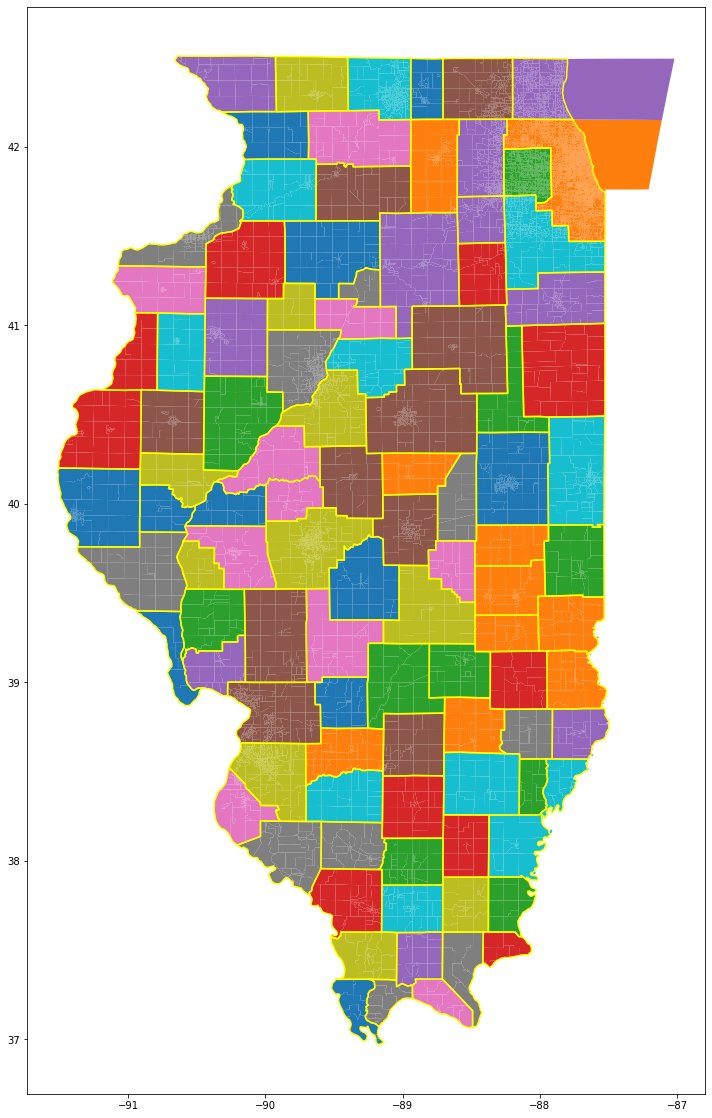

In [27]:
ax = il_county.boundary.plot(figsize=(20,20),color="yellow")
vest_shp.plot(column="COUNTYFP",ax=ax)

#Looks good!

### Add FIPS where we can

In [28]:
#Make a dictionary to assign counties
juris_name_changes_dict = {'CITY OF BLOOMINGTON':'McLEAN',
'CITY OF CHICAGO':'COOK',
'CITY OF DANVILLE':'VERMILION',
'CITY OF EAST ST. LOUIS':'ST. CLAIR',
'CITY OF GALESBURG':'KNOX',
'CITY OF ROCKFORD':'WINNEBAGO',
'CITY OF AURORA':"KANE"}

#Keep a copy of the original column in case it's needed
election_results['JurisName_unmod'] = election_results['JurisName']

#Add in the county data and change everything to uppercase
election_results['JurisName'] = election_results['JurisName'].map(juris_name_changes_dict).fillna(election_results['JurisName'])
election_results['JurisName'] = election_results['JurisName'].str.upper()

#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Illinois"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)
fips_file["County Name"]=fips_file["County Name"].str.upper()

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

#Modify the names slightly to match the fips file format
name_mods = {'DEKALB':'DE KALB',
'DUPAGE':"DU PAGE",
'JODAVIESS':"JO DAVIESS",
'LASALLE':"LA SALLE",
'ST. CLAIR':"ST CLAIR"
}

election_results['JurisName'] = election_results['JurisName'].map(name_mods).fillna(election_results['JurisName'])

#Make to the county FIPS
election_results['COUNTYFP'] = election_results['JurisName'].map(fips_dict).fillna(election_results['JurisName'])

#Print out the FIPs values
election_results['COUNTYFP'].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '083', '085', '087', '089',
       '091', '093', '095', '097', '099', '101', '103', '105', '107',
       '115', '117', '119', '121', '123', '125', '127', '109', '111',
       '113', '129', '131', '133', '135', '137', '139', '141', '143',
       '145', '147', '149', '151', '153', '155', '157', '159', '161',
       '165', '167', '169', '171', '173', '175', '163', '177', '179',
       '181', '183', '185', '187', '189', '191', '193', '195', '197',
       '199', '201', '203'], dtype=object)

In [29]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [30]:
county_totals_check(vest_shp,election_results,data_columns,"COUNTYFP",full_print=False)

***Countywide Totals Check***

G16PREDCLI contains differences in these counties:
	089 has a difference of -4132.0 votes
		VEST: 103665 votes
		SOURCES: 107797.0 votes
	093 has a difference of 1342.0 votes
		VEST: 24884 votes
		SOURCES: 23542.0 votes
	197 has a difference of 2790.0 votes
		VEST: 151927 votes
		SOURCES: 149137.0 votes
G16PRERTRU contains differences in these counties:
	089 has a difference of -2138.0 votes
		VEST: 82734 votes
		SOURCES: 84872.0 votes
	093 has a difference of 749.0 votes
		VEST: 24961 votes
		SOURCES: 24212.0 votes
	197 has a difference of 1389.0 votes
		VEST: 132720 votes
		SOURCES: 131331.0 votes
G16PRELJOH contains differences in these counties:
	089 has a difference of -294.0 votes
		VEST: 9292 votes
		SOURCES: 9586.0 votes
	093 has a difference of 108.0 votes
		VEST: 2675 votes
		SOURCES: 2567.0 votes
	197 has a difference of 186.0 votes
		VEST: 11822 votes
		SOURCES: 11636.0 votes
G16PREGSTE contains differences in these counties:
	089 has a differ

		SOURCES: 20477.0 votes
	197 has a difference of 2378.0 votes
		VEST: 134445 votes
		SOURCES: 132067.0 votes
G16COMRMUN contains differences in these counties:
	089 has a difference of -2647.0 votes
		VEST: 98986 votes
		SOURCES: 101633.0 votes
	093 has a difference of 893.0 votes
		VEST: 27655 votes
		SOURCES: 26762.0 votes
	197 has a difference of 1754.0 votes
		VEST: 144613 votes
		SOURCES: 142859.0 votes
G16COMLBAL contains differences in these counties:
	089 has a difference of -250.0 votes
		VEST: 7858 votes
		SOURCES: 8108.0 votes
	093 has a difference of 92.0 votes
		VEST: 2145 votes
		SOURCES: 2053.0 votes
	197 has a difference of 158.0 votes
		VEST: 10599 votes
		SOURCES: 10441.0 votes
G16COMGCUR contains differences in these counties:
	089 has a difference of -127.0 votes
		VEST: 4835 votes
		SOURCES: 4962.0 votes
	093 has a difference of 46.0 votes
		VEST: 1340 votes
		SOURCES: 1294.0 votes
	197 has a difference of 81.0 votes
		VEST: 7107 votes
		SOURCES: 7026.0 votes


Note: Our simple county assignments (where we do not split municipalities) does not seem to match up with what VEST has.

## Precinct-by-Precinct Check

In [31]:
#Update the name column
vest_shp["NAME"] = vest_shp["NAME"].str.upper()
vest_shp["NAME"] = vest_shp["NAME"].str.replace("WD ","WARD ")
vest_shp["NAME"] = vest_shp["NAME"].str.replace("PCT ","PRECINCT ")

In [32]:
#Create unique_ID columns for both the election results file and the VEST file
election_results["unique_ID"] = election_results["COUNTYFP"]+"-"+election_results["PrecinctName"].str.upper()
election_results["unique_ID"].value_counts(dropna=False)

vest_shp["unique_ID"] = vest_shp["COUNTYFP"]+"-"+vest_shp["NAME"].str.upper()
vest_shp["unique_ID"].value_counts(dropna=False)

073-OSCO                   1
031-WARD 07 PRECINCT 46    1
031-WARD 18 PRECINCT 28    1
087-GOREVILLE 2            1
089-W01P01                 1
                          ..
097-BENTON 59              1
043-DOWNERS GROVE 118      1
043-YORK 27                1
031-WARD 01 PRECINCT 22    1
073-GALVA 1                1
Name: unique_ID, Length: 10090, dtype: int64

### Allocate the Countywide Votes

In [33]:
to_allocate = ["PRESIDENT ONLY",
"PRESIDENTIAL BALLOT",
"ELECTIONS OFFICE",
"Elections Office",
"PRESIDENTIAL ONLY",
"PRES ONLY",
"PRESIDENTIAL"]

In [34]:
giving_votes = election_results[election_results["PrecinctName"].isin(to_allocate)]
receiving_votes = election_results[~election_results["PrecinctName"].isin(to_allocate)]

In [35]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating,allocating_to_all_empty_precs=False):
    """Allocates votes proportionally to precincts, usually by share of precinct-reported vote

    Args:
      df_receiving_votes: DataFrame with precinct-level votes
      df_allocating: DataFrame with the votes to allocate
      column_list: List of races that votes are being allocated for
      col_allocating: String referring to what level the allocation occurs at (most often county)
      allocating_to_all_empty_precs: Boolean for special case where all votes in df_receiving_votes are 0

    Returns:
      The precinct-level votes dataframe (df_receiving_votes) with the allocated votes
    """
    
    #Fill any n/a values with 0
    df_receiving_votes = df_receiving_votes.fillna(0)
    #Grab the original columns, so we can filter back down to them later
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    if (allocating_to_all_empty_precs):
        #In cases where every vote is 0, need to set the Total_Votes equal to 1 for proportional allocation
        df_receiving_votes.loc[:,"Total_Votes"]=1
    else:
        df_receiving_votes.loc[:,"Total_Votes"]=0
        for race in column_list:
            df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Add in total sum check
    sum_dataframe = pd.DataFrame(columns=precinct_specific_totals.columns)
    for i in column_list:
        total_votes = precinct_specific_totals.loc[:,i].sum()+to_dole_out_totals.loc[:,i].sum()
        sum_dataframe.at[0,i]=total_votes.astype(int)
    
    #Check the allocating to empty precincts code
    if (allocating_to_all_empty_precs):
        for i in column_list:
            if(sum(precinct_specific_totals[i])!=0):
                print("Allocating to all empty precincts parameter incorrect")
                break
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
                        if(row["Total_Votes"]==0):
                            precinct_specific_totals.loc[index,"Total_Votes"]=1
                            col_val = row[col_allocating]
                            df_receiving_votes.loc[df_receiving_votes[col_allocating]==col_val,"Total_Votes"]=1

    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        df_receiving_votes.loc[:,race] = df_receiving_votes.loc[:,race].astype(int)
        #Check to make sure all the votes have been allocated
        if ((sum_dataframe.loc[:,race].sum()-df_receiving_votes.loc[:,race].sum()!=0)):
            print("Some issue in allocating votes for:", i)
            
    #Filter down to original columns
    df_receiving_votes = df_receiving_votes[original_cols]

    return df_receiving_votes

In [36]:
election_results = allocate_absentee(receiving_votes,giving_votes,races,"COUNTYFP")

### Attempt to join

In [37]:
#Perform a join
join = pd.merge(election_results,vest_shp,how="outer",on="unique_ID",indicator=True)
print(join["_merge"].value_counts())

# election_only = join[join["_merge"]=="left_only"]
# vest_only = join[join["_merge"]=="right_only"]
# election_only.to_csv("./election_only.csv")
# vest_only.to_csv("./vest_only.csv")

both          5497
right_only    4593
left_only     4591
Name: _merge, dtype: int64


In [38]:
#Create a name change dict
election_vest_id_changes_dict ={'089-RU0002': '089-RU02', '089-CA0007': '089-CA07', '089-BB0003': '089-BB03', '089-SG0006': '089-SG06', '037-KINGSTON 01': '037-KINGSTON 1', '007-CALEDONIA  1': '007-CALEDONIA 1', '089-PL0002': '089-PL02', '197-NEW LENOX PCT 020': '197-NEW LENOX PRECINCT 020', '197-FRANKFORT PCT 017': '197-FRANKFORT PRECINCT 017', '089-SG0002': '089-SG02', '197-NEW LENOX PCT 007': '197-NEW LENOX PRECINCT 007', '197-HOMER PCT 014': '197-HOMER PRECINCT 014', '197-MANHATTAN PCT 003': '197-MANHATTAN PRECINCT 003', '111-RIL  1': '111-RILEY 1', '089-SG0005': '089-SG05', '089-BB0002': '089-BB02', '089-HA0002': '089-HA02', '089-EL0059': '089-EL59', '197-FRANKFORT PCT 005': '197-FRANKFORT PRECINCT 005', '197-LOCKPORT PCT 001': '197-LOCKPORT PRECINCT 001', '089-EL0058': '089-EL58', '037-SQUAW GROVE 01': '037-SQUAW GROVE 1', '089-BA0021': '089-BA21', '197-FRANKFORT PCT 001': '197-FRANKFORT PRECINCT 001', '197-HOMER PCT 017': '197-HOMER PRECINCT 017', '197-TROY PCT 013': '197-TROY PRECINCT 013', '111-GRA  4': '111-GRAFTON 4', '197-LOCKPORT PCT 013': '197-LOCKPORT PRECINCT 013', '091-BOURBONNAIS #19': '091-BOURBONNAIS 19', '081-MT. VERNON 2': '081-MOUNT VERNON 2', '089-SC0024': '089-SC24', '089-HA0003': '089-HA03', '089-RU0004': '089-RU04', '197-FRANKFORT PCT 011': '197-FRANKFORT PRECINCT 011', '089-BB0004': '089-BB04', '031-7600027': '031-HANOVER 27', '197-NEW LENOX PCT 014': '197-NEW LENOX PRECINCT 014', '197-TROY PCT 008': '197-TROY PRECINCT 008', '197-WHEATLAND PCT 026': '197-WHEATLAND PRECINCT 026', '111-GRA  8': '111-GRAFTON 8', '089-HA0001': '089-HA01', '091-LIMESTONE #3': '091-LIMESTONE 3', '197-NEW LENOX PCT 008': '197-NEW LENOX PRECINCT 008', '089-RU0001': '089-RU01', '197-PEOTONE PCT 001': '197-PEOTONE PRECINCT 001', '055-CAVE': '055-CAVE 1', '197-CHANNAHON PCT 002': '197-CHANNAHON PRECINCT 002', '197-GREEN GARDEN PCT 002': '197-GREEN GARDEN PRECINCT 002', '197-HOMER PCT 002': '197-HOMER PRECINCT 002', '197-WESLEY PCT 001': '197-WESLEY PRECINCT 001', '031-7700012': '031-LEMONT 12', '091-BOURBONNAIS #11': '091-BOURBONNAIS 11', '021-BUCKHART': '021-BUCKHART 1', '089-GE0021': '089-GE21', '197-GREEN GARDEN PCT 001': '197-GREEN GARDEN PRECINCT 001', '197-PLAINFIELD PCT 022': '197-PLAINFIELD PRECINCT 022', '037-GENOA 01': '037-GENOA 1', '089-PL0001': '089-PL01', '197-WASHINGTON PCT 002': '197-WASHINGTON PRECINCT 002', '197-TROY PCT 011': '197-TROY PRECINCT 011', '089-EL0047': '089-EL47', '091-BOURBONNAIS #7': '091-BOURBONNAIS 7', '197-HOMER PCT 012': '197-HOMER PRECINCT 012', '197-PEOTONE PCT 002': '197-PEOTONE PRECINCT 002', '197-HOMER PCT 018': '197-HOMER PRECINCT 018', '197-HOMER PCT 004': '197-HOMER PRECINCT 004', '197-MANHATTAN PCT 002': '197-MANHATTAN PRECINCT 002', '197-HOMER PCT 015': '197-HOMER PRECINCT 015', '089-EL0024': '089-EL24', '199-CREAL SPRINGS 2': '199-CREAL SPRINGS TWP 2', '089-GE0017': '089-GE17', '127-GRANT': '127-GRANT 14', '197-FRANKFORT PCT 002': '197-FRANKFORT PRECINCT 002', '197-NEW LENOX PCT 015': '197-NEW LENOX PRECINCT 015', '197-PLAINFIELD PCT 020': '197-PLAINFIELD PRECINCT 020', '197-HOMER PCT 013': '197-HOMER PRECINCT 013', '133-PRECINCT 6': '133-MONROE 6', '037-GENOA 02': '037-GENOA 2', '197-JACKSON PCT 001': '197-JACKSON PRECINCT 001', '037-FRANKLIN 01': '037-FRANKLIN 1', '111-GRA 16': '111-GRAFTON 16', '197-REED PCT 003': '197-REED PRECINCT 003', '111-MCH 11': '111-MCHENRY 11', '197-PLAINFIELD PCT 013': '197-PLAINFIELD PRECINCT 013', '197-REED PCT 002': '197-REED PRECINCT 002', '191-OREL': '191-OREL TWP', '197-NEW LENOX PCT 019': '197-NEW LENOX PRECINCT 019', '089-DU0028': '089-DU28', '111-NUN 19': '111-NUNDA 19', '197-NEW LENOX PCT 017': '197-NEW LENOX PRECINCT 017', '197-WHEATLAND PCT 028': '197-WHEATLAND PRECINCT 028', '197-REED PCT 001': '197-REED PRECINCT 001', '021-PANA #2': '021-PANA 2', '031-7700013': '031-LEMONT 13', '197-TROY PCT 017': '197-TROY PRECINCT 017', '089-SC0021': '089-SC21', '197-CHANNAHON PCT 001': '197-CHANNAHON PRECINCT 001', '197-HOMER PCT 010': '197-HOMER PRECINCT 010', '089-BU0001': '089-BU01', '163-O FALLON 8': '163-OFALLON 8', '197-FRANKFORT PCT 028': '197-FRANKFORT PRECINCT 028', '197-CHANNAHON PCT 003': '197-CHANNAHON PRECINCT 003', '111-MCH 34': '111-MCHENRY 34', '197-MANHATTAN PCT 004': '197-MANHATTAN PRECINCT 004', '197-NEW LENOX PCT 009': '197-NEW LENOX PRECINCT 009', '091-MANTENO #6': '091-MANTENO 6', '197-WHEATLAND PCT 002': '197-WHEATLAND PRECINCT 002', '089-SC0031': '089-SC31', '197-CHANNAHON PCT 005': '197-CHANNAHON PRECINCT 005', '197-NEW LENOX PCT 011': '197-NEW LENOX PRECINCT 011', '111-RIC  2': '111-RICHMOND 2', '111-RIC  1': '111-RICHMOND 1', '021-TAYLORVILLE #4': '021-TAYLORVILLE 4', '197-FRANKFORT PCT 016': '197-FRANKFORT PRECINCT 016', '081-MT. VERNON 1': '081-MOUNT VERNON 1', '001-LIBERTY': '001-LIBERTY 1', '091-BOURBONNAIS #1': '091-BOURBONNAIS 1', '031-7000008': '031-BARRINGTON 8', '111-RIC  4': '111-RICHMOND 4', '109-COLCHESTER': '109-COLCHESTER 1', '197-NEW LENOX PCT 006': '197-NEW LENOX PRECINCT 006', '197-HOMER PCT 007': '197-HOMER PRECINCT 007', '197-TROY PCT 020': '197-TROY PRECINCT 020', '197-WHEATLAND PCT 029': '197-WHEATLAND PRECINCT 029', '037-SOMONAUK 01': '037-SOMONAUK 1', '197-WHEATLAND PCT 001': '197-WHEATLAND PRECINCT 001', '197-WASHINGTON PCT 001': '197-WASHINGTON PRECINCT 001', '197-WILL PCT 001': '197-WILL PRECINCT 001', '197-FRANKFORT PCT 008': '197-FRANKFORT PRECINCT 008', '163-O FALLON 16': '163-OFALLON 16', '031-7700011': '031-LEMONT 11', '031-7000004': '031-BARRINGTON 4', '089-BB0005': '089-BB05', '197-LOCKPORT PCT 005': '197-LOCKPORT PRECINCT 005', '089-CA0001': '089-CA01', '089-PL0003': '089-PL03', '197-CHANNAHON PCT 004': '197-CHANNAHON PRECINCT 004', '197-TROY PCT 007': '197-TROY PRECINCT 007', '021-TAYLORVILLE #5': '021-TAYLORVILLE 5', '197-NEW LENOX PCT 002': '197-NEW LENOX PRECINCT 002', '091-AROMA #4': '091-AROMA 4', '197-NEW LENOX PCT 012': '197-NEW LENOX PRECINCT 012', '197-WILMINGTON PCT 003': '197-WILMINGTON PRECINCT 003', '089-EL0053': '089-EL53', '197-WASHINGTON PCT 003': '197-WASHINGTON PRECINCT 003', '201-ROSCOE 01': '201-ROSCOE 1', '111-DOR 11': '111-DORR 11', '197-MANHATTAN PCT 001': '197-MANHATTAN PRECINCT 001', '197-JACKSON PCT 002': '197-JACKSON PRECINCT 002', '127-JEFFERSON': '127-JEFFERSON 16', '031-8300051': '031-NORTHFIELD 51', '197-TROY PCT 015': '197-TROY PRECINCT 015', '197-HOMER PCT 011': '197-HOMER PRECINCT 011', '163-O FALLON 12': '163-OFALLON 12', '091-MOMENCE #1': '091-MOMENCE 1', '111-BUR  3': '111-BURTON 3', '089-SG0004': '089-SG04', '091-BOURBONNAIS #5': '091-BOURBONNAIS 5', '199-EAST MARION 5': '199-EAST MARION TWP 5', '197-PLAINFIELD PCT 009': '197-PLAINFIELD PRECINCT 009', '163-O FALLON 15': '163-OFALLON 15', '197-LOCKPORT PCT 009': '197-LOCKPORT PRECINCT 009', '197-HOMER PCT 006': '197-HOMER PRECINCT 006', '197-FRANKFORT PCT 020': '197-FRANKFORT PRECINCT 020', '111-DUN  1': '111-DUNHAM 1', '199-EAST MARION 8': '199-EAST MARION TWP 8', '093-OSWEGO 2': '093-OSWEGO - 02', '197-NEW LENOX PCT 013': '197-NEW LENOX PRECINCT 013', '049-ST. FRANCIS': '049-ST FRANCIS', '197-HOMER PCT 008': '197-HOMER PRECINCT 008', '197-WHEATLAND PCT 025': '197-WHEATLAND PRECINCT 025', '031-9700065': '031-WORTH 65', '089-RU0005': '089-RU05', '197-HOMER PCT 001': '197-HOMER PRECINCT 001', '111-GRA 20': '111-GRAFTON 20', '197-FRANKFORT PCT 026': '197-FRANKFORT PRECINCT 026', '089-BA0019': '089-BA19', '197-FRANKFORT PCT 018': '197-FRANKFORT PRECINCT 018', '197-FRANKFORT PCT 023': '197-FRANKFORT PRECINCT 023', '197-TROY PCT 010': '197-TROY PRECINCT 010', '197-TROY PCT 021': '197-TROY PRECINCT 021', '031-8600047': '031-ORLAND 47', '165-INDEPENDENCE': '165-INDEPENDENCE 1', '031-8000030': '031-MAINE 30', '031-9700064': '031-WORTH 64', '031-8600029': '031-ORLAND 29', '111-MCH 16': '111-MCHENRY 16', '031-8600025': '031-ORLAND 25', '197-NEW LENOX PCT 016': '197-NEW LENOX PRECINCT 016', '031-8000060': '031-MAINE 60', '197-WHEATLAND PCT 030': '197-WHEATLAND PRECINCT 030', '197-NEW LENOX PCT 018': '197-NEW LENOX PRECINCT 018', '089-DU0018': '089-DU18', '089-CA0010': '089-CA10', '111-MAR  4': '111-MARENGO 4', '197-WILMINGTON PCT 002': '197-WILMINGTON PRECINCT 002', '091-BOURBONNAIS #6': '091-BOURBONNAIS 6', '031-7700003': '031-LEMONT 3', '111-MCH  4': '111-MCHENRY 4', '163-O FALLON 7': '163-OFALLON 7', '111-GRE  5': '111-GREENWOOD 5', '163-O FALLON 11': '163-OFALLON 11', '197-TROY PCT 014': '197-TROY PRECINCT 014', '197-PLAINFIELD PCT 016': '197-PLAINFIELD PRECINCT 016', '197-HOMER PCT 003': '197-HOMER PRECINCT 003', '031-8600064': '031-ORLAND 64', '197-FRANKFORT PCT 022': '197-FRANKFORT PRECINCT 022', '031-9000020': '031-RICH 20', '197-PLAINFIELD PCT 015': '197-PLAINFIELD PRECINCT 015', '197-FRANKFORT PCT 027': '197-FRANKFORT PRECINCT 027', '197-FRANKFORT PCT 007': '197-FRANKFORT PRECINCT 007', '199-SOUTHERN 1': '199-SOUTHERN TWP 1', '197-HOMER PCT 016': '197-HOMER PRECINCT 016', '197-HOMER PCT 005': '197-HOMER PRECINCT 005', '191-JASPER 1': '191-JASPER TWP 1', '197-LOCKPORT PCT 017': '197-LOCKPORT PRECINCT 017', '197-NEW LENOX PCT 003': '197-NEW LENOX PRECINCT 003', '199-EAST MARION 4': '199-EAST MARION TWP 4', '197-LOCKPORT PCT 012': '197-LOCKPORT PRECINCT 012', '111-BUR  2': '111-BURTON 2', '197-TROY PCT 001': '197-TROY PRECINCT 001', '197-FRANKFORT PCT 012': '197-FRANKFORT PRECINCT 012', '091-BOURBONNAIS #20': '091-BOURBONNAIS 20', '197-LOCKPORT PCT 018': '197-LOCKPORT PRECINCT 018', '001-MELROSE PCT 2': '001-MELROSE 2', '037-CORTLAND 01': '037-CORTLAND 1', '197-WHEATLAND PCT 005': '197-WHEATLAND PRECINCT 005', '197-FRANKFORT PCT 009': '197-FRANKFORT PRECINCT 009', '197-FRANKFORT PCT 006': '197-FRANKFORT PRECINCT 006', '197-NEW LENOX PCT 010': '197-NEW LENOX PRECINCT 010', '199-CARTERVILLE 6': '199-CARTERVILLE TWP 6', '031-8600054': '031-ORLAND 54', '031-7900063': '031-LYONS 63', '111-NUN 15': '111-NUNDA 15', '199-WEST MARION 4': '199-WEST MARION TWP 4', '197-NEW LENOX PCT 005': '197-NEW LENOX PRECINCT 005', '111-DOR 12': '111-DORR 12', '197-WHEATLAND PCT 016': '197-WHEATLAND PRECINCT 016', '197-TROY PCT 003': '197-TROY PRECINCT 003', '001-GILMER': '001-GILMER 1', '031-8600015': '031-ORLAND 15', '029-ASHMORE  1': '029-ASHMORE 1', '111-GRA 13': '111-GRAFTON 13', '197-MONEE PCT 003': '197-MONEE PRECINCT 003', '197-CUSTER PCT 001': '197-CUSTER PRECINCT 001', '113-PRECINCT 44': '113-CITY OF BLOOMINGTON 44', '197-WHEATLAND PCT 003': '197-WHEATLAND PRECINCT 003', '111-GRA 17': '111-GRAFTON 17', '197-FRANKFORT PCT 025': '197-FRANKFORT PRECINCT 025', '031-8800010': '031-PALOS 10', '031-8700044': '031-PALATINE 44', '199-CARTERVILLE 3': '199-CARTERVILLE TWP 3', '197-FRANKFORT PCT 019': '197-FRANKFORT PRECINCT 019', '133-PRECINCT 29': '133-MONROE 29', '113-PRECINCT 35': '113-CITY OF BLOOMINGTON 35', '197-PLAINFIELD PCT 003': '197-PLAINFIELD PRECINCT 003', '031-7800012': '031-LEYDEN 12', '081-CASNER': '081-CASNER 1', '111-GRA 15': '111-GRAFTON 15', '093-BRISTOL 5': '093-BRISTOL - 05', '179-GROVELAND  3': '179-GROVELAND 3', '197-FRANKFORT PCT 010': '197-FRANKFORT PRECINCT 010', '111-GRA 21': '111-GRAFTON 21', '111-NUN 21': '111-NUNDA 21', '197-CRETE PCT 011': '197-CRETE PRECINCT 011', '197-LOCKPORT PCT 010': '197-LOCKPORT PRECINCT 010', '111-MCH 27': '111-MCHENRY 27', '197-WILMINGTON PCT 001': '197-WILMINGTON PRECINCT 001', '197-WHEATLAND PCT 011': '197-WHEATLAND PRECINCT 011', '197-FRANKFORT PCT 004': '197-FRANKFORT PRECINCT 004', '113-PRECINCT 43': '113-CITY OF BLOOMINGTON 43', '093-BRISTOL 13': '093-BRISTOL - 13', '197-FRANKFORT PCT 003': '197-FRANKFORT PRECINCT 003', '197-FRANKFORT PCT 014': '197-FRANKFORT PRECINCT 014', '133-PRECINCT 7': '133-MONROE 7', '111-MCH 21': '111-MCHENRY 21', '089-CA0002': '089-CA02', '197-PLAINFIELD PCT 001': '197-PLAINFIELD PRECINCT 001', '031-8600075': '031-ORLAND 75', '197-LOCKPORT PCT 011': '197-LOCKPORT PRECINCT 011', '113-PRECINCT 40': '113-CITY OF BLOOMINGTON 40', '197-FRANKFORT PCT 021': '197-FRANKFORT PRECINCT 021', '197-LOCKPORT PCT 016': '197-LOCKPORT PRECINCT 016', '089-RU0007': '089-RU07', '197-DU PAGE PCT 036': '197-DUPAGE PRECINCT 036', '197-PLAINFIELD PCT 002': '197-PLAINFIELD PRECINCT 002', '111-MAR  3': '111-MARENGO 3', '089-GE0020': '089-GE20', '165-RALEIGH': '165-RALEIGH 1', '113-PRECINCT 10': '113-CITY OF BLOOMINGTON 10', '111-SEN  2': '111-SENECA 2', '037-SANDWICH 05': '037-SANDWICH 5', '091-YELLOWHEAD #2': '091-YELLOWHEAD 2', '197-PLAINFIELD PCT 030': '197-PLAINFIELD PRECINCT 030', '091-MANTENO #7': '091-MANTENO 7', '107-MT. PULASKI 1': '107-MT PULASKI 1', '031-8800016': '031-PALOS 16', '031-8400006': '031-NORWOOD PARK 6', '111-GRE  2': '111-GREENWOOD 2', '089-BA0010': '089-BA10', '093-KENDALL 3': '093-KENDALL - 03', '031-9600046': '031-WHEELING 46', '197-PLAINFIELD PCT 033': '197-PLAINFIELD PRECINCT 033', '031-9600012': '031-WHEELING 12', '091-BOURBONNAIS #2': '091-BOURBONNAIS 2', '089-DU0033': '089-DU33', '111-NUN  1': '111-NUNDA 1', '111-GRA 27': '111-GRAFTON 27', '031-7800023': '031-LEYDEN 23', '031-7700001': '031-LEMONT 1', '031-9700089': '031-WORTH 89', '031-7000005': '031-BARRINGTON 5', '111-GRA 18': '111-GRAFTON 18', '197-PLAINFIELD PCT 014': '197-PLAINFIELD PRECINCT 014', '037-SYCAMORE 03': '037-SYCAMORE 3', '031-8000067': '031-MAINE 67', '111-GRA 26': '111-GRAFTON 26', '089-RU0009': '089-RU09', '163-O FALLON 9': '163-OFALLON 9', '037-CLINTON 01': '037-CLINTON 1', '161-SO MOLINE 4': '161-SOUTH MOLINE 4', '111-MCH  6': '111-MCHENRY 6', '147-BLUE RIDGE': '147-BLUE RIDGE 1', '089-BB0006': '089-BB06', '093-BRISTOL 9': '093-BRISTOL - 09', '165-HARRISBURG #10': '165-HARRISBURG 10', '007-CALEDONIA  2': '007-CALEDONIA 2', '089-SC0026': '089-SC26', '111-DOR  9': '111-DORR 9', '199-HERRIN 7': '199-HERRIN TWP 7', '197-PLAINFIELD PCT 008': '197-PLAINFIELD PRECINCT 008', '197-DU PAGE PCT 032': '197-DUPAGE PRECINCT 032', '197-NEW LENOX PCT 001': '197-NEW LENOX PRECINCT 001', '165-GALATIA': '165-GALATIA 1', '199-SOUTHERN 2': '199-SOUTHERN TWP 2', '197-PLAINFIELD PCT 028': '197-PLAINFIELD PRECINCT 028', '197-FRANKFORT PCT 013': '197-FRANKFORT PRECINCT 013', '001-URSA': '001-URSA 1', '111-ALG 68': '111-ALGONQUIN 68', '197-WHEATLAND PCT 009': '197-WHEATLAND PRECINCT 009', '197-FRANKFORT PCT 015': '197-FRANKFORT PRECINCT 015', '177-RIDOTT': '177-RIDOTT 1', '197-TROY PCT 009': '197-TROY PRECINCT 009', '089-DU0032': '089-DU32', '031-7700004': '031-LEMONT 4', '001-ELLINGTON PCT 1': '001-ELLINGTON 1', '091-LIMESTONE #2': '091-LIMESTONE 2', '197-MONEE PCT 004': '197-MONEE PRECINCT 004', '197-WHEATLAND PCT 018': '197-WHEATLAND PRECINCT 018', '197-PLAINFIELD PCT 024': '197-PLAINFIELD PRECINCT 024', '031-7700014': '031-LEMONT 14', '031-8600021': '031-ORLAND 21', '197-DU PAGE PCT 001': '197-DUPAGE PRECINCT 001', '111-NUN 22': '111-NUNDA 22', '091-BOURBONNAIS #21': '091-BOURBONNAIS 21', '093-KENDALL 4': '093-KENDALL - 04', '133-PRECINCT 20': '133-MONROE 20', '001-BURTON': '001-BURTON 1', '031-7200034': '031-BREMEN 34', '093-OSWEGO 25': '093-OSWEGO - 25', '021-TAYLORVILLE #8': '021-TAYLORVILLE 8', '037-CORTLAND 02': '037-CORTLAND 2', '197-JOLIET PCT 018': '197-JOLIET PRECINCT 018', '197-TROY PCT 004': '197-TROY PRECINCT 004', '089-SC0016': '089-SC16', '197-WHEATLAND PCT 014': '197-WHEATLAND PRECINCT 014', '111-MCH 10': '111-MCHENRY 10', '091-MANTENO #1': '091-MANTENO 1', '197-PLAINFIELD PCT 029': '197-PLAINFIELD PRECINCT 029', '089-CA0005': '089-CA05', '197-NEW LENOX PCT 004': '197-NEW LENOX PRECINCT 004', '091-MANTENO #2': '091-MANTENO 2', '001-ELLINGTON PCT 2': '001-ELLINGTON 2', '111-NUN 17': '111-NUNDA 17', '031-9700016': '031-WORTH 16', '089-BA0016': '089-BA16', '089-SC0027': '089-SC27', '089-SC0007': '089-SC07', '197-PLAINFIELD PCT 010': '197-PLAINFIELD PRECINCT 010', '111-ALG 65': '111-ALGONQUIN 65', '031-7200077': '031-BREMEN 77', '197-WHEATLAND PCT 024': '197-WHEATLAND PRECINCT 024', '091-KANKAKEE #3': '091-KANKAKEE 3', '143-PE75': '143-PEORIA 75', '021-RICKS': '021-RICKS 1', '031-8600002': '031-ORLAND 2', '127-WASHINGTON': '127-WASHINGTON 9', '197-LOCKPORT PCT 019': '197-LOCKPORT PRECINCT 019', '197-DU PAGE PCT 003': '197-DUPAGE PRECINCT 003', '089-CA0003': '089-CA03', '197-WHEATLAND PCT 017': '197-WHEATLAND PRECINCT 017', '197-TROY PCT 012': '197-TROY PRECINCT 012', '197-WHEATLAND PCT 006': '197-WHEATLAND PRECINCT 006', '111-GRE  7': '111-GREENWOOD 7', '197-HOMER PCT 009': '197-HOMER PRECINCT 009', '093-KENDALL 6': '093-KENDALL - 06', '111-DOR 10': '111-DORR 10', '031-7000003': '031-BARRINGTON 3', '091-BOURBONNAIS #14': '091-BOURBONNAIS 14', '091-YELLOWHEAD #1': '091-YELLOWHEAD 1', '031-8800037': '031-PALOS 37', '031-8800035': '031-PALOS 35', '199-EAST MARION 10': '199-EM10 EAST MARION TWP', '143-PE93': '143-PEORIA 93', '111-ALG 17': '111-ALGONQUIN 17', '031-8000029': '031-MAINE 29', '111-GRA  6': '111-GRAFTON 6', '197-CRETE PCT 009': '197-CRETE PRECINCT 009', '177-LANCASTER': '177-LANCASTER 1', '093-OSWEGO 36': '093-OSWEGO - 36', '031-7400051': '031-ELK GROVE 51', '019-COMPROMISE GIFFORD': '019-COMPROMISE GIFFOR', '155-HENNEPIN 1': '155-HENNEPIN', '031-7200067': '031-BREMEN 67', '089-DU0030': '089-DU30', '111-ALD  1': '111-ALDEN 1', '031-9600071': '031-WHEELING 71', '197-WHEATLAND PCT 020': '197-WHEATLAND PRECINCT 020', '031-7700006': '031-LEMONT 6', '133-PRECINCT 30': '133-MONROE 30', '199-CARTERVILLE 5': '199-CARTERVILLE TWP 5', '111-GRA 12': '111-GRAFTON 12', '197-WHEATLAND PCT 023': '197-WHEATLAND PRECINCT 023', '197-PLAINFIELD PCT 021': '197-PLAINFIELD PRECINCT 021', '137-FRANKLIN': '137-FRANKLIN 1', '197-DU PAGE PCT 002': '197-DUPAGE PRECINCT 002', '143-PE95': '143-PEORIA 95', '021-TAYLORVILLE #3': '021-TAYLORVILLE 3', '199-WEST MARION 11': '199-WEST MARION TWP 11', '031-8600034': '031-ORLAND 34', '031-7600020': '031-HANOVER 20', '089-SC0030': '089-SC30', '031-9600041': '031-WHEELING 41', '111-NUN  6': '111-NUNDA 6', '133-PRECINCT 12': '133-MONROE 12', '063-MAZON 1': '063-MAZON', '031-9600092': '031-WHEELING 92', '089-CA0008': '089-CA08', '203-PALESTINE': '203-PALESTINE 1', '199-LAKE CREEK 1': '199-LAKE CREEK TWP 1', '031-9600027': '031-WHEELING 27', '031-8600001': '031-ORLAND 1', '037-SHABBONA 01': '037-SHABBONA 1', '111-GRE  3': '111-GREENWOOD 3', '111-SEN  1': '111-SENECA 1', '089-SC0029': '089-SC29', '197-PLAINFIELD PCT 031': '197-PLAINFIELD PRECINCT 031', '031-7400023': '031-ELK GROVE 23', '031-9600083': '031-WHEELING 83', '111-CHE  5': '111-CHEMUNG 5', '091-MANTENO #4': '091-MANTENO 4', '031-7900023': '031-LYONS 23', '091-MANTENO #5': '091-MANTENO 5', '191-LAMARD 1': '191-LAMARD TWP 1', '031-9600030': '031-WHEELING 30', '111-COR  2': '111-CORAL 2', '093-SEWARD 1': '093-SEWARD - 01', '031-9600054': '031-WHEELING 54', '031-8700050': '031-PALATINE 50', '031-7900044': '031-LYONS 44', '093-NA AU SAY 2': '093-NA-AU-SAY - 02', '133-PRECINCT 28': '133-MONROE 28', '031-8600040': '031-ORLAND 40', '031-9400006': '031-STICKNEY 6', '139-SULLIVAN #7': '139-SULLIVAN 7', '031-8300012': '031-NORTHFIELD 12', '201-ROCKFORD 05': '201-ROCKFORD 5', '197-TROY PCT 016': '197-TROY PRECINCT 016', '037-SYCAMORE 09': '037-SYCAMORE 9', '133-PRECINCT 1': '133-MONROE 1', '199-WEST MARION 8': '199-WEST MARION TWP 8', '093-BRISTOL 3': '093-BRISTOL - 03', '031-8700040': '031-PALATINE 40', '089-WARD 01 PCT 09': '089-W01P09', '037-SANDWICH 02': '037-SANDWICH 2', '197-JOLIET PCT 021': '197-JOLIET PRECINCT 021', '197-WHEATLAND PCT 010': '197-WHEATLAND PRECINCT 010', '031-8600073': '031-ORLAND 73', '195-UNION GROVE 1': '195-UNION GROVE', '165-HARRISBURG #8': '165-HARRISBURG 8', '127-ADKINS': '127-ADKINS 17', '031-8600051': '031-ORLAND 51', '093-NA AU SAY 1': '093-NA-AU-SAY - 01', '191-GROVER': '191-GROVER TWP', '013-HARDIN PRECINCT': '013-HARDIN', '113-PRECINCT 33': '113-CITY OF BLOOMINGTON 33', '089-SC0008': '089-SC08', '133-PRECINCT 10': '133-MONROE 10', '031-9600061': '031-WHEELING 61', '063-GARFIELD 1': '063-GARFIELD', '031-9600042': '031-WHEELING 42', '031-9600028': '031-WHEELING 28', '031-8600018': '031-ORLAND 18', '197-CRETE PCT 010': '197-CRETE PRECINCT 010', '197-DU PAGE PCT 007': '197-DUPAGE PRECINCT 007', '089-AU0013': '089-AU13', '143-RA03': '143-RADNOR 3', '199-HERRIN 10': '199-HERRIN TWP 10', '111-ALG 55': '111-ALGONQUIN 55', '089-CA0004': '089-CA04', '031-7700008': '031-LEMONT 8', '031-7200042': '031-BREMEN 42', '111-GRA 19': '111-GRAFTON 19', '031-8600013': '031-ORLAND 13', '113-PRECINCT 36': '113-CITY OF BLOOMINGTON 36', '031-8700039': '031-PALATINE 39', '089-GE0005': '089-GE05', '031-8600063': '031-ORLAND 63', '111-NUN 12': '111-NUNDA 12', '197-MONEE PCT 008': '197-MONEE PRECINCT 008', '199-CARTERVILLE 7': '199-CARTERVILLE TWP 7', '197-CRETE PCT 012': '197-CRETE PRECINCT 012', '113-PRECINCT 11': '113-CITY OF BLOOMINGTON 11', '007-CALEDONIA  3': '007-CALEDONIA 3', '081-MT. VERNON 5': '081-MOUNT VERNON 5', '021-ASSUMPTION': '021-ASSUMPTION 1', '091-BOURBONNAIS #12': '091-BOURBONNAIS 12', '065-MCLEANSBORO 3': '065-MCLEANSBORO NO 3', '089-KA0001': '089-KA01', '201-HARLEM 01': '201-HARLEM 1', '031-8400004': '031-NORWOOD PARK 4', '001-PAYSON PCT 1': '001-PAYSON 1', '091-BOURBONNAIS #8': '091-BOURBONNAIS 8', '089-SC0022': '089-SC22', '143-ME02': '143-MEDINA 2', '133-PRECINCT 14': '133-MONROE 14', '199-CRAB ORCHARD 1': '199-CRAB ORCHARD TWP 1', '031-8000077': '031-MAINE 77', '179-GROVELAND  1': '179-GROVELAND 1', '031-8800039': '031-PALOS 39', '199-BLAIRSVILLE 3': '199-BLAIRSVILLE TWP 3', '031-8600016': '031-ORLAND 16', '197-FRANKFORT PCT 024': '197-FRANKFORT PRECINCT 024', '197-LOCKPORT PCT 020': '197-LOCKPORT PRECINCT 020', '111-GRA  1': '111-GRAFTON 1', '197-CRETE PCT 006': '197-CRETE PRECINCT 006', '197-DU PAGE PCT 034': '197-DUPAGE PRECINCT 034', '031-8600070': '031-ORLAND 70', '031-8800033': '031-PALOS 33', '031-8900035': '031-PROVISO 35', '133-PRECINCT 22': '133-MONROE 22', '197-WHEATLAND PCT 007': '197-WHEATLAND PRECINCT 007', '031-9600044': '031-WHEELING 44', '197-DU PAGE PCT 037': '197-DUPAGE PRECINCT 037', '111-ALG 47': '111-ALGONQUIN 47', '191-BEDFORD': '191-BEDFORD TWP', '037-MALTA 01': '037-MALTA 1', '031-7000010': '031-BARRINGTON 10', '199-HERRIN 4': '199-HERRIN TWP 4', '103-DIXON  1': '103-DIXON 1', '091-LIMESTONE #4': '091-LIMESTONE 4', '111-NUN 20': '111-NUNDA 20', '031-8600071': '031-ORLAND 71', '165-HARRISBURG #6': '165-HARRISBURG 6', '197-PLAINFIELD PCT 025': '197-PLAINFIELD PRECINCT 025', '197-PLAINFIELD PCT 023': '197-PLAINFIELD PRECINCT 023', '031-7800026': '031-LEYDEN 26', '199-CORINTH 1': '199-CORINTH TWP', '111-MCH 15': '111-MCHENRY 15', '031-8700010': '031-PALATINE 10', '197-WHEATLAND PCT 008': '197-WHEATLAND PRECINCT 008', '129-NORTH ATHENS-RURAL': '129-NORTH ATHENS-RURAL 4', '143-AK01': '143-AKRON', '031-8800013': '031-PALOS 13', '001-MELROSE PCT 3': '001-MELROSE 3', '111-ALG 30': '111-ALGONQUIN 30', '199-LAKE CREEK 4': '199-LAKE CREEK TWP 4', '113-PRECINCT 52': '113-CITY OF BLOOMINGTON 52', '089-DU0020': '089-DU20', '197-PLAINFIELD PCT 018': '197-PLAINFIELD PRECINCT 018', '111-NUN 14': '111-NUNDA 14', '197-TROY PCT 005': '197-TROY PRECINCT 005', '061-CARROLLTON 3': '061-CARROLLTON III', '193-GRAY 24': '193-GREY 24', '111-GRA 25': '111-GRAFTON 25', '031-7200018': '031-BREMEN 18', '111-BUR  1': '111-BURTON 1', '197-DU PAGE PCT 033': '197-DUPAGE PRECINCT 033', '089-DU0035': '089-DU35', '089-EL0055': '089-EL55', '031-9300052': '031-SCHAUMBURG 52', '111-ALG 48': '111-ALGONQUIN 48', '031-8600037': '031-ORLAND 37', '031-7400027': '031-ELK GROVE 27', '031-8900100': '031-PROVISO 100', '031-9300059': '031-SCHAUMBURG 59', '143-PE74': '143-PEORIA 74', '197-LOCKPORT PCT 014': '197-LOCKPORT PRECINCT 014', '093-OSWEGO 26': '093-OSWEGO - 26', '031-7800009': '031-LEYDEN 9', '031-7600026': '031-HANOVER 26', '031-7900028': '031-LYONS 28', '111-COR  1': '111-CORAL 1', '133-PRECINCT 21': '133-MONROE 21', '197-CRETE PCT 008': '197-CRETE PRECINCT 008', '001-MELROSE PCT 1': '001-MELROSE 1', '129-SOUTH PETERSBURG': '129-SOUTH PETERSBURG 13', '031-7600016': '031-HANOVER 16', '031-9700023': '031-WORTH 23', '031-7900065': '031-LYONS 65', '183-PRECINCT 17': '183-DANVILLE CITY 17', '031-8800031': '031-PALOS 31', '089-BA0014': '089-BA14', '031-7600044': '031-HANOVER 44', '111-MAR  1': '111-MARENGO 1', '031-9700006': '031-WORTH 6', '111-MCH  1': '111-MCHENRY 1', '031-8600009': '031-ORLAND 9', '031-8200003': '031-NILES 3', '037-SYCAMORE 07': '037-SYCAMORE 7', '111-HEB  1': '111-HEBRON 1', '031-9700095': '031-WORTH 95', '031-8800017': '031-PALOS 17', '111-ALG 41': '111-ALGONQUIN 41', '201-WARD 4 PRECINCT 2': '201-WARD 04 PRECINCT 02', '143-KI01': '143-KICKAPOO 1', '093-OSWEGO 35': '093-OSWEGO - 35', '201-WARD 1 PRECINCT 6': '201-WARD 01 PRECINCT 06', '111-ALG 63': '111-ALGONQUIN 63', '111-ALG 43': '111-ALGONQUIN 43', '031-8800036': '031-PALOS 36', '013-POINT PRECINCT': '013-POINT', '201-WARD 4 PRECINCT 1': '201-WARD 04 PRECINCT 01', '111-ALG 16': '111-ALGONQUIN 16', '111-NUN 24': '111-NUNDA 24', '111-ALG 57': '111-ALGONQUIN 57', '111-GRA 22': '111-GRAFTON 22', '021-STONINGTON': '021-STONINGTON 1', '007-FLORA  1': '007-FLORA 1', '091-BOURBONNAIS #4': '091-BOURBONNAIS 4', '163-O FALLON 13': '163-OFALLON 13', '197-PLAINFIELD PCT 017': '197-PLAINFIELD PRECINCT 017', '031-9300057': '031-SCHAUMBURG 57', '031-8800011': '031-PALOS 11', '111-ALG 42': '111-ALGONQUIN 42', '197-WHEATLAND PCT 013': '197-WHEATLAND PRECINCT 013', '031-9600051': '031-WHEELING 51', '031-8600052': '031-ORLAND 52', '111-ALG 51': '111-ALGONQUIN 51', '201-WARD 4 PRECINCT 4': '201-WARD 04 PRECINCT 04', '201-WARD 2 PRECINCT 4': '201-WARD 02 PRECINCT 04', '031-9600065': '031-WHEELING 65', '111-MCH 35': '111-MCHENRY 35', '169-BUENA VISTA 1': '169-BUENAVISTA 1', '001-MELROSE PCT 6': '001-MELROSE 6', '201-WARD 1 PRECINCT 8': '201-WARD 01 PRECINCT 08', '197-LOCKPORT PCT 002': '197-LOCKPORT PRECINCT 002', '089-GE0019': '089-GE19', '201-WARD 12 PRECINCT 6': '201-WARD 12 PRECINCT 06', '111-ALG 58': '111-ALGONQUIN 58', '089-SC0003': '089-SC03', '089-SC0034': '089-SC34', '043-DOWNERS GROVE  070': '043-DOWNERS GROVE 70', '201-WARD 14 PRECINCT 2': '201-WARD 14 PRECINCT 02', '031-9600078': '031-WHEELING 78', '089-VI0002': '089-VI02', '031-9300021': '031-SCHAUMBURG 21', '021-TAYLORVILLE #1': '021-TAYLORVILLE 1', '031-8800029': '031-PALOS 29', '201-WARD 1 PRECINCT 1': '201-WARD 01 PRECINCT 01', '111-ALG 62': '111-ALGONQUIN 62', '031-9700050': '031-WORTH 50', '031-9600011': '031-WHEELING 11', '111-COR  3': '111-CORAL 3', '031-7800049': '031-LEYDEN 49', '197-JOLIET PCT 017': '197-JOLIET PRECINCT 017', '089-DU0034': '089-DU34', '111-GRE  1': '111-GREENWOOD 1', '031-7400018': '031-ELK GROVE 18', '143-KI02': '143-KICKAPOO 2', '031-8700005': '031-PALATINE 5', '111-ALG 33': '111-ALGONQUIN 33', '089-SC0033': '089-SC33', '031-8600057': '031-ORLAND 57', '031-8200043': '031-NILES 43', '197-WHEATLAND PCT 027': '197-WHEATLAND PRECINCT 027', '111-MCH 30': '111-MCHENRY 30', '031-7800042': '031-LEYDEN 42', '113-PRECINCT 34': '113-CITY OF BLOOMINGTON 34', '031-8700034': '031-PALATINE 34', '093-BIG GROVE 1': '093-BIG GROVE - 01', '147-WILLOW BRANCH': '147-WILLOW BRANCH 1', '201-WARD 4 PRECINCT 5': '201-WARD 04 PRECINCT 05', '165-EAST ELDORADO #5': '165-ELDORADO 5', '001-CAMP POINT PCT 2': '001-CAMP POINT 2', '031-7800030': '031-LEYDEN 30', '199-CARTERVILLE 2': '199-CARTERVILLE TWP 2', '031-8700029': '031-PALATINE 29', '139-SULLIVAN #3': '139-SULLIVAN 3', '089-BB0001': '089-BB01', '089-SC0011': '089-SC11', '031-9700007': '031-WORTH 7', '093-BRISTOL 17': '093-BRISTOL - 17', '043-WINFIELD  021': '043-WINFIELD 21', '031-8800015': '031-PALOS 15', '031-7400034': '031-ELK GROVE 34', '111-GRE  6': '111-GREENWOOD 6', '031-7900036': '031-LYONS 36', '201-WARD 1 PRECINCT 4': '201-WARD 01 PRECINCT 04', '161-SO MOLINE 13': '161-SOUTH MOLINE 13', '031-9700021': '031-WORTH 21', '043-DOWNERS GROVE  087': '043-DOWNERS GROVE 87', '031-9700035': '031-WORTH 35', '031-8600056': '031-ORLAND 56', '197-WHEATLAND PCT 004': '197-WHEATLAND PRECINCT 004', '031-8300031': '031-NORTHFIELD 31', '031-8200038': '031-NILES 38', '093-BRISTOL 10': '093-BRISTOL - 10', '093-OSWEGO 31': '093-OSWEGO - 31', '031-7200025': '031-BREMEN 25', '031-8600036': '031-ORLAND 36', '071-OQUAWKA #2': '071-OQUAWKA 2', '143-LI18': '143-LIMESTONE 18', '081-PENDLETON': '081-PENDLETON 1', '089-SG0003': '089-SG03', '091-PILOT #1': '091-PILOT 1', '031-8700041': '031-PALATINE 41', '197-WHEATLAND PCT 012': '197-WHEATLAND PRECINCT 012', '201-WARD 1 PRECINCT 2': '201-WARD 01 PRECINCT 02', '143-PE89': '143-PEORIA 89', '163-O FALLON 5': '163-OFALLON 5', '011-PRINCETON 9': '011-PRINCETON NO 9', '113-PRECINCT 25': '113-CITY OF BLOOMINGTON 25', '201-WARD 1 PRECINCT 7': '201-WARD 01 PRECINCT 07', '161-SO MOLINE 8': '161-SOUTH MOLINE 8', '197-WHEATLAND PCT 021': '197-WHEATLAND PRECINCT 021', '197-PLAINFIELD PCT 005': '197-PLAINFIELD PRECINCT 005', '161-SO MOLINE 9': '161-SOUTH MOLINE 9', '089-CA0009': '089-CA09', '031-8700024': '031-PALATINE 24', '111-ALG  5': '111-ALGONQUIN 5', '031-8700021': '031-PALATINE 21', '089-BA0006': '089-BA06', '091-BOURBONNAIS #16': '091-BOURBONNAIS 16', '089-SC0012': '089-SC12', '031-8800019': '031-PALOS 19', '031-8600042': '031-ORLAND 42', '031-8600035': '031-ORLAND 35', '031-8000058': '031-MAINE 58', '031-7900020': '031-LYONS 20', '111-ALG 59': '111-ALGONQUIN 59', '093-BRISTOL 15': '093-BRISTOL - 15', '031-7200058': '031-BREMEN 58', '021-TAYLORVILLE #6': '021-TAYLORVILLE 6', '031-8700059': '031-PALATINE 59', '021-SOUTH FORK #1': '021-SOUTH FORK 1', '139-MARROWBONE #2': '139-MARROWBONE 2', '031-8600014': '031-ORLAND 14', '111-MCH  9': '111-MCHENRY 9', '143-LO01': '143-LOGAN 1', '199-CARTERVILLE 4': '199-CARTERVILLE TWP 4', '089-SC0032': '089-SC32', '133-PRECINCT 23': '133-MONROE 23', '165-CARRIER MILLS #2': '165-CARRIER MILLS 2', '197-TROY PCT 002': '197-TROY PRECINCT 002', '043-DOWNERS GROVE  079': '043-DOWNERS GROVE 79', '031-7200016': '031-BREMEN 16', '031-8300056': '031-NORTHFIELD 56', '021-TAYLORVILLE #7': '021-TAYLORVILLE 7', '197-PLAINFIELD PCT 019': '197-PLAINFIELD PRECINCT 019', '093-KENDALL 5': '093-KENDALL - 05', '031-7900069': '031-LYONS 69', '105-INDIAN GRV 1': '105-INDIAN GROVE 1', '031-7700005': '031-LEMONT 5', '031-8600059': '031-ORLAND 59', '111-NUN 27': '111-NUNDA 27', '031-7900035': '031-LYONS 35', '089-SC0002': '089-SC02', '091-BOURBONNAIS #15': '091-BOURBONNAIS 15', '031-9700070': '031-WORTH 70', '031-7200010': '031-BREMEN 10', '199-STONEFORT 1': '199-STONEFORT TWP 1', '001-CLAYTON': '001-CLAYTON 1', '199-CREAL SPRINGS 1': '199-CREAL SPRINGS TWP 1', '133-PRECINCT 35': '133-MONROE 35', '021-PANA #3': '021-PANA 3', '043-DOWNERS GROVE  089': '043-DOWNERS GROVE 89', '111-ALG 31': '111-ALGONQUIN 31', '143-ME04': '143-MEDINA 4', '031-8900097': '031-PROVISO 97', '031-8700067': '031-PALATINE 67', '031-7600028': '031-HANOVER 28', '043-BLOOMINGDALE  008': '043-BLOOMINGDALE 8', '197-WHEATLAND PCT 015': '197-WHEATLAND PRECINCT 015', '031-9300039': '031-SCHAUMBURG 39', '129-WEST PETERSBURG': '129-WEST PETERSBURG 14', '111-GRA 23': '111-GRAFTON 23', '031-9400014': '031-STICKNEY 14', '031-8600065': '031-ORLAND 65', '161-SO ROCK ISLAND 12': '161-SOUTH ROCK ISLAND 12', '201-WARD 1 PRECINCT 3': '201-WARD 01 PRECINCT 03', '143-LI14': '143-LIMESTONE 14', '031-9700078': '031-WORTH 78', '139-EAST NELSON #1': '139-EAST NELSON 1', '031-9300061': '031-SCHAUMBURG 61', '091-LIMESTONE #1': '091-LIMESTONE 1', '031-8800038': '031-PALOS 38', '031-8400011': '031-NORWOOD PARK 11', '129-EAST PETERSBURG': '129-EAST PETERSBURG 11', '031-9500018': '031-THORNTON 18', '037-SANDWICH 04': '037-SANDWICH 4', '001-ELLINGTON PCT 3': '001-ELLINGTON 3', '105-INDIAN GRV 3': '105-INDIAN GROVE 3', '143-PE90': '143-PEORIA 90', '111-MCH 25': '111-MCHENRY 25', '089-CA0006': '089-CA06', '091-PILOT #2': '091-PILOT 2', '031-9700056': '031-WORTH 56', '161-SO MOLINE 19': '161-SOUTH MOLINE 19', '111-HAR  1': '111-HARTLAND 1', '021-TAYLORVILLE #2': '021-TAYLORVILLE 2', '143-PE71': '143-PEORIA 71', '031-7600037': '031-HANOVER 37', '197-PLAINFIELD PCT 032': '197-PLAINFIELD PRECINCT 032', '031-7200057': '031-BREMEN 57', '031-8000091': '031-MAINE 91', '197-CRETE PCT 003': '197-CRETE PRECINCT 003', '031-8600058': '031-ORLAND 58', '111-GRA 30': '111-GRAFTON 30', '089-EL0051': '089-EL51', '001-NORTHEAST': '001-NORTHEAST 1', '197-PLAINFIELD PCT 027': '197-PLAINFIELD PRECINCT 027', '031-7400047': '031-ELK GROVE 47', '031-9600036': '031-WHEELING 36', '113-PRECINCT 22': '113-CITY OF BLOOMINGTON 22', '093-OSWEGO 33': '093-OSWEGO - 33', '111-MCH 17': '111-MCHENRY 17', '031-8600062': '031-ORLAND 62', '031-9400005': '031-STICKNEY 5', '031-8800018': '031-PALOS 18', '031-7400037': '031-ELK GROVE 37', '031-8800020': '031-PALOS 20', '089-BA0020': '089-BA20', '031-9700046': '031-WORTH 46', '091-BOURBONNAIS #10': '091-BOURBONNAIS 10', '031-8700042': '031-PALATINE 42', '195-GARDEN PLAIN 1': '195-GARDEN PLAIN', '111-MCH 24': '111-MCHENRY 24', '043-WAYNE  048': '043-WAYNE 48', '031-7400010': '031-ELK GROVE 10', '197-LOCKPORT PCT 022': '197-LOCKPORT PRECINCT 022', '031-7200064': '031-BREMEN 64', '031-7700009': '031-LEMONT 9', '031-9400003': '031-STICKNEY 3', '201-WARD 4 PRECINCT 6': '201-WARD 04 PRECINCT 06', '043-BLOOMINGDALE  019': '043-BLOOMINGDALE 19', '081-MT. VERNON 7': '081-MOUNT VERNON 7', '163-O FALLON 1': '163-OFALLON 1', '133-PRECINCT 15': '133-MONROE 15', '031-8700057': '031-PALATINE 57', '037-CORTLAND 06': '037-CORTLAND 6', '093-BRISTOL 11': '093-BRISTOL - 11', '031-7600041': '031-HANOVER 41', '091-GANEER #3': '091-GANEER 3', '031-7200050': '031-BREMEN 50', '143-JU02': '143-JUBILEE 2', '031-8800030': '031-PALOS 30', '031-7000006': '031-BARRINGTON 6', '197-PLAINFIELD PCT 035': '197-PLAINFIELD PRECINCT 035', '143-PE91': '143-PEORIA 91', '111-ALG 35': '111-ALGONQUIN 35', '111-ALG 67': '111-ALGONQUIN 67', '031-7900053': '031-LYONS 53', '031-8600045': '031-ORLAND 45', '179-FONDULAC  3': '179-FONDULAC 3', '133-PRECINCT 3': '133-MONROE 3', '197-CRETE PCT 004': '197-CRETE PRECINCT 004', '031-8200013': '031-NILES 13', '091-ST. ANNE #1': '091-ST. ANNE 1', '031-7200046': '031-BREMEN 46', '031-7400019': '031-ELK GROVE 19', '089-EL0016': '089-EL16', '197-LOCKPORT PCT 004': '197-LOCKPORT PRECINCT 004', '161-SO MOLINE 11': '161-SOUTH MOLINE 11', '133-PRECINCT 9': '133-MONROE 9', '165-HARRISBURG #4': '165-HARRISBURG 4', '199-EAST MARION 7': '199-EAST MARION TWP 7', '199-EAST MARION 3': '199-EAST MARION TWP 3', '031-9600034': '031-WHEELING 34', '031-8000042': '031-MAINE 42', '113-PRECINCT 38': '113-CITY OF BLOOMINGTON 38', '031-9700002': '031-WORTH 2', '165-CARRIER MILLS #1': '165-CARRIER MILLS 1', '031-9600026': '031-WHEELING 26', '089-BA0007': '089-BA07', '113-PRECINCT 39': '113-CITY OF BLOOMINGTON 39', '037-SANDWICH 01': '037-SANDWICH 1', '031-7400005': '031-ELK GROVE 5', '111-GRA 29': '111-GRAFTON 29', '111-MCH 31': '111-MCHENRY 31', '031-7600001': '031-HANOVER 1', '143-LO02': '143-LOGAN 2', '043-DOWNERS GROVE  041': '043-DOWNERS GROVE 41', '019-CITY OF CHAMPAIGN 5': '019-CITY OF CHAMPAIGN 05', '113-PRECINCT 20': '113-CITY OF BLOOMINGTON 20', '031-8200001': '031-NILES 1', '043-DOWNERS GROVE  067': '043-DOWNERS GROVE 67', '143-PE88': '143-PEORIA 88', '031-9700005': '031-WORTH 5', '031-8600048': '031-ORLAND 48', '199-BLAIRSVILLE 5': '199-BLAIRSVILLE TWP 5', '137-MURRAYVILLE': '137-MURRAYVILLE 1', '065-MCLEANSBORO 2': '065-MCLEANSBORO NO 2', '031-9400004': '031-STICKNEY 4', '199-HERRIN 11': '199-HERRIN TWP 11', '031-8900054': '031-PROVISO 54', '031-9700098': '031-WORTH 98', '031-9700025': '031-WORTH 25', '031-9300073': '031-SCHAUMBURG 73', '031-8000046': '031-MAINE 46', '133-PRECINCT 13': '133-MONROE 13', '143-HO01': '143-HOLLIS 1', '139-LOWE #1': '139-LOWE 1', '061-CARROLLTON 2': '061-CARROLLTON II', '031-9600053': '031-WHEELING 53', '093-BRISTOL 1': '093-BRISTOL - 01', '111-ALG 11': '111-ALGONQUIN 11', '089-DU0004': '089-DU04', '091-BOURBONNAIS #13': '091-BOURBONNAIS 13', '143-LO03': '143-LOGAN 3', '031-8700012': '031-PALATINE 12', '031-8800007': '031-PALOS 7', '031-8600024': '031-ORLAND 24', '197-TROY PCT 022': '197-TROY PRECINCT 022', '165-EAST ELDORADO #4': '165-ELDORADO 4', '165-EAST ELDORADO #1': '165-ELDORADO 1', '173-TOWER HILL 1': '173-TOWER HILL', '199-WEST MARION 10': '199-WEST MARION TWP 10', '157-PRAIRIE DU ROCHER': '157-PRAIRIE-DU-ROCHER', '019-CITY OF CHAMPAIGN 4': '019-CITY OF CHAMPAIGN 04', '043-DOWNERS GROVE  064': '043-DOWNERS GROVE 64', '111-ALG 23': '111-ALGONQUIN 23', '161-SO ROCK ISLAND 13': '161-SOUTH ROCK ISLAND 13', '031-9600086': '031-WHEELING 86', '111-GRA 24': '111-GRAFTON 24', '031-9600066': '031-WHEELING 66', '143-PE72': '143-PEORIA 72', '093-FOX 2': '093-FOX - 02', '201-WARD 9 PRECINCT 6': '201-WARD 09 PRECINCT 06', '031-8600041': '031-ORLAND 41', '043-BLOOMINGDALE  032': '043-BLOOMINGDALE 32', '089-SC0028': '089-SC28', '031-7000001': '031-BARRINGTON 1', '091-KANKAKEE #4': '091-KANKAKEE 4', '197-LOCKPORT PCT 006': '197-LOCKPORT PRECINCT 006', '111-NUN 10': '111-NUNDA 10', '011-PRINCETON 1': '011-PRINCETON NO 1', '031-8200056': '031-NILES 56', '031-7200079': '031-BREMEN 79', '133-PRECINCT 27': '133-MONROE 27', '143-RA02': '143-RADNOR 2', '031-9700075': '031-WORTH 75', '043-DOWNERS GROVE  005': '043-DOWNERS GROVE 5', '197-WILTON PCT 001': '197-WILTON PRECINCT 001', '201-WARD 4 PRECINCT 7': '201-WARD 04 PRECINCT 07', '111-DOR  7': '111-DORR 7', '093-OSWEGO 21': '093-OSWEGO - 21', '031-9600062': '031-WHEELING 62', '089-EL0048': '089-EL48', '201-WARD 14 PRECINCT 3': '201-WARD 14 PRECINCT 03', '143-JU01': '143-JUBILEE 1', '031-8700003': '031-PALATINE 3', '031-7800003': '031-LEYDEN 3', '001-CAMP POINT PCT 1': '001-CAMP POINT 1', '031-8100020': '031-NEW TRIER 20', '031-8300028': '031-NORTHFIELD 28', '037-SYCAMORE 02': '037-SYCAMORE 2', '031-9600064': '031-WHEELING 64', '043-DOWNERS GROVE  062': '043-DOWNERS GROVE 62', '011-PRINCETON 3': '011-PRINCETON NO 3', '031-9300054': '031-SCHAUMBURG 54', '109-EMMET': '109-EMMET 1', '135-IRVING': '135-IRVING 1', '021-MT AUBURN': '021-MT AUBURN 1', '031-8600010': '031-ORLAND 10', '089-RU0006': '089-RU06', '199-HERRIN 9': '199-HERRIN TWP 9', '129-ROCK CREEK': '129-ROCK CREEK 10', '199-WEST MARION 7': '199-WEST MARION TWP 7', '111-NUN  7': '111-NUNDA 7', '143-PE69': '143-PEORIA 69', '137-S JACKSONVILLE 3': '137-SOUTH JACKSONVILLE 3', '031-8300050': '031-NORTHFIELD 50', '091-KANKAKEE #7': '091-KANKAKEE 7', '143-PE94': '143-PEORIA 94', '031-7200030': '031-BREMEN 30', '031-9700094': '031-WORTH 94', '031-8700002': '031-PALATINE 2', '111-ALG 46': '111-ALGONQUIN 46', '089-WARD 05 PCT 12': '089-W05P12', '043-WINFIELD  002': '043-WINFIELD 2', '043-BLOOMINGDALE  020': '043-BLOOMINGDALE 20', '031-8700052': '031-PALATINE 52', '031-8700054': '031-PALATINE 54', '031-9300031': '031-SCHAUMBURG 31', '093-OSWEGO 22': '093-OSWEGO - 22', '161-SO MOLINE 18': '161-SOUTH MOLINE 18', '161-SO MOLINE 7': '161-SOUTH MOLINE 7', '161-SO ROCK ISLAND 8': '161-SOUTH ROCK ISLAND 8', '015-ROCK CREEK-LIMA 2': '015-ROCK CREEK/LIMA 2', '031-9700009': '031-WORTH 9', '197-JOLIET PCT 025': '197-JOLIET PRECINCT 025', '031-8200002': '031-NILES 2', '143-TR01': '143-TRIVOLI 1', '089-BR0002': '089-BR02', '031-7700002': '031-LEMONT 2', '043-DOWNERS GROVE  035': '043-DOWNERS GROVE 35', '111-GRA  7': '111-GRAFTON 7', '043-WINFIELD  030': '043-WINFIELD 30', '161-SO MOLINE 29': '161-SOUTH MOLINE 29', '201-WARD 1 PRECINCT 5': '201-WARD 01 PRECINCT 05', '111-ALG 45': '111-ALGONQUIN 45', '031-9600070': '031-WHEELING 70', '197-JOLIET PCT 010': '197-JOLIET PRECINCT 010', '093-OSWEGO 24': '093-OSWEGO - 24', '201-WARD 6 PRECINCT 1': '201-WARD 06 PRECINCT 01', '199-HERRIN 15': '199-HERRIN TWP 15', "135-BOIS D'ARC": "135-BOIS D'ARC 1", '021-PANA #1': '021-PANA 1', '037-DEKALB 09': '037-DEKALB 9', '031-8300037': '031-NORTHFIELD 37', '111-MAR  2': '111-MARENGO 2', '031-9300024': '031-SCHAUMBURG 24', '197-PLAINFIELD PCT 034': '197-PLAINFIELD PRECINCT 034', '031-7400003': '031-ELK GROVE 3', '031-9700030': '031-WORTH 30', '091-MOMENCE #2': '091-MOMENCE 2', '001-HONEY CREEK': '001-HONEY CREEK 1', '199-LAKE CREEK 3': '199-LAKE CREEK TWP 3', '031-9600010': '031-WHEELING 10', '031-8300032': '031-NORTHFIELD 32', '031-7400014': '031-ELK GROVE 14', '197-JOLIET PCT 033': '197-JOLIET PRECINCT 033', '031-9700082': '031-WORTH 82', '091-OTTO #2': '091-OTTO 2', '191-FAIRFIELD 2': '191-GROVER TWP/FAIRFIELD 2', '031-8700026': '031-PALATINE 26', '089-EL0056': '089-EL56', '031-8300008': '031-NORTHFIELD 8', '111-MCH 14': '111-MCHENRY 14', '111-ALG 50': '111-ALGONQUIN 50', '141-MT. MORRIS 4': '141-MT MORRIS 4', '031-8400002': '031-NORWOOD PARK 2', '001-MENDON PCT 2': '001-MENDON 2', '031-7900055': '031-LYONS 55', '031-8700019': '031-PALATINE 19', '031-8700046': '031-PALATINE 46', '031-8000037': '031-MAINE 37', '093-OSWEGO 4': '093-OSWEGO - 04', '031-7600002': '031-HANOVER 2', '145-DUQUOIN 10': '145-DU QUOIN 10', '001-MELROSE PCT 4': '001-MELROSE 4', '111-ALG 28': '111-ALGONQUIN 28', '197-DU PAGE PCT 022': '197-DUPAGE PRECINCT 022', '111-MCH  3': '111-MCHENRY 3', '179-GROVELAND  6': '179-GROVELAND 6', '031-7200002': '031-BREMEN 2', '031-9700018': '031-WORTH 18', '031-9700058': '031-WORTH 58', '105-INDIAN GRV 4': '105-INDIAN GROVE 4', '031-9700086': '031-WORTH 86', '129-SOUTHWEST MENARD': '129-SOUTHWEST MENARD 9', '031-7900029': '031-LYONS 29', '065-MCLEANSBORO 4': '065-MCLEANSBORO NO 4', '043-LISLE  010': '043-LISLE 10', '111-ALG 54': '111-ALGONQUIN 54', '089-EL0049': '089-EL49', '031-8000021': '031-MAINE 21', '111-CHE  2': '111-CHEMUNG 2', '111-ALG 49': '111-ALGONQUIN 49', '031-8000006': '031-MAINE 6', '031-8200059': '031-NILES 59', '031-8600066': '031-ORLAND 66', '143-ME03': '143-MEDINA 3', '031-8100023': '031-NEW TRIER 23', '197-DU PAGE PCT 004': '197-DUPAGE PRECINCT 004', '197-PLAINFIELD PCT 006': '197-PLAINFIELD PRECINCT 006', '197-JOLIET PCT 019': '197-JOLIET PRECINCT 019', '031-7900027': '031-LYONS 27', '031-7600014': '031-HANOVER 14', '163-O FALLON 2': '163-OFALLON 2', '011-PRINCETON 6': '011-PRINCETON NO 6', '031-9600084': '031-WHEELING 84', '031-9700015': '031-WORTH 15', '043-LISLE  062': '043-LISLE 62', '105-INDIAN GRV 2': '105-INDIAN GROVE 2', '031-9100001': '031-RIVER FOREST 1', '093-OSWEGO 8': '093-OSWEGO - 08', '089-EL0057': '089-EL57', '031-9300032': '031-SCHAUMBURG 32', '037-SANDWICH 03': '037-SANDWICH 3', '195-JORDAN 1': '195-JORDAN', '043-WAYNE  037': '043-WAYNE 37', '009-MT. STERLING 1': '009-MT STERLING 1', '061-WHITE HALL 1': '061-WHITE HALL I', '031-8300021': '031-NORTHFIELD 21', '031-9600082': '031-WHEELING 82', '031-8700056': '031-PALATINE 56', '091-BOURBONNAIS #17': '091-BOURBONNAIS 17', '031-7400049': '031-ELK GROVE 49', '031-7000011': '031-BARRINGTON 11', '031-8300001': '031-NORTHFIELD 1', '031-7900021': '031-LYONS 21', '089-BA0011': '089-BA11', '031-7400011': '031-ELK GROVE 11', '089-AU0011': '089-AU11', '031-7400016': '031-ELK GROVE 16', '031-8400013': '031-NORWOOD PARK 13', '043-BLOOMINGDALE  017': '043-BLOOMINGDALE 17', '043-YORK  121': '043-YORK 121', '111-ALG 52': '111-ALGONQUIN 52', '031-9300001': '031-SCHAUMBURG 1', '043-MILTON  018': '043-MILTON 18', '197-LOCKPORT PCT 003': '197-LOCKPORT PRECINCT 003', '043-YORK  082': '043-YORK 82', '043-BLOOMINGDALE  046': '043-BLOOMINGDALE 46', '127-EAST BROOKLYN': '127-EAST BROOKLYN 7', '031-8400007': '031-NORWOOD PARK 7', '001-MELROSE PCT 5': '001-MELROSE 5', '089-BA0003': '089-BA03', '111-MCH  2': '111-MCHENRY 2', '031-8000022': '031-MAINE 22', '031-7400020': '031-ELK GROVE 20', '113-PRECINCT 27': '113-CITY OF BLOOMINGTON 27', '175-WEST TOULON': '175-WEST TOULON 7', '197-LOCKPORT PCT 021': '197-LOCKPORT PRECINCT 021', '031-8000056': '031-MAINE 56', '043-MILTON  005': '043-MILTON 5', '043-YORK  110': '043-YORK 110', '197-DU PAGE PCT 029': '197-DUPAGE PRECINCT 029', '093-OSWEGO 30': '093-OSWEGO - 30', '031-8700038': '031-PALATINE 38', '031-8600061': '031-ORLAND 61', '093-KENDALL 2': '093-KENDALL - 02', '133-PRECINCT 25': '133-MONROE 25', '015-CHERRY GROVE-SHANNON 2': '015-CHERRY GROVE/SHANNON 2', '031-9200010': '031-RIVERSIDE 10', '031-8000008': '031-MAINE 8', '031-8700047': '031-PALATINE 47', '129-NORTH ATHENS-CITY': '129-NORTH ATHENS-CITY 3', '091-MANTENO #3': '091-MANTENO 3', '143-HA01': '143-HALLOCK 1', '129-SOUTH ATHENS-RURAL': '129-SOUTH ATHENS-RURAL 1', '161-SO MOLINE 17': '161-SOUTH MOLINE 17', '031-9300014': '031-SCHAUMBURG 14', '031-9700092': '031-WORTH 92', '111-ALG 14': '111-ALGONQUIN 14', '197-JOLIET PCT 030': '197-JOLIET PRECINCT 030', '043-BLOOMINGDALE  045': '043-BLOOMINGDALE 45', '163-O FALLON 14': '163-OFALLON 14', '133-PRECINCT 11': '133-MONROE 11', '043-WINFIELD  014': '043-WINFIELD 14', '091-AROMA #1': '091-AROMA 1', '043-DOWNERS GROVE  083': '043-DOWNERS GROVE 83', '043-DOWNERS GROVE  123': '043-DOWNERS GROVE 123', '201-WARD 3 PRECINCT 2': '201-WARD 03 PRECINCT 02', '201-WARD 4 PRECINCT 8': '201-WARD 04 PRECINCT 08', '031-7900046': '031-LYONS 46', '031-9700003': '031-WORTH 3', '031-9700053': '031-WORTH 53', '089-BA0008': '089-BA08', '037-DEKALB 08': '037-DEKALB 8', '197-DU PAGE PCT 014': '197-DUPAGE PRECINCT 014', '031-8000024': '031-MAINE 24', '093-OSWEGO 29': '093-OSWEGO - 29', '031-9600013': '031-WHEELING 13', '043-MILTON  090': '043-MILTON 90', '031-7900052': '031-LYONS 52', '143-ME01': '143-MEDINA 1', '031-7400009': '031-ELK GROVE 9', '031-8400017': '031-NORWOOD PARK 17', '031-9700061': '031-WORTH 61', '139-LOVINGTON #2': '139-LOVINGTON 2', '031-8900090': '031-PROVISO 90', '031-9600075': '031-WHEELING 75', '201-WARD 14 PRECINCT 5': '201-WARD 14 PRECINCT 05', '031-7200011': '031-BREMEN 11', '031-7800011': '031-LEYDEN 11', '031-8600026': '031-ORLAND 26', '045-KANSAS': '045-KANSAS 1', '043-LISLE  029': '043-LISLE 29', '089-SC0018': '089-SC18', '031-9600038': '031-WHEELING 38', '031-7900045': '031-LYONS 45', '031-9300056': '031-SCHAUMBURG 56', '201-WARD 10 PRECINCT 7': '201-WARD 10 PRECINCT 07', '031-7700007': '031-LEMONT 7', '043-ADDISON  003': '043-ADDISON 3', '031-8100016': '031-NEW TRIER 16', '031-8300006': '031-NORTHFIELD 6', '031-8700015': '031-PALATINE 15', '031-8300007': '031-NORTHFIELD 7', '031-9300077': '031-SCHAUMBURG 77', '031-7600042': '031-HANOVER 42', '031-7800010': '031-LEYDEN 10', '093-LISBON 1': '093-LISBON - 01', '181-UNION': '181-UNION 1', '111-GRA 11': '111-GRAFTON 11', '089-DU0016': '089-DU16', '197-PLAINFIELD PCT 007': '197-PLAINFIELD PRECINCT 007', '031-9600059': '031-WHEELING 59', '037-DEKALB 03': '037-DEKALB 3', '105-CHATSWORTH 1': '105-CHATSWORTH', '143-ME05': '143-MEDINA 5', '189-ASHLEY': '189-ASHLEY 1', '199-LAKE CREEK 2': '199-LAKE CREEK TWP 2', '113-PRECINCT 42': '113-CITY OF BLOOMINGTON 42', '201-WARD 4 PRECINCT 3': '201-WARD 04 PRECINCT 03', '191-JASPER 2': '191-JASPER TWP 2', '089-SC0006': '089-SC06', '197-DU PAGE PCT 023': '197-DUPAGE PRECINCT 023', '113-PRECINCT 3': '113-CITY OF BLOOMINGTON 3', '043-BLOOMINGDALE  055': '043-BLOOMINGDALE 55', '089-SC0025': '089-SC25', '197-DU PAGE PCT 005': '197-DUPAGE PRECINCT 005', '031-9700084': '031-WORTH 84', '093-SEWARD 3': '093-SEWARD - 03', '143-CH08': '143-CHILLICOTHE 8', '197-LOCKPORT PCT 023': '197-LOCKPORT PRECINCT 023', '143-PE87': '143-PEORIA 87', '031-8800027': '031-PALOS 27', '031-8000059': '031-MAINE 59', '089-DU0022': '089-DU22', '091-GANEER #1': '091-GANEER 1', '031-9400010': '031-STICKNEY 10', '031-8800002': '031-PALOS 2', '191-BARNHILL': '191-BARNHILL TWP', '113-PRECINCT 4': '113-CITY OF BLOOMINGTON 4', '031-8000009': '031-MAINE 9', '031-7600040': '031-HANOVER 40', '043-NAPERVILLE  017': '043-NAPERVILLE 17', '163-O FALLON 6': '163-OFALLON 6', '031-8000039': '031-MAINE 39', '043-WAYNE  041': '043-WAYNE 41', '043-ADDISON  018': '043-ADDISON 18', '031-9400012': '031-STICKNEY 12', '031-7900004': '031-LYONS 4', '031-9300016': '031-SCHAUMBURG 16', '031-9300002': '031-SCHAUMBURG 2', '031-8400005': '031-NORWOOD PARK 5', '143-BR01': '143-BRIMFIELD 1', '011-PRINCETON 4': '011-PRINCETON NO 4', '093-OSWEGO 9': '093-OSWEGO - 09', '111-NUN 25': '111-NUNDA 25', '031-8700037': '031-PALATINE 37', '031-8600008': '031-ORLAND 8', '081-BALD HILL': '081-BALD HILL 1', '193-HERALDS PRAIRIE 22': '193-HAROLDS PRAIRIE 22', '175-EAST TOULON': '175-EAST TOULON 6', '031-8700032': '031-PALATINE 32', '031-8200006': '031-NILES 6', '089-EL0007': '089-EL07', '107-MT. PULASKI 2': '107-MT PULASKI 2', '031-8000005': '031-MAINE 5', '031-8600044': '031-ORLAND 44', '165-HARRISBURG #5': '165-HARRISBURG 5', '031-8100013': '031-NEW TRIER 13', '113-PRECINCT 18': '113-CITY OF BLOOMINGTON 18', '143-PE85': '143-PEORIA 85', '197-JOLIET PCT 008': '197-JOLIET PRECINCT 008', '143-ME06': '143-MEDINA 6', '031-9700100': '031-WORTH 100', '133-PRECINCT 16': '133-MONROE 16', '031-9600019': '031-WHEELING 19', '089-SC0005': '089-SC05', '043-LISLE  014': '043-LISLE 14', '043-MILTON  004': '043-MILTON 4', '031-8200026': '031-NILES 26', '031-7400039': '031-ELK GROVE 39', '031-8900028': '031-PROVISO 28', '031-8000069': '031-MAINE 69', '139-SULLIVAN #4': '139-SULLIVAN 4', '089-RU0003': '089-RU03', '031-8600039': '031-ORLAND 39', '001-MENDON PCT 1': '001-MENDON 1', '031-8100015': '031-NEW TRIER 15', '143-PE79': '143-PEORIA 79', '143-PE70': '143-PEORIA 70', '197-PLAINFIELD PCT 026': '197-PLAINFIELD PRECINCT 026', '111-ALG  8': '111-ALGONQUIN 8', '093-OSWEGO 11': '093-OSWEGO - 11', '133-PRECINCT 2': '133-MONROE 2', '031-7900061': '031-LYONS 61', '011-PRINCETON 2': '011-PRINCETON NO 2', '031-8400001': '031-NORWOOD PARK 1', '165-EAST ELDORADO #2': '165-ELDORADO 2', '031-8100011': '031-NEW TRIER 11', '031-8300035': '031-NORTHFIELD 35', '201-WARD 12 PRECINCT 7': '201-WARD 12 PRECINCT 07', '089-GE0013': '089-GE13', '143-RA01': '143-RADNOR 1', '111-NUN  4': '111-NUNDA 4', '043-DOWNERS GROVE  024': '043-DOWNERS GROVE 24', '111-MCH 13': '111-MCHENRY 13', '089-DU0024': '089-DU24', '099-LASALLE 11': '099-LA SALLE 11', '111-ALG 39': '111-ALGONQUIN 39', '199-HERRIN 12': '199-HERRIN TWP 12', '031-8200060': '031-NILES 60', '129-NORTHWEST MENARD': '129-NORTHWEST MENARD 8', '069-CAVE IN ROCK': '069-CAVE-IN-ROCK', '089-WARD 09 PCT 02': '093-OSWEGO - 38 AU02', '031-7900031': '031-LYONS 31', '031-7600038': '031-HANOVER 38', '201-WARD 3 PRECINCT 1': '201-WARD 03 PRECINCT 01', '031-9300017': '031-SCHAUMBURG 17', '031-9600076': '031-WHEELING 76', '197-WHEATLAND PCT 022': '197-WHEATLAND PRECINCT 022', '031-7400029': '031-ELK GROVE 29', '031-9500082': '031-THORNTON 82', '011-PRINCETON 8': '011-PRINCETON NO 8', '031-8700009': '031-PALATINE 9', '031-7200033': '031-BREMEN 33', '007-FLORA  2': '007-FLORA 2', '089-DU0001': '089-DU01', '031-8100022': '031-NEW TRIER 22', '031-7900072': '031-LYONS 72', '043-DOWNERS GROVE  054': '043-DOWNERS GROVE 54', '043-WINFIELD  020': '043-WINFIELD 20', '043-DOWNERS GROVE  109': '043-DOWNERS GROVE 109', '043-WAYNE  009': '043-WAYNE 9', '031-9400011': '031-STICKNEY 11', '043-BLOOMINGDALE  071': '043-BLOOMINGDALE 71', '031-8600068': '031-ORLAND 68', '019-CITY OF CHAMPAIGN 8': '019-CITY OF CHAMPAIGN 08', '031-9300029': '031-SCHAUMBURG 29', '197-LOCKPORT PCT 007': '197-LOCKPORT PRECINCT 007', '111-GRA 14': '111-GRAFTON 14', '093-OSWEGO 7': '093-OSWEGO - 07', '133-PRECINCT 17': '133-MONROE 17', '089-WARD 05 PCT 13': '089-W05P13', '043-WAYNE  022': '043-WAYNE 22', '043-BLOOMINGDALE  024': '043-BLOOMINGDALE 24', '043-NAPERVILLE  010': '043-NAPERVILLE 10', '197-CRETE PCT 002': '197-CRETE PRECINCT 002', '197-JOLIET PCT 004': '197-JOLIET PRECINCT 004', '043-DOWNERS GROVE  014': '043-DOWNERS GROVE 14', '113-PRECINCT 17': '113-CITY OF BLOOMINGTON 17', '143-HO02': '143-HOLLIS 2', '067-CARTHAGE 1': '067-CARTHAGE I', '031-7800006': '031-LEYDEN 6', '031-8800009': '031-PALOS 9', '043-WINFIELD  019': '043-WINFIELD 19', '031-9200004': '031-RIVERSIDE 4', '043-MILTON  095': '043-MILTON 95', '043-WINFIELD  007': '043-WINFIELD 7', '031-7600034': '031-HANOVER 34', '031-7900025': '031-LYONS 25', '093-BRISTOL 6': '093-BRISTOL - 06', '031-7200061': '031-BREMEN 61', '089-DU0029': '089-DU29', '043-YORK  030': '043-YORK 30', '031-9300070': '031-SCHAUMBURG 70', '031-9700011': '031-WORTH 11', '031-8400008': '031-NORWOOD PARK 8', '199-BLAIRSVILLE 7': '199-BLAIRSVILLE TWP 7', '191-RIDER': '191-GROVER TWP/RIDER PCT', '191-INDIAN PRAIRIE': '191-INDIAN PRAIRIE TWP', '089-GE0018': '089-GE18', '043-DOWNERS GROVE  029': '043-DOWNERS GROVE 29', '089-BA0015': '089-BA15', '111-GRA 28': '111-GRAFTON 28', '031-7600023': '031-HANOVER 23', '031-8000036': '031-MAINE 36', '143-CH10': '143-CHILLICOTHE 10', '031-8600022': '031-ORLAND 22', '043-WAYNE  036': '043-WAYNE 36', '001-COLUMBUS': '001-COLUMBUS 1', '043-BLOOMINGDALE  029': '043-BLOOMINGDALE 29', '093-BRISTOL 7': '093-BRISTOL - 07', '031-9600057': '031-WHEELING 57', '197-JOLIET PCT 020': '197-JOLIET PRECINCT 020', '031-9500065': '031-THORNTON 65', '031-7600043': '031-HANOVER 43', '043-MILTON  084': '043-MILTON 84', '089-DU0015': '089-DU15', '031-8600043': '031-ORLAND 43', '031-8600033': '031-ORLAND 33', '127-HILLERMAN': '127-HILLERMAN 13', '043-WAYNE  003': '043-WAYNE 3', '199-EAST MARION 9': '199-EM09 EAST MARION TWP', '031-7900058': '031-LYONS 58', '165-EAST ELDORADO #6': '165-ELDORADO 6', '031-9200011': '031-RIVERSIDE 11', '031-8300046': '031-NORTHFIELD 46', '111-ALG 21': '111-ALGONQUIN 21', '043-MILTON  032': '043-MILTON 32', '089-EL0038': '089-EL38', '197-WHEATLAND PCT 019': '197-WHEATLAND PRECINCT 019', '143-PE92': '143-PEORIA 92', '129-NORTH PETERSBURG': '129-NORTH PETERSBURG 12', '043-DOWNERS GROVE  108': '043-DOWNERS GROVE 108', '031-8000075': '031-MAINE 75', '163-O FALLON 17': '163-OFALLON 17', '031-9400015': '031-STICKNEY 15', '043-ADDISON  046': '043-ADDISON 46', '031-8700006': '031-PALATINE 6', '043-DOWNERS GROVE  037': '043-DOWNERS GROVE 37', '043-DOWNERS GROVE  120': '043-DOWNERS GROVE 120', '031-8000014': '031-MAINE 14', '089-DU0011': '089-DU11', '031-8200057': '031-NILES 57', '031-9300003': '031-SCHAUMBURG 3', '031-9600090': '031-WHEELING 90', '197-CRETE PCT 007': '197-CRETE PRECINCT 007', '043-DOWNERS GROVE  124': '043-DOWNERS GROVE 124', '031-7900077': '031-LYONS 77', '043-LISLE  084': '043-LISLE 84', '043-MILTON  025': '043-MILTON 25', '089-SC0017': '089-SC17', '043-BLOOMINGDALE  002': '043-BLOOMINGDALE 2', '031-7400030': '031-ELK GROVE 30', '161-SO ROCK ISLAND 11': '161-SOUTH ROCK ISLAND 11', '143-PE48': '143-PEORIA 48', '031-7200024': '031-BREMEN 24', '031-9700033': '031-WORTH 33', '031-9600001': '031-WHEELING 1', '031-7100009': '031-BLOOM 9', '031-8700007': '031-PALATINE 7', '197-DU PAGE PCT 021': '197-DUPAGE PRECINCT 021', '031-8900092': '031-PROVISO 92', '143-RI02': '143-RICHWOODS 2', '031-9700004': '031-WORTH 4', '043-NAPERVILLE  061': '043-NAPERVILLE 61', '163-O FALLON 10': '163-OFALLON 10', '111-NUN  2': '111-NUNDA 2', '169-BUENA VISTA 2': '169-BUENAVISTA 2', '031-8600028': '031-ORLAND 28', '067-MONTEBELLO 1': '067-MONTEBELLO I', '031-9700085': '031-WORTH 85', '111-HAR  2': '111-HARTLAND 2', '081-ELK PRAIRIE': '081-ELK PRAIRIE 1', '031-8900024': '031-PROVISO 24', '031-9600007': '031-WHEELING 7', '093-BRISTOL 16': '093-BRISTOL - 16', '089-SC0001': '089-SC01', '093-OSWEGO 28': '093-OSWEGO - 28', '037-MAYFIELD 01': '037-MAYFIELD 1', '113-PRECINCT 21': '113-CITY OF BLOOMINGTON 21', '161-SO ROCK ISLAND 14': '161-SOUTH ROCK ISLAND 14', '043-WAYNE  001': '043-WAYNE 1', '031-7100014': '031-BLOOM 14', '043-DOWNERS GROVE  101': '043-DOWNERS GROVE 101', '031-8800003': '031-PALOS 3', '133-PRECINCT 4': '133-MONROE 4', '179-LT MACKINAW 2': '179-LITTLE MACKINAW 2', '133-PRECINCT 36': '133-MONROE 36', '013-RICHWOODS PRECINCT': '013-RICHWOODS', '129-GREENVIEW': '129-GREENVIEW 6', '067-LAHARPE 1': '067-LAHARPE I', '093-NA AU SAY 4': '093-NA-AU-SAY - 04', '043-DOWNERS GROVE  007': '043-DOWNERS GROVE 7', '091-KANKAKEE #2': '091-KANKAKEE 2', '089-WARD 05 PCT 01': '089-W05P01', '111-ALG 24': '111-ALGONQUIN 24', '091-AROMA #3': '091-AROMA 3', '127-FRANKLIN': '127-FRANKLIN 15', '199-EAST MARION 6': '199-EAST MARION TWP 6', '031-8400010': '031-NORWOOD PARK 10', '089-GE0004': '089-GE04', '113-PRECINCT 19': '113-CITY OF BLOOMINGTON 19', '031-8900063': '031-PROVISO 63', '031-7200074': '031-BREMEN 74', '163-O FALLON 3': '163-OFALLON 3', '031-8000055': '031-MAINE 55', '031-8200061': '031-NILES 61', '031-9700081': '031-WORTH 81', '127-BENTON': '127-BENTON 10', '143-HA02': '143-HALLOCK 2', '197-FLORENCE PCT 001': '197-FLORENCE PRECINCT 001', '031-7600009': '031-HANOVER 9', '043-WAYNE  018': '043-WAYNE 18', '113-PRECINCT 49': '113-CITY OF BLOOMINGTON 49', '111-ALG 12': '111-ALGONQUIN 12', '031-9300023': '031-SCHAUMBURG 23', '093-LITTLE ROCK 3': '093-LITTLE ROCK - 03', '111-HEB  2': '111-HEBRON 2', '091-ST. ANNE #2': '091-ST. ANNE 2', '031-7900016': '031-LYONS 16', '037-CORTLAND 03': '037-CORTLAND 3', '095-PRECINCT 26': '095-GALESBURG CITY 26', '037-CORTLAND 08': '037-CORTLAND 8', '089-GE0001': '089-GE01', '031-8200050': '031-NILES 50', '161-SO ROCK ISLAND 4': '161-SOUTH ROCK ISLAND 4', '095-CEDAR THIRD': '095-CEDAR 3', '031-8900098': '031-PROVISO 98', '031-9700051': '031-WORTH 51', '043-ADDISON  051': '043-ADDISON 51', '031-9600040': '031-WHEELING 40', '143-PE76': '143-PEORIA 76', '031-9600023': '031-WHEELING 23', '111-ALG 38': '111-ALGONQUIN 38', '089-DU0007': '089-DU07', '031-9700057': '031-WORTH 57', '089-GE0014': '089-GE14', '043-DOWNERS GROVE  082': '043-DOWNERS GROVE 82', '031-7600039': '031-HANOVER 39', '143-PE78': '143-PEORIA 78', '089-BA0018': '089-BA18', '043-MILTON  020': '043-MILTON 20', '089-SC0015': '089-SC15', '031-7800050': '031-LEYDEN 50', '089-EL0052': '089-EL52', '089-WARD 05 PCT 03': '089-W05P03', '143-KI03': '143-KICKAPOO 3', '043-WAYNE  039': '043-WAYNE 39', '031-9400008': '031-STICKNEY 8', '031-7200062': '031-BREMEN 62', '199-BLAIRSVILLE 4': '199-BLAIRSVILLE TWP 4', '031-7600019': '031-HANOVER 19', '139-MARROWBONE #1': '139-MARROWBONE 1', '021-PANA #4': '021-PANA 4', '031-8900084': '031-PROVISO 84', '031-9700079': '031-WORTH 79', '043-DOWNERS GROVE  074': '043-DOWNERS GROVE 74', '031-9600091': '031-WHEELING 91', '197-DU PAGE PCT 015': '197-DUPAGE PRECINCT 015', '031-9600039': '031-WHEELING 39', '031-9300015': '031-SCHAUMBURG 15', '031-9700013': '031-WORTH 13', '031-7900005': '031-LYONS 5', '031-7600031': '031-HANOVER 31', '199-HERRIN 6': '199-HERRIN TWP 6', '095-PRECINCT 1': '095-GALESBURG CITY 1', '187-TOMPKINS 1': '187-TOMPKINS', '031-8600053': '031-ORLAND 53', '043-ADDISON  066': '043-ADDISON 66', '031-8800012': '031-PALOS 12', '197-DU PAGE PCT 017': '197-DUPAGE PRECINCT 017', '031-8300004': '031-NORTHFIELD 4', '089-GE0011': '089-GE11', '093-BRISTOL 4': '093-BRISTOL - 04', '161-SO MOLINE 27': '161-SOUTH MOLINE 27', '091-KANKAKEE #6': '091-KANKAKEE 6', '043-WINFIELD  012': '043-WINFIELD 12', '031-8400003': '031-NORWOOD PARK 3', '179-FONDULAC  1': '179-FONDULAC 1', '043-WAYNE  013': '043-WAYNE 13', '165-HARRISBURG #3': '165-HARRISBURG 3', '197-DU PAGE PCT 016': '197-DUPAGE PRECINCT 016', '031-9200008': '031-RIVERSIDE 8', '089-EL0036': '089-EL36', '031-7600005': '031-HANOVER 5', '031-8600031': '031-ORLAND 31', '201-CHERRY VALLEY 01': '201-CHERRY VALLEY 1', '199-WEST MARION 3': '199-WEST MARION TWP 3', '031-7200013': '031-BREMEN 13', '165-HARRISBURG #2': '165-HARRISBURG 2', '043-MILTON  028': '043-MILTON 28', '113-PRECINCT 2': '113-CITY OF BLOOMINGTON 2', '197-TROY PCT 018': '197-TROY PRECINCT 018', '031-7900050': '031-LYONS 50', '089-BA0012': '089-BA12', '043-WAYNE  002': '043-WAYNE 2', '201-HARLEM 03': '201-HARLEM 3', '093-KENDALL 1': '093-KENDALL - 01', '031-9200013': '031-RIVERSIDE 13', '095-PRECINCT 19': '095-GALESBURG CITY 19', '031-8000043': '031-MAINE 43', '197-LOCKPORT PCT 015': '197-LOCKPORT PRECINCT 015', '031-7800008': '031-LEYDEN 8', '031-9300041': '031-SCHAUMBURG 41', '111-ALG 36': '111-ALGONQUIN 36', '031-7400044': '031-ELK GROVE 44', '031-8600046': '031-ORLAND 46', '031-8900032': '031-PROVISO 32', '031-8700063': '031-PALATINE 63', '201-WARD 10 PRECINCT 5': '201-WARD 10 PRECINCT 05', '043-WINFIELD  022': '043-WINFIELD 22', '031-8700068': '031-PALATINE 68', '031-9300055': '031-SCHAUMBURG 55', '031-8600050': '031-ORLAND 50', '031-7400008': '031-ELK GROVE 8', '031-9300011': '031-SCHAUMBURG 11', '031-8700023': '031-PALATINE 23', '183-PRECINCT 7': '183-DANVILLE CITY 7', '093-OSWEGO 10': '093-OSWEGO - 10', '145-DUQUOIN 4': '145-DU QUOIN 4', '031-8700008': '031-PALATINE 8', '031-9300028': '031-SCHAUMBURG 28', '089-BA0017': '089-BA17', '093-OSWEGO 13': '093-OSWEGO - 13', '031-8700013': '031-PALATINE 13', '197-JOLIET PCT 002': '197-JOLIET PRECINCT 002', '067-MONTEBELLO 3': '067-MONTEBELLO III', '031-9300067': '031-SCHAUMBURG 67', '143-CH05': '143-CHILLICOTHE 5', '031-8900087': '031-PROVISO 87', '031-8800001': '031-PALOS 1', '031-9700077': '031-WORTH 77', '081-MT. VERNON 8': '081-MOUNT VERNON 8', '111-NUN  8': '111-NUNDA 8', '089-BA0013': '089-BA13', '043-MILTON  003': '043-MILTON 3', '031-8900025': '031-PROVISO 25', '197-TROY PCT 019': '197-TROY PRECINCT 019', '043-MILTON  079': '043-MILTON 79', '089-BR0001': '089-BR01', '143-PE81': '143-PEORIA 81', '031-7200060': '031-BREMEN 60', '133-PRECINCT 31': '133-MONROE 31', '183-PRECINCT 29': '183-DANVILLE CITY 29', '133-PRECINCT 24': '133-MONROE 24', '033-MONTGOMERY': '033-MONTGOMERY 1', '037-SYCAMORE 06': '037-SYCAMORE 6', '031-8000048': '031-MAINE 48', '043-DOWNERS GROVE  020': '043-DOWNERS GROVE 20', '043-MILTON  037': '043-MILTON 37', '031-9300076': '031-SCHAUMBURG 76', '031-8700014': '031-PALATINE 14', '031-9300040': '031-SCHAUMBURG 40', '197-DU PAGE PCT 012': '197-DUPAGE PRECINCT 012', '043-DOWNERS GROVE  025': '043-DOWNERS GROVE 25', '197-DU PAGE PCT 006': '197-DUPAGE PRECINCT 006', '031-7600004': '031-HANOVER 4', '175-OSCEOLA': '175-OSCEOLA 11', '043-DOWNERS GROVE  042': '043-DOWNERS GROVE 42', '093-OSWEGO 27': '093-OSWEGO - 27', '133-PRECINCT 19': '133-MONROE 19', '067-CARTHAGE 2': '067-CARTHAGE II', '019-CITY OF CHAMPAIGN 3': '019-CITY OF CHAMPAIGN 03', '089-GE0007': '089-GE07', '031-9300047': '031-SCHAUMBURG 47', '043-MILTON  107': '043-MILTON 107', '031-8700036': '031-PALATINE 36', '063-GREENFIELD 1': '063-GREENFIELD', '143-LI07': '143-LIMESTONE 7', '031-8600023': '031-ORLAND 23', '043-DOWNERS GROVE  059': '043-DOWNERS GROVE 59', '093-FOX 1': '093-FOX - 01', '015-ROCK CREEK-LIMA 1': '015-ROCK CREEK/LIMA 1', '197-JOLIET PCT 031': '197-JOLIET PRECINCT 031', '031-7400035': '031-ELK GROVE 35', '043-BLOOMINGDALE  033': '043-BLOOMINGDALE 33', '165-HARRISBURG #7': '165-HARRISBURG 7', '139-WHITLEY #1': '139-WHITLEY 1', '031-8600055': '031-ORLAND 55', '003-MCCLURE': '003-MC CLURE', '031-9600020': '031-WHEELING 20', '031-8300045': '031-NORTHFIELD 45', '089-WARD 09 PCT 07': '197-9-7', '161-SO MOLINE 6': '161-SOUTH MOLINE 6', '011-WALNUT 2': '011-WALNUT NO 2', '043-BLOOMINGDALE  021': '043-BLOOMINGDALE 21', '043-DOWNERS GROVE  004': '043-DOWNERS GROVE 4', '031-8000051': '031-MAINE 51', '031-8200007': '031-NILES 7', '043-WINFIELD  004': '043-WINFIELD 4', '065-MCLEANSBORO 1': '065-MCLEANSBORO NO 1', '165-HARRISBURG #9': '165-HARRISBURG 9', '043-LISLE  068': '043-LISLE 68', '201-ROCKFORD 04': '201-ROCKFORD 4', '031-9600024': '031-WHEELING 24', '143-PE82': '143-PEORIA 82', '133-PRECINCT 26': '133-MONROE 26', '031-9600072': '031-WHEELING 72', '113-PRECINCT 37': '113-CITY OF BLOOMINGTON 37', '111-NUN 26': '111-NUNDA 26', '031-7400045': '031-ELK GROVE 45', '031-8300042': '031-NORTHFIELD 42', '133-PRECINCT 37': '133-MONROE 37', '031-7200027': '031-BREMEN 27', '031-8900085': '031-PROVISO 85', '031-7200073': '031-BREMEN 73', '043-YORK  116': '043-YORK 116', '031-7800044': '031-LEYDEN 44', '067-MONTEBELLO 2': '067-MONTEBELLO II', '045-ROSS  2': '045-ROSS 2', '043-ADDISON  060': '043-ADDISON 60', '191-MERRIAM': '191-GROVER TWP/MERRIAM PCT', '031-8700022': '031-PALATINE 22', '043-MILTON  085': '043-MILTON 85', '089-AU0015': '089-AU15', '043-MILTON  106': '043-MILTON 106', '113-PRECINCT 13': '113-CITY OF BLOOMINGTON 13', '011-LA MOILLE 1': '011-LAMOILLE NO 1', '031-8000031': '031-MAINE 31', '043-BLOOMINGDALE  031': '043-BLOOMINGDALE 31', '043-WAYNE  010': '043-WAYNE 10', '061-CARROLLTON 1': '061-CARROLLTON I', '031-9700090': '031-WORTH 90', '199-HERRIN 16': '199-HERRIN TWP 16', '043-LISLE  075': '043-LISLE 75', '043-YORK  029': '043-YORK 29', '031-7800022': '031-LEYDEN 22', '043-DOWNERS GROVE  135': '043-DOWNERS GROVE 135', '139-DORA #1': '139-DORA 1', '067-LAHARPE 2': '067-LAHARPE II', '031-8100014': '031-NEW TRIER 14', '111-GRA 31': '111-GRAFTON 31', '201-WARD 2 PRECINCT 6': '201-WARD 02 PRECINCT 06', '031-8300048': '031-NORTHFIELD 48', '043-MILTON  039': '043-MILTON 39', '089-SG0001': '089-SG01', '031-8700043': '031-PALATINE 43', '043-DOWNERS GROVE  061': '043-DOWNERS GROVE 61', '143-PE52': '143-PEORIA 52', '031-9700071': '031-WORTH 71', '031-9300075': '031-SCHAUMBURG 75', '119-LEEF  01': '119-LEEF 01', '045-ROSS  1': '045-ROSS 1', '113-PRECINCT 51': '113-CITY OF BLOOMINGTON 51', '161-SO MOLINE 20': '161-SOUTH MOLINE 20', '031-8200053': '031-NILES 53', '143-PR02': '143-PRINCEVILLE 2', '031-8000034': '031-MAINE 34', '031-8600004': '031-ORLAND 4', '043-BLOOMINGDALE  011': '043-BLOOMINGDALE 11', '031-7200004': '031-BREMEN 4', '163-O FALLON 18': '163-OFALLON 18', '031-7900073': '031-LYONS 73', '043-ADDISON  013': '043-ADDISON 13', '031-7200003': '031-BREMEN 3', '089-EL0014': '089-EL14', '005-CENTRAL 1-A': '005-CENTRAL 1A', '031-7000002': '031-BARRINGTON 2', '043-WINFIELD  010': '043-WINFIELD 10', '031-8700058': '031-PALATINE 58', '195-ALBANY 1': '195-ALBANY', '031-9600043': '031-WHEELING 43', '031-8400012': '031-NORWOOD PARK 12', '043-DOWNERS GROVE  098': '043-DOWNERS GROVE 98', '143-TI02': '143-TIMBER 2', '031-8600072': '031-ORLAND 72', '043-DOWNERS GROVE  115': '043-DOWNERS GROVE 115', '043-ADDISON  054': '043-ADDISON 54', '043-MILTON  019': '043-MILTON 19', '031-7700010': '031-LEMONT 10', '161-SO MOLINE 28': '161-SOUTH MOLINE 28', '111-ALG  9': '111-ALGONQUIN 9', '111-ALG 44': '111-ALGONQUIN 44', '197-JOLIET PCT 003': '197-JOLIET PRECINCT 003', '111-NUN 11': '111-NUNDA 11', '031-7600008': '031-HANOVER 8', '081-MT. VERNON 3': '081-MOUNT VERNON 3', '031-9300053': '031-SCHAUMBURG 53', '031-7900048': '031-LYONS 48', '031-7200036': '031-BREMEN 36', '031-7800016': '031-LEYDEN 16', '031-7200068': '031-BREMEN 68', '199-CRAB ORCHARD 2': '199-CRAB ORCHARD TWP 2', '043-LISLE  078': '043-LISLE 78', '043-YORK  034': '043-YORK 34', '043-MILTON  043': '043-MILTON 43', '143-PE54': '143-PEORIA 54', '043-MILTON  057': '043-MILTON 57', '201-WARD 12 PRECINCT 1': '201-WARD 12 PRECINCT 01', '031-9700039': '031-WORTH 39', '201-WARD 10 PRECINCT 6': '201-WARD 10 PRECINCT 06', '031-9600025': '031-WHEELING 25', '031-7200009': '031-BREMEN 9', '031-8000023': '031-MAINE 23', '031-9400009': '031-STICKNEY 9', '031-9700027': '031-WORTH 27', '031-7400046': '031-ELK GROVE 46', '031-9600058': '031-WHEELING 58', '133-PRECINCT 33': '133-MONROE 33', '189-OAKDALE': '189-OAKDALE 1', '113-PRECINCT 23': '113-CITY OF BLOOMINGTON 23', '111-ALG  4': '111-ALGONQUIN 4', '143-EL01': '143-ELMWOOD 1', '161-SO ROCK ISLAND 3': '161-SOUTH ROCK ISLAND 3', '031-9600018': '031-WHEELING 18', '043-DOWNERS GROVE  094': '043-DOWNERS GROVE 94', '143-RI03': '143-RICHWOODS 3', '093-LITTLE ROCK 7': '093-LITTLE ROCK - 07', '137-S JACKSONVILLE 1': '137-SOUTH JACKSONVILLE 1', '031-9600056': '031-WHEELING 56', '089-WARD 05 PCT 11': '089-W05P11', '031-7900041': '031-LYONS 41', '095-PRECINCT 4': '095-GALESBURG CITY 4', '043-WAYNE  049': '043-WAYNE 49', '031-9200006': '031-RIVERSIDE 6', '093-LITTLE ROCK 8': '093-LITTLE ROCK - 08', '031-9600047': '031-WHEELING 47', '089-DU0025': '089-DU25', '137-JACKSONVILLE 06': '137-JACKSONVILLE 6', '031-7100044': '031-BLOOM 44', '031-8600005': '031-ORLAND 5', '111-MCH 32': '111-MCHENRY 32', '183-PRECINCT 2': '183-DANVILLE CITY 2', '037-DEKALB 07': '037-DEKALB 7', '043-MILTON  065': '043-MILTON 65', '043-WINFIELD  028': '043-WINFIELD 28', '089-EL0010': '089-EL10', '113-PRECINCT 14': '113-CITY OF BLOOMINGTON 14', '031-8000017': '031-MAINE 17', '195-LYNDON 1': '195-LYNDON', '031-9300026': '031-SCHAUMBURG 26', '099-LASALLE 9': '099-LA SALLE 9', '031-8400015': '031-NORWOOD PARK 15', '031-7800017': '031-LEYDEN 17', '043-YORK  106': '043-YORK 106', '043-DOWNERS GROVE  036': '043-DOWNERS GROVE 36', '113-PRECINCT 41': '113-CITY OF BLOOMINGTON 41', '043-NAPERVILLE  029': '043-NAPERVILLE 29', '031-9200001': '031-RIVERSIDE 1', '031-8700017': '031-PALATINE 17', '043-NAPERVILLE  022': '043-NAPERVILLE 22', '031-8200058': '031-NILES 58', '031-8000013': '031-MAINE 13', '031-7200022': '031-BREMEN 22', '045-PARIS  2': '045-PARIS 2', '043-NAPERVILLE  057': '043-NAPERVILLE 57', '031-7800032': '031-LEYDEN 32', '031-7800015': '031-LEYDEN 15', '043-DOWNERS GROVE  099': '043-DOWNERS GROVE 99', '095-PRECINCT 23': '095-GALESBURG CITY 23', '031-8600049': '031-ORLAND 49', '089-EL0039': '089-EL39', '199-WEST MARION 6': '199-WEST MARION TWP 6', '031-9700066': '031-WORTH 66', '043-DOWNERS GROVE  095': '043-DOWNERS GROVE 95', '031-8200004': '031-NILES 4', '001-KEENE': '001-KEENE 1', '031-7600030': '031-HANOVER 30', '043-BLOOMINGDALE  082': '043-BLOOMINGDALE 82', '201-WARD 14 PRECINCT 6': '201-WARD 14 PRECINCT 06', '031-7000009': '031-BARRINGTON 9', '031-8300016': '031-NORTHFIELD 16', '043-BLOOMINGDALE  005': '043-BLOOMINGDALE 5', '031-8300047': '031-NORTHFIELD 47', '043-DOWNERS GROVE  022': '043-DOWNERS GROVE 22', '043-DOWNERS GROVE  134': '043-DOWNERS GROVE 134', '197-CRETE PCT 001': '197-CRETE PRECINCT 001', '031-7200059': '031-BREMEN 59', '031-8200046': '031-NILES 46', '179-LT MACKINAW 1': '179-LITTLE MACKINAW 1', '031-8000040': '031-MAINE 40', '043-YORK  064': '043-YORK 64', '199-HERRIN 5': '199-HERRIN TWP 5', '203-CLAYTON': '203-CLAYTON 1', '137-WAVERLY 01': '137-WAVERLY 1', '031-8100012': '031-NEW TRIER 12', '043-LISLE  090': '043-LISLE 90', '089-AU0001': '089-AU01', '031-8700069': '031-PALATINE 69', '201-WARD 2 PRECINCT 3': '201-WARD 02 PRECINCT 03', '197-JOLIET PCT 011': '197-JOLIET PRECINCT 011', '197-CRETE PCT 005': '197-CRETE PRECINCT 005', '179-GROVELAND  8': '179-GROVELAND 8', '031-8200064': '031-NILES 64', '031-9300025': '031-SCHAUMBURG 25', '091-AROMA #2': '091-AROMA 2', '031-9300066': '031-SCHAUMBURG 66', '089-WARD 10 PCT 01': '089-W10P01', '031-9700031': '031-WORTH 31', '031-9700087': '031-WORTH 87', '095-PRECINCT 24': '095-GALESBURG CITY 24', '031-8400009': '031-NORWOOD PARK 9', '043-WAYNE  056': '043-WAYNE 56', '043-DOWNERS GROVE  137': '043-DOWNERS GROVE 137', '191-FOUR MILE': '191-FOUR MILE TWP', '031-8300062': '031-NORTHFIELD 62', '031-8300018': '031-NORTHFIELD 18', '089-GE0012': '089-GE12', '043-LISLE  036': '043-LISLE 36', '111-ALG 18': '111-ALGONQUIN 18', '031-8800024': '031-PALOS 24', '031-7800019': '031-LEYDEN 19', '089-GE0003': '089-GE03', '133-PRECINCT 8': '133-MONROE 8', '093-LITTLE ROCK 10': '093-LITTLE ROCK - 10', '197-DU PAGE PCT 010': '197-DUPAGE PRECINCT 010', '031-9600035': '031-WHEELING 35', '111-NUN 18': '111-NUNDA 18', '113-PRECINCT 31': '113-CITY OF BLOOMINGTON 31', '031-9600087': '031-WHEELING 87', '201-WARD 3 PRECINCT 4': '201-WARD 03 PRECINCT 04', '111-NUN  9': '111-NUNDA 9', '043-LISLE  024': '043-LISLE 24', '161-SO ROCK ISLAND 6': '161-SOUTH ROCK ISLAND 6', '043-BLOOMINGDALE  067': '043-BLOOMINGDALE 67', '143-LI10': '143-LIMESTONE 10', '031-8700048': '031-PALATINE 48', '143-LI04': '143-LIMESTONE 4', '111-MCH 18': '111-MCHENRY 18', '043-BLOOMINGDALE  070': '043-BLOOMINGDALE 70', '065-DAHLGREN 2': '065-DAHLGREN NO 2', '093-BRISTOL 12': '093-BRISTOL - 12', '111-CHE  1': '111-CHEMUNG 1', '031-8300005': '031-NORTHFIELD 5', '137-CHAPIN': '137-CHAPIN 1', '043-ADDISON  062': '043-ADDISON 62', '031-7900067': '031-LYONS 67', '091-KANKAKEE #5': '091-KANKAKEE 5', '031-7400015': '031-ELK GROVE 15', '143-PE38': '143-PEORIA 38', '031-9700072': '031-WORTH 72', '031-7400025': '031-ELK GROVE 25', '031-7600007': '031-HANOVER 7', '201-WARD 10 PRECINCT 3': '201-WARD 10 PRECINCT 03', '031-7100008': '031-BLOOM 8', '031-7400024': '031-ELK GROVE 24', '043-YORK  076': '043-YORK 76', '111-MCH  8': '111-MCHENRY 8', '201-ROCKTON 01': '201-ROCKTON 1', '133-PRECINCT 18': '133-MONROE 18', '031-7900014': '031-LYONS 14', '037-SYCAMORE 01': '037-SYCAMORE 1', '031-9300042': '031-SCHAUMBURG 42', '111-GRE  4': '111-GREENWOOD 4', '043-YORK  056': '043-YORK 56', '043-LISLE  070': '043-LISLE 70', '031-8700049': '031-PALATINE 49', '143-PE59': '143-PEORIA 59', '089-EL0054': '089-EL54', '201-WARD 6 PRECINCT 4': '201-WARD 06 PRECINCT 04', '043-WINFIELD  023': '043-WINFIELD 23', '031-9700010': '031-WORTH 10', '031-7900012': '031-LYONS 12', '031-8900102': '031-PROVISO 102', '199-GRASSY 1': '199-GRASSY TWP', '031-9600079': '031-WHEELING 79', '199-HERRIN 8': '199-HERRIN TWP 8', '031-8600060': '031-ORLAND 60', '061-ROCKBRIDGE 2': '061-ROCKBRIDGE II', '031-8800004': '031-PALOS 4', '031-7900042': '031-LYONS 42', '201-WARD 2 PRECINCT 5': '201-WARD 02 PRECINCT 05', '093-BRISTOL 14': '093-BRISTOL - 14', '031-8300019': '031-NORTHFIELD 19', '091-BOURBONNAIS #18': '091-BOURBONNAIS 18', '143-LI11': '143-LIMESTONE 11', '031-7600022': '031-HANOVER 22', '031-8700066': '031-PALATINE 66', '031-9300045': '031-SCHAUMBURG 45', '143-PE53': '143-PEORIA 53', '197-DU PAGE PCT 024': '197-DUPAGE PRECINCT 024', '031-8000072': '031-MAINE 72', '197-PLAINFIELD PCT 012': '197-PLAINFIELD PRECINCT 012', '197-DU PAGE PCT 009': '197-DUPAGE PRECINCT 009', '043-YORK  032': '043-YORK 32', '031-7800033': '031-LEYDEN 33', '031-7100031': '031-BLOOM 31', '007-BELVIDERE  4': '007-BELVIDERE 4', '183-PRECINCT 1': '183-DANVILLE CITY 1', '143-CH09': '143-CHILLICOTHE 9', '031-9600017': '031-WHEELING 17', '001-FALL CREEK': '001-FALL CREEK 1', '031-8400016': '031-NORWOOD PARK 16', '065-DAHLGREN 1': '065-DAHLGREN NO 1', '031-9600073': '031-WHEELING 73', '111-GRA  2': '111-GRAFTON 2', '201-WARD 14 PRECINCT 4': '201-WARD 14 PRECINCT 04', '095-KNOX SIX': '095-KNOX 6', '011-WALNUT 1': '011-WALNUT NO 1', '043-WAYNE  011': '043-WAYNE 11', '031-7900049': '031-LYONS 49', '043-MILTON  055': '043-MILTON 55', '111-MCH  7': '111-MCHENRY 7', '031-8800005': '031-PALOS 5', '145-DUQUOIN 7': '145-DU QUOIN 7', '043-NAPERVILLE  047': '043-NAPERVILLE 47', '043-DOWNERS GROVE  122': '043-DOWNERS GROVE 122', '139-SULLIVAN #2': '139-SULLIVAN 2', '197-DU PAGE PCT 018': '197-DUPAGE PRECINCT 018', '043-LISLE  079': '043-LISLE 79', '011-PRINCETON 5': '011-PRINCETON NO 5', '031-8000054': '031-MAINE 54', '201-WARD 10 PRECINCT 2': '201-WARD 10 PRECINCT 02', '137-JACKSONVILLE 02': '137-JACKSONVILLE 2', '043-DOWNERS GROVE  125': '043-DOWNERS GROVE 125', '197-DU PAGE PCT 025': '197-DUPAGE PRECINCT 025', '133-PRECINCT 34': '133-MONROE 34', '143-LI19': '143-LIMESTONE 19', '031-7100007': '031-BLOOM 7', '031-8200024': '031-NILES 24', '043-LISLE  047': '043-LISLE 47', '043-BLOOMINGDALE  058': '043-BLOOMINGDALE 58', '031-7100047': '031-BLOOM 47', '043-NAPERVILLE  009': '043-NAPERVILLE 9', '043-MILTON  075': '043-MILTON 75', '031-8700045': '031-PALATINE 45', '031-9700042': '031-WORTH 42', '031-9600048': '031-WHEELING 48', '113-PRECINCT 28': '113-CITY OF BLOOMINGTON 28', '031-7400012': '031-ELK GROVE 12', '031-8000050': '031-MAINE 50', '089-WARD 01 PCT 03': '089-W01P03', '093-BRISTOL 8': '093-BRISTOL - 08', '113-PRECINCT 8': '113-CITY OF BLOOMINGTON 8', '011-WYANET 1': '011-WYANET NO 1', '093-SEWARD 2': '093-SEWARD - 02', '043-DOWNERS GROVE  044': '043-DOWNERS GROVE 44', '031-7900051': '031-LYONS 51', '043-YORK  012': '043-YORK 12', '031-7400007': '031-ELK GROVE 7', '201-WARD 8 PRECINCT 4': '201-WARD 08 PRECINCT 04', '031-9600049': '031-WHEELING 49', '043-YORK  007': '043-YORK 7', '043-LISLE  069': '043-LISLE 69', '195-GENESEE 1': '195-GENESEE', '089-GE0016': '089-GE16', '031-8000004': '031-MAINE 4', '031-7400004': '031-ELK GROVE 4', '143-PE84': '143-PEORIA 84', '031-9300064': '031-SCHAUMBURG 64', '031-8300013': '031-NORTHFIELD 13', '099-LASALLE 12': '099-LA SALLE 12', '043-YORK  022': '043-YORK 22', '043-YORK  003': '043-YORK 3', '031-8600011': '031-ORLAND 11', '031-7900078': '031-LYONS 78', '031-8200039': '031-NILES 39', '121-CENTRALIA 08': '121-CENTRALIA 8', '067-MONTEBELLO 4': '067-MONTIBELLO IV', '199-CARTERVILLE 1': '199-CARTERVILLE TWP 1', '089-AU0014': '089-AU14', '089-WARD 09 PCT 03': '093-OSWEGO - 39 AU03', '031-8700064': '031-PALATINE 64', '031-9300072': '031-SCHAUMBURG 72', '031-7200076': '031-BREMEN 76', '111-GRA  5': '111-GRAFTON 5', '143-PE49': '143-PEORIA 49', '031-7900064': '031-LYONS 64', '031-8000070': '031-MAINE 70', '031-8000092': '031-MAINE 92', '175-GOSHEN': '175-GOSHEN 2', '031-8000049': '031-MAINE 49', '203-PARTRIDGE': '203-PARTRIDGE 1', '015-CHERRY GROVE-SHANNON 1': '015-CHERRY GROVE/SHANNON 1', '043-BLOOMINGDALE  065': '043-BLOOMINGDALE 65', '031-8100030': '031-NEW TRIER 30', '043-DOWNERS GROVE  075': '043-DOWNERS GROVE 75', '043-BLOOMINGDALE  012': '043-BLOOMINGDALE 12', '031-9700067': '031-WORTH 67', '143-RI01': '143-RICHWOODS 1', '021-PANA #5': '021-PANA 5', '145-DUQUOIN 8': '145-DU QUOIN 8', '031-8100019': '031-NEW TRIER 19', '031-8900029': '031-PROVISO 29', '161-SO ROCK ISLAND 5': '161-SOUTH ROCK ISLAND 5', '043-DOWNERS GROVE  003': '043-DOWNERS GROVE 3', '089-GE0009': '089-GE09', '031-9300063': '031-SCHAUMBURG 63', '043-YORK  096': '043-YORK 96', '043-ADDISON  004': '043-ADDISON 4', '201-WARD 6 PRECINCT 3': '201-WARD 06 PRECINCT 03', '031-9600055': '031-WHEELING 55', '091-BOURBONNAIS #9': '091-BOURBONNAIS 9', '195-TAMPICO 1': '195-TAMPICO', '031-7900056': '031-LYONS 56', '031-8600019': '031-ORLAND 19', '043-DOWNERS GROVE  066': '043-DOWNERS GROVE 66', '111-MCH 19': '111-MCHENRY 19', '067-CARTHAGE 3': '067-CARTHAGE III', '031-9700040': '031-WORTH 40', '089-AU0009': '089-AU09', '031-8800034': '031-PALOS 34', '037-CORTLAND 07': '037-CORTLAND 7', '013-CRATER-CARLIN PCT.': '013-CRATER-CARLIN', '043-NAPERVILLE  026': '043-NAPERVILLE 26', '043-MILTON  023': '043-MILTON 23', '093-LITTLE ROCK 9': '093-LITTLE ROCK - 09', '031-8900071': '031-PROVISO 71', '031-9600022': '031-WHEELING 22', '201-WARD 8 PRECINCT 1': '201-WARD 08 PRECINCT 01', '011-PRINCETON 7': '011-PRINCETON NO 7', '089-DU0027': '089-DU27', '031-9700036': '031-WORTH 36', '031-8200016': '031-NILES 16', '143-LI03': '143-LIMESTONE 3', '043-WAYNE  032': '043-WAYNE 32', '183-PRECINCT 33': '183-DANVILLE CITY 33', '031-9600003': '031-WHEELING 3', '095-PRECINCT 20': '095-GALESBURG CITY 20', '031-7200054': '031-BREMEN 54', '043-WAYNE  050': '043-WAYNE 50', '143-RO02': '143-ROSEFIELD 2', '031-7400043': '031-ELK GROVE 43', '143-LI05': '143-LIMESTONE 5', '199-HERRIN 3': '199-HERRIN TWP 3', '161-SO MOLINE 16': '161-SOUTH MOLINE 16', '001-PAYSON PCT 2': '001-PAYSON 2', '019-CITY OF CHAMPAIGN 6': '019-CITY OF CHAMPAIGN 06', '197-DU PAGE PCT 013': '197-DUPAGE PRECINCT 013', '031-7900047': '031-LYONS 47', '111-ALG 13': '111-ALGONQUIN 13', '143-EL03': '143-ELMWOOD 3', '093-OSWEGO 34': '093-OSWEGO - 34', '111-ALG 66': '111-ALGONQUIN 66', '031-7800013': '031-LEYDEN 13', '031-8000088': '031-MAINE 88', '139-SULLIVAN #1': '139-SULLIVAN 1', '043-YORK  125': '043-YORK 125', '143-RO01': '143-ROSEFIELD 1', '043-WAYNE  051': '043-WAYNE 51', '061-WHITE HALL 3': '061-WHITE HALL III', '031-8100009': '031-NEW TRIER 9', '043-LISLE  067': '043-LISLE 67', '043-YORK  051': '043-YORK 51', '043-MILTON  074': '043-MILTON 74', '031-8300059': '031-NORTHFIELD 59', '043-BLOOMINGDALE  038': '043-BLOOMINGDALE 38', '043-DOWNERS GROVE  100': '043-DOWNERS GROVE 100', '031-8200010': '031-NILES 10', '201-WARD 6 PRECINCT 2': '201-WARD 06 PRECINCT 02', '031-7800045': '031-LEYDEN 45', '031-7400026': '031-ELK GROVE 26', '031-8300027': '031-NORTHFIELD 27', '145-DUQUOIN 11': '145-DU QUOIN 11', '143-TI03': '143-TIMBER 3', '133-PRECINCT 5': '133-MONROE 5', '031-8700053': '031-PALATINE 53', '089-WARD 09 PCT 04': '197-9-4', '161-SO ROCK ISLAND 10': '161-SOUTH ROCK ISLAND 10', '201-WARD 10 PRECINCT 4': '201-WARD 10 PRECINCT 04', '201-WARD 10 PRECINCT 1': '201-WARD 10 PRECINCT 01', '197-JOLIET PCT 037': '197-JOLIET PRECINCT 037', '043-LISLE  072': '043-LISLE 72', '197-JOLIET PCT 001': '197-JOLIET PRECINCT 001', '111-DOR  4': '111-DORR 4', '031-7900019': '031-LYONS 19', '043-YORK  036': '043-YORK 36', '089-WARD 09 PCT 09': '197-9-9', '031-9600080': '031-WHEELING 80', '031-8900012': '031-PROVISO 12', '031-8600032': '031-ORLAND 32', '031-9600085': '031-WHEELING 85', '043-DOWNERS GROVE  038': '043-DOWNERS GROVE 38', '043-LISLE  011': '043-LISLE 11', '043-LISLE  020': '043-LISLE 20', '043-YORK  080': '043-YORK 80', '031-8200019': '031-NILES 19', '043-DOWNERS GROVE  106': '043-DOWNERS GROVE 106', '043-DOWNERS GROVE  086': '043-DOWNERS GROVE 86', '113-PRECINCT 29': '113-CITY OF BLOOMINGTON 29', '043-DOWNERS GROVE  031': '043-DOWNERS GROVE 31', '179-FONDULAC  8': '179-FONDULAC 8', '137-S JACKSONVILLE 4': '137-SOUTH JACKSONVILLE 4', '031-7400041': '031-ELK GROVE 41', '111-CHE  3': '111-CHEMUNG 3', '201-WARD 9 PRECINCT 5': '201-WARD 09 PRECINCT 05', '031-8300061': '031-NORTHFIELD 61', '127-JACKSON': '127-JACKSON 8', '043-ADDISON  005': '043-ADDISON 5', '199-WEST MARION 9': '199-WEST MARION TWP 9', '065-KNIGHTS PRAIRIE': '065-KNIGHTS PRAIRIE NO 1', '031-8300030': '031-NORTHFIELD 30', '113-PRECINCT 15': '113-CITY OF BLOOMINGTON 15', '043-MILTON  026': '043-MILTON 26', '043-NAPERVILLE  084': '043-NAPERVILLE 84', '089-DU0031': '089-DU31', '197-DU PAGE PCT 026': '197-DUPAGE PRECINCT 026', '201-WARD 2 PRECINCT 1': '201-WARD 02 PRECINCT 01', '197-TROY PCT 006': '197-TROY PRECINCT 006', '111-MCH 12': '111-MCHENRY 12', '043-LISLE  027': '043-LISLE 27', '163-O FALLON 4': '163-OFALLON 4', '031-7600025': '031-HANOVER 25', '031-8000041': '031-MAINE 41', '043-WINFIELD  024': '043-WINFIELD 24', '043-ADDISON  038': '043-ADDISON 38', '031-7400017': '031-ELK GROVE 17', '031-8800021': '031-PALOS 21', '031-9300050': '031-SCHAUMBURG 50', '139-SULLIVAN #5': '139-SULLIVAN 5', '031-7900003': '031-LYONS 3', '031-8600030': '031-ORLAND 30', '143-PE86': '143-PEORIA 86', '045-EMBARRASS': '045-EMBARRASS 1', '031-8300023': '031-NORTHFIELD 23', '031-8700065': '031-PALATINE 65', '043-YORK  061': '043-YORK 61', '091-KANKAKEE #11': '091-KANKAKEE 11', '111-ALG  6': '111-ALGONQUIN 6', '043-ADDISON  025': '043-ADDISON 25', '031-9300006': '031-SCHAUMBURG 6', '031-8000080': '031-MAINE 80', '031-9400016': '031-STICKNEY 16', '031-8300020': '031-NORTHFIELD 20', '031-7800036': '031-LEYDEN 36', '111-NUN 16': '111-NUNDA 16', '031-9600021': '031-WHEELING 21', '031-7900076': '031-LYONS 76', '031-9700022': '031-WORTH 22', '113-PRECINCT 24': '113-CITY OF BLOOMINGTON 24', '043-YORK  077': '043-YORK 77', '093-NA AU SAY 3': '093-NA-AU-SAY - 03', '197-JOLIET PCT 026': '197-JOLIET PRECINCT 026', '129-SOUTH ATHENS-CITY': '129-SOUTH ATHENS-CITY 2', '143-PE46': '143-PEORIA 46', '043-YORK  047': '043-YORK 47', '043-WINFIELD  016': '043-WINFIELD 16', '057-CANTON  5': '057-CANTON 5', '111-ALG 15': '111-ALGONQUIN 15', '141-MT. MORRIS 1': '141-MT MORRIS 1', '031-8600027': '031-ORLAND 27', '043-DOWNERS GROVE  102': '043-DOWNERS GROVE 102', '089-DU0026': '089-DU26', '201-WARD 9 PRECINCT 2': '201-WARD 09 PRECINCT 02', '043-ADDISON  029': '043-ADDISON 29', '201-ROCKFORD 03': '201-ROCKFORD 3', '043-DOWNERS GROVE  065': '043-DOWNERS GROVE 65', '043-DOWNERS GROVE  129': '043-DOWNERS GROVE 129', '043-MILTON  109': '043-MILTON 109', '141-MT. MORRIS 3': '141-MT MORRIS 3', '031-8700035': '031-PALATINE 35', '111-ALG 10': '111-ALGONQUIN 10', '043-LISLE  037': '043-LISLE 37', '161-SO MOLINE 2': '161-SOUTH MOLINE 2', '043-YORK  083': '043-YORK 83', '093-OSWEGO 32': '093-OSWEGO - 32', '043-MILTON  054': '043-MILTON 54', '043-NAPERVILLE  007': '043-NAPERVILLE 7', '179-GROVELAND  5': '179-GROVELAND 5', '031-8200035': '031-NILES 35', '031-7200052': '031-BREMEN 52', '031-9300013': '031-SCHAUMBURG 13', '043-BLOOMINGDALE  030': '043-BLOOMINGDALE 30', '031-9500037': '031-THORNTON 37', '031-8200015': '031-NILES 15', '031-7800047': '031-LEYDEN 47', '091-BOURBONNAIS #3': '091-BOURBONNAIS 3', '033-MARTIN': '033-MARTIN 1', '031-8900026': '031-PROVISO 26', '043-LISLE  060': '043-LISLE 60', '197-DU PAGE PCT 011': '197-DUPAGE PRECINCT 011', '089-SC0010': '089-SC10', '043-YORK  006': '043-YORK 6', '031-9300030': '031-SCHAUMBURG 30', '143-WP02': '143-WEST PEORIA 2', '043-NAPERVILLE  011': '043-NAPERVILLE 11', '031-9600069': '031-WHEELING 69', '043-DOWNERS GROVE  112': '043-DOWNERS GROVE 112', '043-ADDISON  015': '043-ADDISON 15', '105-PONTIAC  1': '105-PONTIAC 1', '043-YORK  063': '043-YORK 63', '043-BLOOMINGDALE  010': '043-BLOOMINGDALE 10', '143-LI09': '143-LIMESTONE 9', '199-WEST MARION 5': '199-WEST MARION TWP 5', '043-MILTON  097': '043-MILTON 97', '043-NAPERVILLE  036': '043-NAPERVILLE 36', '043-DOWNERS GROVE  104': '043-DOWNERS GROVE 104', '043-YORK  057': '043-YORK 57', '043-LISLE  113': '043-LISLE 113', '143-PE27': '143-PEORIA 27', '043-NAPERVILLE  030': '043-NAPERVILLE 30', '031-7400013': '031-ELK GROVE 13', '143-PE56': '143-PEORIA 56', '031-7600033': '031-HANOVER 33', '043-WAYNE  057': '043-WAYNE 57', '043-WINFIELD  006': '043-WINFIELD 6', '043-DOWNERS GROVE  116': '043-DOWNERS GROVE 116', '095-KNOX THIRD': '095-KNOX 3', '031-9700054': '031-WORTH 54', '043-WAYNE  035': '043-WAYNE 35', '043-YORK  097': '043-YORK 97', '031-7200069': '031-BREMEN 69', '021-SOUTH FORK #3': '021-SOUTH FORK 3', '031-8800026': '031-PALOS 26', '031-8300024': '031-NORTHFIELD 24', '031-9500067': '031-THORNTON 67', '031-8900027': '031-PROVISO 27', '043-LISLE  083': '043-LISLE 83', '043-DOWNERS GROVE  018': '043-DOWNERS GROVE 18', '011-CONCORD 1': '011-CONCORD NO 1', '031-7800048': '031-LEYDEN 48', '089-WARD 09 PCT 01': '093-OSWEGO - 37 AU01', '043-MILTON  091': '043-MILTON 91', '011-CONCORD 2': '011-CONCORD NO 2', '197-JOLIET PCT 022': '197-JOLIET PRECINCT 022', '031-8300025': '031-NORTHFIELD 25', '155-GRANVILLE 3': '155-GRANVILLE 3-MARK', '111-MCH  5': '111-MCHENRY 5', '095-HENDERSON SECOND': '095-HENDERSON 2', '043-BLOOMINGDALE  013': '043-BLOOMINGDALE 13', '143-PE50': '143-PEORIA 50', '043-DOWNERS GROVE  068': '043-DOWNERS GROVE 68', '129-EAST MENARD': '129-EAST MENARD 5', '043-YORK  046': '043-YORK 46', '191-FAIRFIELD 1': '191-GROVER TWP/FAIRFIELD 1', '031-8000025': '031-MAINE 25', '143-PE61': '143-PEORIA 61', '089-BA0005': '089-BA05', '043-NAPERVILLE  028': '043-NAPERVILLE 28', '031-9300069': '031-SCHAUMBURG 69', '043-DOWNERS GROVE  080': '043-DOWNERS GROVE 80', '031-7400040': '031-ELK GROVE 40', '037-AFTON 01': '037-AFTON 1', '043-LISLE  015': '043-LISLE 15', '197-DU PAGE PCT 031': '197-DUPAGE PRECINCT 031', '111-ALG 64': '111-ALGONQUIN 64', '031-9600037': '031-WHEELING 37', '089-WARD 05 PCT 02': '089-W05P02', '043-YORK  102': '043-YORK 102', '031-9300012': '031-SCHAUMBURG 12', '011-HALL 3': '011-HALL NO 3', '043-BLOOMINGDALE  003': '043-BLOOMINGDALE 3', '111-ALG 32': '111-ALGONQUIN 32', '043-DOWNERS GROVE  131': '043-DOWNERS GROVE 131', '031-9300033': '031-SCHAUMBURG 33', '043-ADDISON  020': '043-ADDISON 20', '031-9500043': '031-THORNTON 43', '127-LINCOLN': '127-LINCOLN 5', '043-ADDISON  023': '043-ADDISON 23', '031-8600020': '031-ORLAND 20', '001-LIMA': '001-LIMA 1', '153-VILLA RIDGE-AMERICA': '153-VILLA RIDGE - AMERICA', '043-MILTON  087': '043-MILTON 87', '043-YORK  023': '043-YORK 23', '043-DOWNERS GROVE  097': '043-DOWNERS GROVE 97', '089-BA0001': '089-BA01', '043-NAPERVILLE  054': '043-NAPERVILLE 54', '043-DOWNERS GROVE  011': '043-DOWNERS GROVE 11', '089-WARD 05 PCT 14': '089-W05P14', '093-OSWEGO 19': '093-OSWEGO - 19', '113-PRECINCT 45': '113-CITY OF BLOOMINGTON 45', '197-DU PAGE PCT 008': '197-DUPAGE PRECINCT 008', '031-9300062': '031-SCHAUMBURG 62', '031-9600088': '031-WHEELING 88', '043-ADDISON  022': '043-ADDISON 22', '031-9600032': '031-WHEELING 32', '143-TI01': '143-TIMBER 1', '011-HALL 6': '011-HALL NO 6', '031-7800014': '031-LEYDEN 14', '183-PRECINCT 6': '183-DANVILLE CITY 6', '031-8000083': '031-MAINE 83', '043-NAPERVILLE  040': '043-NAPERVILLE 40', '043-NAPERVILLE  019': '043-NAPERVILLE 19', '043-NAPERVILLE  050': '043-NAPERVILLE 50', '043-DOWNERS GROVE  010': '043-DOWNERS GROVE 10', '099-LASALLE 8': '099-LA SALLE 8', '187-MONMOUTH  6': '187-MONMOUTH 6', '095-PRECINCT 25': '095-GALESBURG CITY 25', '199-EAST MARION 1': '199-EAST MARION TWP 1', '021-SOUTH FORK #2': '021-SOUTH FORK 2', '031-8900006': '031-PROVISO 6', '031-8600067': '031-ORLAND 67', '031-9700044': '031-WORTH 44', '043-BLOOMINGDALE  066': '043-BLOOMINGDALE 66', '043-LISLE  091': '043-LISLE 91', '197-DU PAGE PCT 019': '197-DUPAGE PRECINCT 019', '031-8700011': '031-PALATINE 11', '043-YORK  070': '043-YORK 70', '043-DOWNERS GROVE  114': '043-DOWNERS GROVE 114', '043-MILTON  100': '043-MILTON 100', '089-SC0009': '089-SC09', '031-9700045': '031-WORTH 45', '043-LISLE  021': '043-LISLE 21', '043-NAPERVILLE  033': '043-NAPERVILLE 33', '031-8000047': '031-MAINE 47', '043-DOWNERS GROVE  034': '043-DOWNERS GROVE 34', '031-7600017': '031-HANOVER 17', '043-NAPERVILLE  016': '043-NAPERVILLE 16', '113-PRECINCT 50': '113-CITY OF BLOOMINGTON 50', '043-WAYNE  055': '043-WAYNE 55', '111-MCH 20': '111-MCHENRY 20', '195-USTICK 1': '195-USTICK', '031-7200020': '031-BREMEN 20', '199-HERRIN 2': '199-HERRIN TWP 2', '043-YORK  126': '043-YORK 126', '043-BLOOMINGDALE  001': '043-BLOOMINGDALE 1', '111-DOR 14': '111-DORR 14', '095-CEDAR SECOND': '095-CEDAR 2', '095-INDIAN POINT FIRST': '095-INDIAN POINT 1', '091-OTTO #1': '091-OTTO 1', '127-WEST BROOKLYN': '127-WEST BROOKLYN 6', '031-7800025': '031-LEYDEN 25', '093-NA AU SAY 5': '093-NA-AU-SAY - 05', '031-8700025': '031-PALATINE 25', '093-LITTLE ROCK 1': '093-LITTLE ROCK - 01', '043-DOWNERS GROVE  008': '043-DOWNERS GROVE 8', '043-DOWNERS GROVE  084': '043-DOWNERS GROVE 84', '201-WARD 8 PRECINCT 5': '201-WARD 08 PRECINCT 05', '031-8700055': '031-PALATINE 55', '043-DOWNERS GROVE  093': '043-DOWNERS GROVE 93', '031-8000082': '031-MAINE 82', '043-YORK  011': '043-YORK 11', '043-WAYNE  043': '043-WAYNE 43', '201-WARD 12 PRECINCT 4': '201-WARD 12 PRECINCT 04', '043-ADDISON  031': '043-ADDISON 31', '093-BRISTOL 18': '093-BRISTOL - 18', '043-LISLE  058': '043-LISLE 58', '043-LISLE  089': '043-LISLE 89', '043-LISLE  104': '043-LISLE 104', '201-WARD 8 PRECINCT 3': '201-WARD 08 PRECINCT 03', '095-PRECINCT 5': '095-GALESBURG CITY 5', '007-BELVIDERE  9': '007-BELVIDERE 9', '043-LISLE  042': '043-LISLE 42', '031-8900070': '031-PROVISO 70', '161-SO MOLINE 24': '161-SOUTH MOLINE 24', '043-WAYNE  038': '043-WAYNE 38', '043-ADDISON  068': '043-ADDISON 68', '089-EL0030': '089-EL30', '063-VIENNA 1': '063-VIENNA', '031-9700026': '031-WORTH 26', '143-LI17': '143-LIMESTONE 17', '043-LISLE  022': '043-LISLE 22', '089-BA0002': '089-BA02', '143-PE29': '143-PEORIA 29', '043-MILTON  050': '043-MILTON 50', '089-GE0006': '089-GE06', '043-MILTON  049': '043-MILTON 49', '201-WARD 9 PRECINCT 1': '201-WARD 09 PRECINCT 01', '045-PARIS  1': '045-PARIS 1', '031-9700008': '031-WORTH 8', '199-BLAIRSVILLE 6': '199-BLAIRSVILLE TWP 6', '043-DOWNERS GROVE  053': '043-DOWNERS GROVE 53', '037-SYCAMORE 08': '037-SYCAMORE 8', '043-LISLE  111': '043-LISLE 111', '043-LISLE  099': '043-LISLE 99', '113-PRECINCT 32': '113-CITY OF BLOOMINGTON 32', '043-ADDISON  026': '043-ADDISON 26', '043-WAYNE  005': '043-WAYNE 5', '031-8000065': '031-MAINE 65', '031-8000064': '031-MAINE 64', '031-7100061': '031-BLOOM 61', '043-BLOOMINGDALE  056': '043-BLOOMINGDALE 56', '067-WARSAW 3': '067-WARSAW III', '093-BIG GROVE 2': '093-BIG GROVE - 02', '037-SYCAMORE 04': '037-SYCAMORE 4', '043-NAPERVILLE  032': '043-NAPERVILLE 32', '043-YORK  104': '043-YORK 104', '031-9300074': '031-SCHAUMBURG 74', '161-SO MOLINE 5': '161-SOUTH MOLINE 5', '043-WAYNE  004': '043-WAYNE 4', '043-NAPERVILLE  006': '043-NAPERVILLE 6', '043-WAYNE  007': '043-WAYNE 7', '043-LISLE  009': '043-LISLE 9', '043-WAYNE  053': '043-WAYNE 53', '045-PARIS  3': '045-PARIS 3', '031-8200009': '031-NILES 9', '043-ADDISON  032': '043-ADDISON 32', '043-LISLE  033': '043-LISLE 33', '201-WARD 3 PRECINCT 6': '201-WARD 03 PRECINCT 06', '043-YORK  114': '043-YORK 114', '095-PRECINCT 3': '095-GALESBURG CITY 3', '089-WARD 03 PCT 07': '089-W03P07', '043-DOWNERS GROVE  039': '043-DOWNERS GROVE 39', '201-WARD 12 PRECINCT 2': '201-WARD 12 PRECINCT 02', '043-MILTON  047': '043-MILTON 47', '043-MILTON  088': '043-MILTON 88', '031-8000038': '031-MAINE 38', '183-PRECINCT 27': '183-DANVILLE CITY 27', '043-BLOOMINGDALE  007': '043-BLOOMINGDALE 7', '043-ADDISON  052': '043-ADDISON 52', '031-8000032': '031-MAINE 32', '179-FONDULAC  7': '179-FONDULAC 7', '067-ST. MARYS': '067-ST MARYS', '037-DEKALB 02': '037-DEKALB 2', '043-YORK  068': '043-YORK 68', '201-WARD 14 PRECINCT 1': '201-WARD 14 PRECINCT 01', '043-LISLE  059': '043-LISLE 59', '031-8100002': '031-NEW TRIER 2', '031-8900051': '031-PROVISO 51', '043-LISLE  051': '043-LISLE 51', '043-LISLE  004': '043-LISLE 4', '031-9700063': '031-WORTH 63', '031-9300068': '031-SCHAUMBURG 68', '043-YORK  124': '043-YORK 124', '031-8100024': '031-NEW TRIER 24', '043-YORK  002': '043-YORK 2', '043-MILTON  115': '043-MILTON 115', '031-9300071': '031-SCHAUMBURG 71', '031-8400014': '031-NORWOOD PARK 14', '031-9600015': '031-WHEELING 15', '111-DOR  2': '111-DORR 2', '095-KNOX SECOND': '095-KNOX 2', '043-YORK  112': '043-YORK 112', '031-8000026': '031-MAINE 26', '043-ADDISON  039': '043-ADDISON 39', '143-CH02': '143-CHILLICOTHE 2', '143-CH01': '143-CHILLICOTHE 1', '031-8200022': '031-NILES 22', '137-MEREDOSIA 01': '137-MEREDOSIA 1', '089-BA0004': '089-BA04', '043-DOWNERS GROVE  050': '043-DOWNERS GROVE 50', '043-YORK  009': '043-YORK 9', '043-NAPERVILLE  048': '043-NAPERVILLE 48', '043-MILTON  098': '043-MILTON 98', '043-LISLE  031': '043-LISLE 31', '043-WINFIELD  033': '043-WINFIELD 33', '183-PRECINCT 3': '183-DANVILLE CITY 3', '089-WARD 05 PCT 06': '089-W05P06', '043-ADDISON  012': '043-ADDISON 12', '043-BLOOMINGDALE  062': '043-BLOOMINGDALE 62', '031-7400028': '031-ELK GROVE 28', '043-YORK  111': '043-YORK 111', '031-8600074': '031-ORLAND 74', '043-ADDISON  059': '043-ADDISON 59', '043-WINFIELD  008': '043-WINFIELD 8', '031-8800014': '031-PALOS 14', '187-GREENBUSH 1': '187-GREENBUSH', '031-8000090': '031-MAINE 90', '031-8000089': '031-MAINE 89', '113-PRECINCT 16': '113-CITY OF BLOOMINGTON 16', '043-MILTON  040': '043-MILTON 40', '197-DU PAGE PCT 028': '197-DUPAGE PRECINCT 028', '043-DOWNERS GROVE  006': '043-DOWNERS GROVE 6', '043-ADDISON  010': '043-ADDISON 10', '031-8200020': '031-NILES 20', '031-9300038': '031-SCHAUMBURG 38', '043-NAPERVILLE  001': '043-NAPERVILLE 1', '031-9600002': '031-WHEELING 2', '043-WAYNE  006': '043-WAYNE 6', '031-9300048': '031-SCHAUMBURG 48', '201-WARD 8 PRECINCT 6': '201-WARD 08 PRECINCT 06', '043-BLOOMINGDALE  073': '043-BLOOMINGDALE 73', '031-9600063': '031-WHEELING 63', '199-WEST MARION 1': '199-WEST MARION TWP 1', '145-DUQUOIN 12': '145-DU QUOIN 12', '031-9700099': '031-WORTH 99', '031-8000081': '031-MAINE 81', '031-8100010': '031-NEW TRIER 10', '031-8300034': '031-NORTHFIELD 34', '201-WARD 9 PRECINCT 4': '201-WARD 09 PRECINCT 04', '031-8600006': '031-ORLAND 6', '201-WARD 2 PRECINCT 2': '201-WARD 02 PRECINCT 02', '043-DOWNERS GROVE  090': '043-DOWNERS GROVE 90', '089-VI0001': '089-VI01', '031-7800024': '031-LEYDEN 24', '155-SENACHWINE 1': '155-SENACHWINE', '031-8200041': '031-NILES 41', '043-WAYNE  021': '043-WAYNE 21', '031-9500068': '031-THORNTON 68', '143-LI02': '143-LIMESTONE 2', '031-7900075': '031-LYONS 75', '191-ORCHARD': '191-ORCHARD TWP', '191-GOLDENGATE': '191-GOLDEN GATE', '197-DU PAGE PCT 027': '197-DUPAGE PRECINCT 027', '043-YORK  040': '043-YORK 40', '043-WAYNE  030': '043-WAYNE 30', '043-LISLE  063': '043-LISLE 63', '201-HARLEM 02': '201-HARLEM 2', '043-LISLE  057': '043-LISLE 57', '089-AU0007': '089-AU07', '043-LISLE  048': '043-LISLE 48', '043-WAYNE  023': '043-WAYNE 23', '043-YORK  120': '043-YORK 120', '043-DOWNERS GROVE  110': '043-DOWNERS GROVE 110', '175-ESSEX': '175-ESSEX 5', '121-CENTRALIA 05': '121-CENTRALIA 5', '031-9400019': '031-STICKNEY 19', '135-AUDUBON': '135-AUDUBON 1', '031-7900015': '031-LYONS 15', '031-7900024': '031-LYONS 24', '113-PRECINCT 12': '113-CITY OF BLOOMINGTON 12', '043-MILTON  016': '043-MILTON 16', '043-ADDISON  006': '043-ADDISON 6', '043-YORK  031': '043-YORK 31', '043-YORK  004': '043-YORK 4', '043-YORK  103': '043-YORK 103', '043-BLOOMINGDALE  093': '043-BLOOMINGDALE 93', '043-MILTON  083': '043-MILTON 83', '043-DOWNERS GROVE  060': '043-DOWNERS GROVE 60', '139-LOVINGTON #1': '139-LOVINGTON 1', '165-EAST ELDORADO #3': '165-ELDORADO 3', '043-ADDISON  064': '043-ADDISON 64', '043-MILTON  116': '043-MILTON 116', '043-DOWNERS GROVE  057': '043-DOWNERS GROVE 57', '031-9700048': '031-WORTH 48', '031-7800037': '031-LEYDEN 37', '031-8300053': '031-NORTHFIELD 53', '143-PE51': '143-PEORIA 51', '031-8700031': '031-PALATINE 31', '201-WARD 3 PRECINCT 7': '201-WARD 03 PRECINCT 07', '043-BLOOMINGDALE  043': '043-BLOOMINGDALE 43', '043-DOWNERS GROVE  144': '043-DOWNERS GROVE 144', '031-8300022': '031-NORTHFIELD 22', '043-LISLE  086': '043-LISLE 86', '093-LITTLE ROCK 5': '093-LITTLE ROCK - 05', '031-9700096': '031-WORTH 96', '031-8600007': '031-ORLAND 7', '043-ADDISON  035': '043-ADDISON 35', '011-WYANET 2': '011-WYANET NO 2', '043-ADDISON  042': '043-ADDISON 42', '043-DOWNERS GROVE  026': '043-DOWNERS GROVE 26', '031-7900043': '031-LYONS 43', '031-8300009': '031-NORTHFIELD 9', '031-8700030': '031-PALATINE 30', '043-ADDISON  056': '043-ADDISON 56', '111-DOR  8': '111-DORR 8', '095-PRECINCT 21': '095-GALESBURG CITY 21', '031-7800031': '031-LEYDEN 31', '043-BLOOMINGDALE  015': '043-BLOOMINGDALE 15', '031-9700052': '031-WORTH 52', '111-MCH 33': '111-MCHENRY 33', '043-BLOOMINGDALE  081': '043-BLOOMINGDALE 81', '031-9400013': '031-STICKNEY 13', '043-WAYNE  012': '043-WAYNE 12', '043-YORK  072': '043-YORK 72', '031-7200072': '031-BREMEN 72', '117-HILYARD': '117-HILLYARD', '089-GE0002': '089-GE02', '031-8100041': '031-NEW TRIER 41', '043-YORK  066': '043-YORK 66', '031-9600005': '031-WHEELING 5', '031-9600014': '031-WHEELING 14', '031-8300002': '031-NORTHFIELD 2', '043-YORK  020': '043-YORK 20', '031-9500057': '031-THORNTON 57', '031-7600018': '031-HANOVER 18', '043-WINFIELD  018': '043-WINFIELD 18', '031-9600052': '031-WHEELING 52', '089-WARD 07 PCT 05': '089-W07P05', '031-9300027': '031-SCHAUMBURG 27', '043-WAYNE  040': '043-WAYNE 40', '187-MONMOUTH  3': '187-MONMOUTH 3', '043-BLOOMINGDALE  090': '043-BLOOMINGDALE 90', '043-MILTON  063': '043-MILTON 63', '031-8100008': '031-NEW TRIER 8', '043-YORK  035': '043-YORK 35', '111-ALG 27': '111-ALGONQUIN 27', '111-ALG  2': '111-ALGONQUIN 2', '043-DOWNERS GROVE  032': '043-DOWNERS GROVE 32', '043-YORK  060': '043-YORK 60', '143-RI05': '143-RICHWOODS 5', '143-RI04': '143-RICHWOODS 4', '111-GRA 10': '111-GRAFTON 10', '093-OSWEGO 17': '093-OSWEGO - 17', '031-9500117': '031-THORNTON 117', '031-8800006': '031-PALOS 6', '043-ADDISON  065': '043-ADDISON 65', '045-PARIS  7': '045-PARIS 7', '031-9000019': '031-RICH 19', '031-8900075': '031-PROVISO 75', '043-MILTON  092': '043-MILTON 92', '043-DOWNERS GROVE  049': '043-DOWNERS GROVE 49', '043-LISLE  093': '043-LISLE 93', '089-EL0015': '089-EL15', '031-7800005': '031-LEYDEN 5', '043-LISLE  081': '043-LISLE 81', '043-YORK  123': '043-YORK 123', '093-OSWEGO 23': '093-OSWEGO - 23', '043-NAPERVILLE  071': '043-NAPERVILLE 71', '143-CH06': '143-CHILLICOTHE 6', '031-7400021': '031-ELK GROVE 21', '143-LI06': '143-LIMESTONE 6', '031-9500016': '031-THORNTON 16', '043-BLOOMINGDALE  086': '043-BLOOMINGDALE 86', '111-NUN  5': '111-NUNDA 5', '011-HALL 7': '011-HALL NO 7', '137-WAVERLY 03': '137-WAVERLY 3', '043-ADDISON  061': '043-ADDISON 61', '063-NETTLE CREEK 1': '063-NETTLE CREEK', '061-KANE 1': '061-KANE I', '183-PRECINCT 31': '183-DANVILLE CITY 31', '031-9300022': '031-SCHAUMBURG 22', '043-YORK  100': '043-YORK 100', '031-8800023': '031-PALOS 23', '043-YORK  130': '043-YORK 130', '031-7400022': '031-ELK GROVE 22', '143-LI15': '143-LIMESTONE 15', '089-EL0008': '089-EL08', '031-7400033': '031-ELK GROVE 33', '031-8100001': '031-NEW TRIER 1', '031-7900039': '031-LYONS 39', '043-DOWNERS GROVE  021': '043-DOWNERS GROVE 21', '043-YORK  074': '043-YORK 74', '043-MILTON  061': '043-MILTON 61', '031-8900050': '031-PROVISO 50', '031-9700069': '031-WORTH 69', '031-7600006': '031-HANOVER 6', '089-DU0003': '089-DU03', '043-LISLE  003': '043-LISLE 3', '031-9500020': '031-THORNTON 20', '179-GROVELAND  7': '179-GROVELAND 7', '031-7100028': '031-BLOOM 28', '143-PR01': '143-PRINCEVILLE 1', '043-YORK  122': '043-YORK 122', '183-PRECINCT 32': '183-DANVILLE CITY 32', '031-7100056': '031-BLOOM 56', '043-DOWNERS GROVE  092': '043-DOWNERS GROVE 92', '043-DOWNERS GROVE  127': '043-DOWNERS GROVE 127', '031-9100002': '031-RIVER FOREST 2', '043-LISLE  098': '043-LISLE 98', '089-SC0020': '089-SC20', '043-DOWNERS GROVE  111': '043-DOWNERS GROVE 111', '043-YORK  059': '043-YORK 59', '095-PRECINCT 22': '095-GALESBURG CITY 22', '043-YORK  044': '043-YORK 44', '095-PRECINCT 2': '095-GALESBURG CITY 2', '043-ADDISON  040': '043-ADDISON 40', '137-S JACKSONVILLE 2': '137-SOUTH JACKSONVILLE 2', '011-HALL 8': '011-HALL NO 8', '043-WAYNE  046': '043-WAYNE 46', '197-JOLIET PCT 029': '197-JOLIET PRECINCT 029', '031-9200007': '031-RIVERSIDE 7', '133-PRECINCT 32': '133-MONROE 32', '143-LI12': '143-LIMESTONE 12', '031-8200030': '031-NILES 30', '089-GE0015': '089-GE15', '113-PRECINCT 6': '113-CITY OF BLOOMINGTON 6', '089-WARD 09 PCT 08': '197-9-8', '043-NAPERVILLE  059': '043-NAPERVILLE 59', '031-7100002': '031-BLOOM 2', '031-8300052': '031-NORTHFIELD 52', '031-8700001': '031-PALATINE 1', '031-9300034': '031-SCHAUMBURG 34', '089-EL0025': '089-EL25', '043-MILTON  017': '043-MILTON 17', '111-RIC  3': '111-RICHMOND 3', '031-7200028': '031-BREMEN 28', '031-8300014': '031-NORTHFIELD 14', '199-HERRIN 1': '199-HERRIN TWP 1', '031-7900017': '031-LYONS 17', '043-LISLE  095': '043-LISLE 95', '113-PRECINCT 48': '113-CITY OF BLOOMINGTON 48', '043-LISLE  025': '043-LISLE 25', '043-DOWNERS GROVE  077': '043-DOWNERS GROVE 77', '043-NAPERVILLE  020': '043-NAPERVILLE 20', '031-8000018': '031-MAINE 18', '031-7800040': '031-LEYDEN 40', '031-9902004': '031-BERWYN 2-4', '201-WARD 6 PRECINCT 5': '201-WARD 06 PRECINCT 05', '031-9300020': '031-SCHAUMBURG 20', '111-ALG  3': '111-ALGONQUIN 3', '031-9901003': '031-BERWYN 1-3', '043-NAPERVILLE  031': '043-NAPERVILLE 31', '057-CANTON  8': '057-CANTON 8', '031-7600021': '031-HANOVER 21', '043-DOWNERS GROVE  078': '043-DOWNERS GROVE 78', '067-CARTHAGE 4': '067-CARTHAGE IV', '089-WARD 04 PCT 09': '089-W04P09', '031-8300010': '031-NORTHFIELD 10', '143-PE45': '143-PEORIA 45', '031-7600011': '031-HANOVER 11', '111-ALG 61': '111-ALGONQUIN 61', '111-GRA  9': '111-GRAFTON 9', '111-NUN 28': '111-NUNDA 28', '043-ADDISON  047': '043-ADDISON 47', '043-NAPERVILLE  042': '043-NAPERVILLE 42', '043-DOWNERS GROVE  103': '043-DOWNERS GROVE 103', '043-DOWNERS GROVE  081': '043-DOWNERS GROVE 81', '043-ADDISON  063': '043-ADDISON 63', '043-BLOOMINGDALE  034': '043-BLOOMINGDALE 34', '031-8000001': '031-MAINE 1', '031-8000002': '031-MAINE 2', '031-8100029': '031-NEW TRIER 29', '143-PE66': '143-PEORIA 66', '043-NAPERVILLE  041': '043-NAPERVILLE 41', '031-7100024': '031-BLOOM 24', '143-PE73': '143-PEORIA 73', '031-9600009': '031-WHEELING 9', '043-BLOOMINGDALE  026': '043-BLOOMINGDALE 26', '043-MILTON  048': '043-MILTON 48', '031-8300043': '031-NORTHFIELD 43', '043-MILTON  029': '043-MILTON 29', '043-WAYNE  008': '043-WAYNE 8', '043-DOWNERS GROVE  023': '043-DOWNERS GROVE 23', '031-8300040': '031-NORTHFIELD 40', '043-BLOOMINGDALE  085': '043-BLOOMINGDALE 85', '031-8300033': '031-NORTHFIELD 33', '043-LISLE  046': '043-LISLE 46', '031-8100007': '031-NEW TRIER 7', '043-MILTON  058': '043-MILTON 58', '043-DOWNERS GROVE  046': '043-DOWNERS GROVE 46', '043-LISLE  066': '043-LISLE 66', '043-YORK  008': '043-YORK 8', '111-DOR 13': '111-DORR 13', '043-LISLE  109': '043-LISLE 109', '143-PE40': '143-PEORIA 40', '043-MILTON  099': '043-MILTON 99', '031-8700028': '031-PALATINE 28', '031-9500051': '031-THORNTON 51', '043-DOWNERS GROVE  085': '043-DOWNERS GROVE 85', '031-7900062': '031-LYONS 62', '089-WARD 09 PCT 05': '197-9-5', '031-9000050': '031-RICH 50', '043-DOWNERS GROVE  119': '043-DOWNERS GROVE 119', '179-GROVELAND  4': '179-GROVELAND 4', '183-PRECINCT 16': '183-DANVILLE CITY 16', '201-ROCKFORD 01': '201-ROCKFORD 1', '031-8200052': '031-NILES 52', '043-NAPERVILLE  060': '043-NAPERVILLE 60', '031-8300038': '031-NORTHFIELD 38', '031-8100021': '031-NEW TRIER 21', '043-MILTON  046': '043-MILTON 46', '111-DOR  1': '111-DORR 1', '031-9700019': '031-WORTH 19', '037-SYCAMORE 05': '037-SYCAMORE 5', '089-WARD 04 PCT 08': '089-W04P08', '007-BELVIDERE  8': '007-BELVIDERE 8', '031-8300060': '031-NORTHFIELD 60', '043-YORK  128': '043-YORK 128', '031-9300005': '031-SCHAUMBURG 5', '203-KANSAS': '203-KANSAS 1', '031-7900059': '031-LYONS 59', '043-ADDISON  055': '043-ADDISON 55', '043-ADDISON  058': '043-ADDISON 58', '007-LE ROY': '007-LEROY', '031-7800034': '031-LEYDEN 34', '043-WAYNE  033': '043-WAYNE 33', '061-BLUFFDALE 1': '061-BLUFFDALE', '111-ALG 34': '111-ALGONQUIN 34', '031-7100001': '031-BLOOM 1', '043-NAPERVILLE  067': '043-NAPERVILLE 67', '089-EL0021': '089-EL21', '043-YORK  052': '043-YORK 52', '007-BELVIDERE  1': '007-BELVIDERE 1', '197-MONEE PCT 001': '197-MONEE PRECINCT 001', '043-YORK  025': '043-YORK 25', '043-MILTON  066': '043-MILTON 66', '001-RICHFIELD': '001-RICHFIELD 1', '201-WARD 8 PRECINCT 2': '201-WARD 08 PRECINCT 02', '031-8700018': '031-PALATINE 18', '031-7800046': '031-LEYDEN 46', '197-JOLIET PCT 035': '197-JOLIET PRECINCT 035', '043-MILTON  102': '043-MILTON 102', '095-KNOX FIFTH': '095-KNOX 5', '031-9700060': '031-WORTH 60', '043-YORK  086': '043-YORK 86', '043-MILTON  031': '043-MILTON 31', '043-LISLE  040': '043-LISLE 40', '031-7900068': '031-LYONS 68', '091-NORTON #1': '091-NORTON 1', '031-8000063': '031-MAINE 63', '009-MT. STERLING 2': '009-MT STERLING 2', '165-MOUNTAIN': '165-MOUNTAIN 1', '043-WINFIELD  027': '043-WINFIELD 27', '043-BLOOMINGDALE  036': '043-BLOOMINGDALE 36', '043-MILTON  059': '043-MILTON 59', '043-WINFIELD  035': '043-WINFIELD 35', '203-GREENE': '203-GREENE 1', '089-AU0004': '089-AU04', '043-DOWNERS GROVE  048': '043-DOWNERS GROVE 48', '179-GROVELAND  2': '179-GROVELAND 2', '199-BLAIRSVILLE 1': '199-BLAIRSVILLE TWP 1', '031-8000052': '031-MAINE 52', '043-NAPERVILLE  008': '043-NAPERVILLE 8', '043-LISLE  050': '043-LISLE 50', '111-MCH 29': '111-MCHENRY 29', '043-LISLE  085': '043-LISLE 85', '043-DOWNERS GROVE  055': '043-DOWNERS GROVE 55', '031-8200034': '031-NILES 34', '043-DOWNERS GROVE  140': '043-DOWNERS GROVE 140', '043-NAPERVILLE  038': '043-NAPERVILLE 38', '043-MILTON  071': '043-MILTON 71', '143-LI20': '143-LIMESTONE 20', '195-FENTON 1': '195-FENTON', '043-YORK  010': '043-YORK 10', '043-YORK  028': '043-YORK 28', '143-WP04': '143-WEST PEORIA 4', '031-8000007': '031-MAINE 7', '031-9300065': '031-SCHAUMBURG 65', '043-LISLE  043': '043-LISLE 43', '043-LISLE  053': '043-LISLE 53', '143-PE55': '143-PEORIA 55', '043-BLOOMINGDALE  041': '043-BLOOMINGDALE 41', '043-MILTON  030': '043-MILTON 30', '043-BLOOMINGDALE  061': '043-BLOOMINGDALE 61', '043-BLOOMINGDALE  079': '043-BLOOMINGDALE 79', '031-7200053': '031-BREMEN 53', '043-DOWNERS GROVE  052': '043-DOWNERS GROVE 52', '043-MILTON  034': '043-MILTON 34', '043-NAPERVILLE  053': '043-NAPERVILLE 53', '111-ALG 40': '111-ALGONQUIN 40', '197-JOLIET PCT 009': '197-JOLIET PRECINCT 009', '093-LITTLE ROCK 6': '093-LITTLE ROCK - 06', '031-8300036': '031-NORTHFIELD 36', '043-MILTON  089': '043-MILTON 89', '043-DOWNERS GROVE  030': '043-DOWNERS GROVE 30', '143-PE30': '143-PEORIA 30', '043-YORK  024': '043-YORK 24', '187-MONMOUTH  9': '187-MONMOUTH 9', '043-BLOOMINGDALE  092': '043-BLOOMINGDALE 92', '011-WESTFIELD 2': '011-WESTFIELD NO 2', '091-KANKAKEE #1': '091-KANKAKEE 1', '031-9300008': '031-SCHAUMBURG 8', '043-ADDISON  016': '043-ADDISON 16', '043-ADDISON  053': '043-ADDISON 53', '113-PRECINCT 7': '113-CITY OF BLOOMINGTON 7', '089-BA0009': '089-BA09', '043-MILTON  008': '043-MILTON 8', '043-DOWNERS GROVE  016': '043-DOWNERS GROVE 16', '031-8100028': '031-NEW TRIER 28', '043-MILTON  038': '043-MILTON 38', '113-PRECINCT 30': '113-CITY OF BLOOMINGTON 30', '057-CANTON  4': '057-CANTON 4', '031-8300026': '031-NORTHFIELD 26', '031-9300036': '031-SCHAUMBURG 36', '043-DOWNERS GROVE  028': '043-DOWNERS GROVE 28', '043-LISLE  013': '043-LISLE 13', '043-WAYNE  052': '043-WAYNE 52', '007-BELVIDERE  6': '007-BELVIDERE 6', '031-8200023': '031-NILES 23', '043-DOWNERS GROVE  043': '043-DOWNERS GROVE 43', '043-ADDISON  045': '043-ADDISON 45', '043-BLOOMINGDALE  080': '043-BLOOMINGDALE 80', '143-PE57': '143-PEORIA 57', '031-7100005': '031-BLOOM 5', '043-YORK  001': '043-YORK 1', '113-PRECINCT 5': '113-CITY OF BLOOMINGTON 5', '043-DOWNERS GROVE  017': '043-DOWNERS GROVE 17', '093-OSWEGO 20': '093-OSWEGO - 20', '031-9600068': '031-WHEELING 68', '031-7900002': '031-LYONS 2', '043-MILTON  122': '043-MILTON 122', '043-BLOOMINGDALE  089': '043-BLOOMINGDALE 89', '031-8000074': '031-MAINE 74', '043-DOWNERS GROVE  117': '043-DOWNERS GROVE 117', '043-ADDISON  033': '043-ADDISON 33', '031-8000078': '031-MAINE 78', '031-9700012': '031-WORTH 12', '043-YORK  119': '043-YORK 119', '183-PRECINCT 18': '183-DANVILLE CITY 18', '145-DUQUOIN 3': '145-DU QUOIN 3', '043-LISLE  035': '043-LISLE 35', '031-8300041': '031-NORTHFIELD 41', '093-LITTLE ROCK 11': '093-LITTLE ROCK - 11', '143-PE47': '143-PEORIA 47', '103-DIXON  2': '103-DIXON 2', '043-YORK  033': '043-YORK 33', '089-WARD 05 PCT 04': '089-W05P04', '031-9600031': '031-WHEELING 31', '095-PRECINCT 12': '095-GALESBURG CITY 12', '093-OSWEGO 16': '093-OSWEGO - 16', '099-LASALLE 5': '099-LA SALLE 5', '031-7100054': '031-BLOOM 54', '043-LISLE  030': '043-LISLE 30', '011-HALL 9': '011-HALL NO 9', '031-8600012': '031-ORLAND 12', '183-PRECINCT 21': '183-DANVILLE CITY 21', '043-NAPERVILLE  013': '043-NAPERVILLE 13', '197-LOCKPORT PCT 008': '197-LOCKPORT PRECINCT 008', '031-9500024': '031-THORNTON 24', '043-BLOOMINGDALE  060': '043-BLOOMINGDALE 60', '031-7900026': '031-LYONS 26', '095-PRECINCT 15': '095-GALESBURG CITY 15', '031-8600017': '031-ORLAND 17', '031-7400002': '031-ELK GROVE 2', '161-SO MOLINE 15': '161-SOUTH MOLINE 15', '043-DOWNERS GROVE  088': '043-DOWNERS GROVE 88', '143-PE44': '143-PEORIA 44', '043-ADDISON  044': '043-ADDISON 44', '155-MAGNOLIA 2': '155-MAGNOLIA 2-MCNABB', '031-9500019': '031-THORNTON 19', '043-YORK  062': '043-YORK 62', '037-SOUTH GROVE 01': '037-SOUTH GROVE 1', '043-MILTON  014': '043-MILTON 14', '043-LISLE  038': '043-LISLE 38', '043-DOWNERS GROVE  001': '043-DOWNERS GROVE 1', '043-MILTON  077': '043-MILTON 77', '043-MILTON  078': '043-MILTON 78', '031-9200009': '031-RIVERSIDE 9', '043-YORK  075': '043-YORK 75', '043-NAPERVILLE  055': '043-NAPERVILLE 55', '043-DOWNERS GROVE  012': '043-DOWNERS GROVE 12', '043-DOWNERS GROVE  105': '043-DOWNERS GROVE 105', '043-LISLE  052': '043-LISLE 52', '043-WAYNE  017': '043-WAYNE 17', '089-DU0002': '089-DU02', '031-7600035': '031-HANOVER 35', '031-8000053': '031-MAINE 53', '143-CH04': '143-CHILLICOTHE 4', '031-7100011': '031-BLOOM 11', '031-8300017': '031-NORTHFIELD 17', '043-YORK  049': '043-YORK 49', '043-ADDISON  041': '043-ADDISON 41', '043-MILTON  002': '043-MILTON 2', '043-MILTON  104': '043-MILTON 104', '043-YORK  078': '043-YORK 78', '043-WINFIELD  017': '043-WINFIELD 17', '111-ALG 53': '111-ALGONQUIN 53', '143-PE43': '143-PEORIA 43', '031-9700062': '031-WORTH 62', '031-8000011': '031-MAINE 11', '143-CH07': '143-CHILLICOTHE 7', '183-PRECINCT 11': '183-DANVILLE CITY 11', '089-SC0019': '089-SC19', '043-YORK  016': '043-YORK 16', '125-ALLENS GROVE': '125-ALLENS GROVE 1', '031-9700047': '031-WORTH 47', '043-LISLE  064': '043-LISLE 64', '043-YORK  090': '043-YORK 90', '043-LISLE  112': '043-LISLE 112', '043-LISLE  100': '043-LISLE 100', '093-OSWEGO 15': '093-OSWEGO - 15', '043-BLOOMINGDALE  018': '043-BLOOMINGDALE 18', '031-9400017': '031-STICKNEY 17', '031-7600036': '031-HANOVER 36', '031-9700032': '031-WORTH 32', '043-YORK  042': '043-YORK 42', '043-DOWNERS GROVE  063': '043-DOWNERS GROVE 63', '031-7400032': '031-ELK GROVE 32', '031-8600003': '031-ORLAND 3', '043-ADDISON  024': '043-ADDISON 24', '043-YORK  018': '043-YORK 18', '143-PE77': '143-PEORIA 77', '197-JOLIET PCT 015': '197-JOLIET PRECINCT 015', '031-8300029': '031-NORTHFIELD 29', '031-7400048': '031-ELK GROVE 48', '031-7100020': '031-BLOOM 20', '031-8900101': '031-PROVISO 101', '043-LISLE  061': '043-LISLE 61', '031-8700027': '031-PALATINE 27', '031-8300057': '031-NORTHFIELD 57', '145-DUQUOIN 9': '145-DU QUOIN 9', '043-DOWNERS GROVE  091': '043-DOWNERS GROVE 91', '093-BRISTOL 2': '093-BRISTOL - 02', '043-LISLE  005': '043-LISLE 5', '061-PATTERSON 1': '061-PATTERSON', '043-LISLE  012': '043-LISLE 12', '043-WINFIELD  015': '043-WINFIELD 15', '043-LISLE  041': '043-LISLE 41', '043-YORK  069': '043-YORK 69', '031-8200017': '031-NILES 17', '043-DOWNERS GROVE  015': '043-DOWNERS GROVE 15', '197-JOLIET PCT 012': '197-JOLIET PRECINCT 012', '031-9300046': '031-SCHAUMBURG 46', '043-ADDISON  043': '043-ADDISON 43', '031-9300078': '031-SCHAUMBURG 78', '043-BLOOMINGDALE  078': '043-BLOOMINGDALE 78', '007-BELVIDERE  2': '007-BELVIDERE 2', '031-9700049': '031-WORTH 49', '071-OQUAWKA #1': '071-OQUAWKA 1', '109-SCIOTA': '109-SCIOTA 1', '031-8000057': '031-MAINE 57', '031-8800032': '031-PALOS 32', '149-MARTINSBURG': '149-MARTINSBURG 1', '031-8200005': '031-NILES 5', '031-7900040': '031-LYONS 40', '043-YORK  013': '043-YORK 13', '031-9600045': '031-WHEELING 45', '031-7900010': '031-LYONS 10', '099-LASALLE 1': '099-LA SALLE 1', '143-PE62': '143-PEORIA 62', '043-MILTON  036': '043-MILTON 36', '197-JOLIET PCT 024': '197-JOLIET PRECINCT 024', '111-ALG 26': '111-ALGONQUIN 26', '143-EL02': '143-ELMWOOD 2', '095-CEDAR FOURTH': '095-CEDAR 4', '031-7100018': '031-BLOOM 18', '045-PARIS  5': '045-PARIS 5', '031-7800001': '031-LEYDEN 1', '031-7900018': '031-LYONS 18', '031-8700060': '031-PALATINE 60', '111-ALG 56': '111-ALGONQUIN 56', '089-DU0023': '089-DU23', '043-WAYNE  020': '043-WAYNE 20', '043-YORK  084': '043-YORK 84', '043-WAYNE  058': '043-WAYNE 58', '043-LISLE  017': '043-LISLE 17', '111-ALG  1': '111-ALGONQUIN 1', '043-DOWNERS GROVE  009': '043-DOWNERS GROVE 9', '043-YORK  113': '043-YORK 113', '043-DOWNERS GROVE  073': '043-DOWNERS GROVE 73', '031-8600038': '031-ORLAND 38', '043-YORK  048': '043-YORK 48', '079-STE. MARIE 1': '079-STE MARIE 1', '061-WHITE HALL 2': '061-WHITE HALL II', '037-DEKALB 05': '037-DEKALB 5', '031-9100003': '031-RIVER FOREST 3', '043-MILTON  035': '043-MILTON 35', '031-9600081': '031-WHEELING 81', '043-YORK  065': '043-YORK 65', '043-MILTON  022': '043-MILTON 22', '031-7400042': '031-ELK GROVE 42', '179-FONDULAC  5': '179-FONDULAC 5', '043-MILTON  076': '043-MILTON 76', '043-DOWNERS GROVE  076': '043-DOWNERS GROVE 76', '031-9300037': '031-SCHAUMBURG 37', '043-DOWNERS GROVE  121': '043-DOWNERS GROVE 121', '043-BLOOMINGDALE  044': '043-BLOOMINGDALE 44', '111-ALG 19': '111-ALGONQUIN 19', '043-MILTON  052': '043-MILTON 52', '143-WP03': '143-WEST PEORIA 3', '043-NAPERVILLE  018': '043-NAPERVILLE 18', '043-NAPERVILLE  080': '043-NAPERVILLE 80', '031-9300018': '031-SCHAUMBURG 18', '043-WINFIELD  037': '043-WINFIELD 37', '201-WARD 11 PRECINCT 4': '201-WARD 11 PRECINCT 04', '031-8200014': '031-NILES 14', '043-YORK  107': '043-YORK 107', '043-YORK  017': '043-YORK 17', '043-DOWNERS GROVE  107': '043-DOWNERS GROVE 107', '143-LI13': '143-LIMESTONE 13', '031-9600004': '031-WHEELING 4', '037-PIERCE 01': '037-PIERCE 1', '089-RU0008': '089-RU08', '031-8000019': '031-MAINE 19', '031-9100004': '031-RIVER FOREST 4', '043-LISLE  034': '043-LISLE 34', '043-YORK  050': '043-YORK 50', '011-OHIO 1': '011-OHIO NO 1', '161-SO MOLINE 22': '161-SOUTH MOLINE 22', '043-YORK  038': '043-YORK 38', '043-LISLE  023': '043-LISLE 23', '111-ALG 22': '111-ALGONQUIN 22', '043-WAYNE  063': '043-WAYNE 63', '031-7600013': '031-HANOVER 13', '043-YORK  071': '043-YORK 71', '095-HENDERSON FIRST': '095-HENDERSON 1', '031-9600089': '031-WHEELING 89', '139-SULLIVAN #6': '139-SULLIVAN 6', '121-CENTRALIA 09': '121-CENTRALIA 9', '031-8200044': '031-NILES 44', '043-DOWNERS GROVE  002': '043-DOWNERS GROVE 2', '113-PRECINCT 9': '113-CITY OF BLOOMINGTON 9', '031-7900009': '031-LYONS 9', '197-DU PAGE PCT 020': '197-DUPAGE PRECINCT 020', '089-EL0044': '089-EL44', '043-YORK  109': '043-YORK 109', '031-9600050': '031-WHEELING 50', '043-WAYNE  025': '043-WAYNE 25', '031-8000016': '031-MAINE 16', '043-YORK  037': '043-YORK 37', '031-8100034': '031-NEW TRIER 34', '037-CORTLAND 04': '037-CORTLAND 4', '103-FRANKLIN GROVE 2': '103-FRANKLIN GROVE2', '145-DUQUOIN 1': '145-DU QUOIN 1', '031-8000061': '031-MAINE 61', '043-YORK  115': '043-YORK 115', '067-WARSAW 2': '067-WARSAW II', '013-HAMBURG PRECINCT': '013-HAMBURG', '031-8900055': '031-PROVISO 55', '089-WARD 05 PCT 07': '089-W05P07', '143-PE68': '143-PEORIA 68', '089-GE0008': '089-GE08', '043-WAYNE  026': '043-WAYNE 26', '095-PRECINCT 10': '095-GALESBURG CITY 10', '031-8200037': '031-NILES 37', '043-WAYNE  059': '043-WAYNE 59', '031-9700034': '031-WORTH 34', '043-ADDISON  011': '043-ADDISON 11', '031-7200041': '031-BREMEN 41', '125-KILBOURNE': '125-KILBOURNE 1', '187-COLDBROOK 1': '187-COLDBROOK', '191-MT. ERIE': '191-MT ERIE', '031-8100036': '031-NEW TRIER 36', '197-DU PAGE PCT 030': '197-DUPAGE PRECINCT 030', '031-9600008': '031-WHEELING 8', '043-LISLE  039': '043-LISLE 39', '043-DOWNERS GROVE  071': '043-DOWNERS GROVE 71', '031-8900057': '031-PROVISO 57', '143-PE80': '143-PEORIA 80', '031-8700051': '031-PALATINE 51', '179-FONDULAC  9': '179-FONDULAC 9', '031-9300058': '031-SCHAUMBURG 58', '043-DOWNERS GROVE  136': '043-DOWNERS GROVE 136', '031-9700074': '031-WORTH 74', '141-MT. MORRIS 2': '141-MT MORRIS 2', '061-ROODHOUSE 1': '061-ROODHOUSE I', '199-EAST MARION 2': '199-EAST MARION TWP 2', '031-9100008': '031-RIVER FOREST 8', '043-DOWNERS GROVE  045': '043-DOWNERS GROVE 45', '031-8700020': '031-PALATINE 20', '031-8700016': '031-PALATINE 16', '043-MILTON  108': '043-MILTON 108', '043-YORK  099': '043-YORK 99', '043-YORK  098': '043-YORK 98', '043-WAYNE  054': '043-WAYNE 54', '031-9902003': '031-BERWYN 2-3', '031-7900037': '031-LYONS 37', '031-8200063': '031-NILES 63', '095-CEDAR FIRST': '095-CEDAR 1', '043-ADDISON  009': '043-ADDISON 9', '031-7800004': '031-LEYDEN 4', '201-WARD 12 PRECINCT 5': '201-WARD 12 PRECINCT 05', '031-7900006': '031-LYONS 6', '031-7800039': '031-LEYDEN 39', '031-8800008': '031-PALOS 8', '031-9400020': '031-STICKNEY 20', '187-SPRING GROVE-ALEXIS 1': '187-SPRING GROVE-ALEXIS', '031-7100015': '031-BLOOM 15', '095-PRECINCT 11': '095-GALESBURG CITY 11', '043-MILTON  033': '043-MILTON 33', '031-9600074': '031-WHEELING 74', '043-MILTON  112': '043-MILTON 112', '099-LASALLE 14': '099-LA SALLE 14', '031-9700038': '031-WORTH 38', '031-8900013': '031-PROVISO 13', '143-PE60': '143-PEORIA 60', '043-DOWNERS GROVE  033': '043-DOWNERS GROVE 33', '031-7400006': '031-ELK GROVE 6', '043-LISLE  107': '043-LISLE 107', '031-7100057': '031-BLOOM 57', '043-YORK  087': '043-YORK 87', '089-DU0010': '089-DU10', '043-DOWNERS GROVE  013': '043-DOWNERS GROVE 13', '031-7800043': '031-LEYDEN 43', '137-JACKSONVILLE 04': '137-JACKSONVILLE 4', '043-DOWNERS GROVE  138': '043-DOWNERS GROVE 138', '031-8900089': '031-PROVISO 89', '143-LI16': '143-LIMESTONE 16', '043-YORK  089': '043-YORK 89', '137-JACKSONVILLE 08': '137-JACKSONVILLE 8', '043-WAYNE  061': '043-WAYNE 61', '031-8000068': '031-MAINE 68', '043-ADDISON  057': '043-ADDISON 57', '043-LISLE  054': '043-LISLE 54', '043-NAPERVILLE  002': '043-NAPERVILLE 2', '043-BLOOMINGDALE  083': '043-BLOOMINGDALE 83', '191-ARRINGTON': '191-ARRINGTON TWP', '043-DOWNERS GROVE  051': '043-DOWNERS GROVE 51', '043-YORK  085': '043-YORK 85', '187-MONMOUTH  4': '187-MONMOUTH 4', '043-LISLE  101': '043-LISLE 101', '043-WAYNE  015': '043-WAYNE 15', '043-YORK  067': '043-YORK 67', '111-DOR  5': '111-DORR 5', '043-BLOOMINGDALE  052': '043-BLOOMINGDALE 52', '043-YORK  073': '043-YORK 73', '031-8300039': '031-NORTHFIELD 39', '043-WAYNE  044': '043-WAYNE 44', '191-KEITH': '191-KEITH TWP', '043-MILTON  045': '043-MILTON 45', '043-MILTON  027': '043-MILTON 27', '161-SO MOLINE 14': '161-SOUTH MOLINE 14', '111-ALG 29': '111-ALGONQUIN 29', '031-9600006': '031-WHEELING 6', '089-EL0037': '089-EL37', '043-YORK  101': '043-YORK 101', '043-NAPERVILLE  034': '043-NAPERVILLE 34', '043-NAPERVILLE  012': '043-NAPERVILLE 12', '043-BLOOMINGDALE  050': '043-BLOOMINGDALE 50', '043-LISLE  096': '043-LISLE 96', '111-MCH 23': '111-MCHENRY 23', '061-ROCKBRIDGE 3': '061-ROCKBRIDGE III', '043-MILTON  010': '043-MILTON 10', '043-MILTON  056': '043-MILTON 56', '093-LITTLE ROCK 4': '093-LITTLE ROCK - 04', '043-NAPERVILLE  051': '043-NAPERVILLE 51', '043-MILTON  041': '043-MILTON 41', '111-ALG 25': '111-ALGONQUIN 25', '031-9500025': '031-THORNTON 25', '043-NAPERVILLE  075': '043-NAPERVILLE 75', '031-8000087': '031-MAINE 87', '043-ADDISON  017': '043-ADDISON 17', '043-YORK  117': '043-YORK 117', '043-BLOOMINGDALE  006': '043-BLOOMINGDALE 6', '095-RIO TWP': '095-RIO', '031-8100004': '031-NEW TRIER 4', '043-LISLE  008': '043-LISLE 8', '043-ADDISON  008': '043-ADDISON 8', '043-MILTON  094': '043-MILTON 94', '043-LISLE  044': '043-LISLE 44', '031-8700033': '031-PALATINE 33', '031-9100007': '031-RIVER FOREST 7', '043-MILTON  070': '043-MILTON 70', '031-9300019': '031-SCHAUMBURG 19', '043-YORK  021': '043-YORK 21', '061-ROODHOUSE 3': '061-ROODHOUSE III', '031-7600032': '031-HANOVER 32', '043-NAPERVILLE  015': '043-NAPERVILLE 15', '043-LISLE  016': '043-LISLE 16', '183-PRECINCT 20': '183-DANVILLE CITY 20', '043-BLOOMINGDALE  016': '043-BLOOMINGDALE 16', '011-HALL 5': '011-HALL NO 5', '195-COLOMA 01': '195-COLOMA 1', '189-VENEDY': '189-VENEDY 1', '009-MT. STERLING 4': '009-MT STERLING 4', '129-INDIAN CREEK': '129-INDIAN CREEK 7', "127-GEORGE'S CREEK": '127-GEORGES CREEK 11', '043-YORK  026': '043-YORK 26', '143-PE64': '143-PEORIA 64', '043-DOWNERS GROVE  058': '043-DOWNERS GROVE 58', '111-NUN 23': '111-NUNDA 23', '031-8200040': '031-NILES 40', '031-9000029': '031-RICH 29', '045-PARIS  9': '045-PARIS 9', '019-CITY OF CHAMPAIGN 7': '019-CITY OF CHAMPAIGN 07', '031-9908001': '031-BERWYN 8-1', '043-LISLE  074': '043-LISLE 74', '043-WINFIELD  034': '043-WINFIELD 34', '043-MILTON  073': '043-MILTON 73', '043-LISLE  094': '043-LISLE 94', '031-9300010': '031-SCHAUMBURG 10', '031-7800020': '031-LEYDEN 20', '043-DOWNERS GROVE  027': '043-DOWNERS GROVE 27', '043-ADDISON  030': '043-ADDISON 30', '031-8000010': '031-MAINE 10', '031-8300044': '031-NORTHFIELD 44', '043-LISLE  032': '043-LISLE 32', '043-WINFIELD  001': '043-WINFIELD 1', '161-SO ROCK ISLAND 7': '161-SOUTH ROCK ISLAND 7', '031-7600024': '031-HANOVER 24', '113-PRECINCT 46': '113-CITY OF BLOOMINGTON 46', '201-WARD 3 PRECINCT 3': '201-WARD 03 PRECINCT 03', '043-BLOOMINGDALE  039': '043-BLOOMINGDALE 39', '111-ALG 60': '111-ALGONQUIN 60', '043-ADDISON  019': '043-ADDISON 19', '031-8900021': '031-PROVISO 21', '201-ROCKFORD 02': '201-ROCKFORD 2', '043-YORK  019': '043-YORK 19', '199-HERRIN 13': '199-HERRIN TWP 13', '031-8000084': '031-MAINE 84', '031-9300044': '031-SCHAUMBURG 44', '201-WARD 12 PRECINCT 3': '201-WARD 12 PRECINCT 03', '043-LISLE  080': '043-LISLE 80', '043-WINFIELD  005': '043-WINFIELD 5', '043-MILTON  007': '043-MILTON 7', '031-8000012': '031-MAINE 12', '143-PE83': '143-PEORIA 83', '031-8000027': '031-MAINE 27', '143-LI08': '143-LIMESTONE 8', '043-ADDISON  001': '043-ADDISON 1', '031-7200005': '031-BREMEN 5', '031-8000066': '031-MAINE 66', '031-8200048': '031-NILES 48', '043-BLOOMINGDALE  004': '043-BLOOMINGDALE 4', '031-9600033': '031-WHEELING 33', '031-8000076': '031-MAINE 76', '043-LISLE  019': '043-LISLE 19', '043-BLOOMINGDALE  009': '043-BLOOMINGDALE 9', '031-8000044': '031-MAINE 44', '043-NAPERVILLE  023': '043-NAPERVILLE 23', '043-DOWNERS GROVE  133': '043-DOWNERS GROVE 133', '043-BLOOMINGDALE  074': '043-BLOOMINGDALE 74', '031-7800018': '031-LEYDEN 18', '031-7200021': '031-BREMEN 21', '043-BLOOMINGDALE  068': '043-BLOOMINGDALE 68', '195-CLYDE 1': '195-CLYDE', '031-8100017': '031-NEW TRIER 17', '043-WINFIELD  029': '043-WINFIELD 29', '111-DOR  6': '111-DORR 6', '043-DOWNERS GROVE  096': '043-DOWNERS GROVE 96', '043-WINFIELD  026': '043-WINFIELD 26', '031-9700080': '031-WORTH 80', '031-8200042': '031-NILES 42', '031-8000079': '031-MAINE 79', '111-ALG  7': '111-ALGONQUIN 7', '031-7900074': '031-LYONS 74', '031-7800002': '031-LEYDEN 2', '043-YORK  105': '043-YORK 105', '043-WINFIELD  031': '043-WINFIELD 31', '043-LISLE  028': '043-LISLE 28', '043-MILTON  068': '043-MILTON 68', '031-9600029': '031-WHEELING 29', '031-9500013': '031-THORNTON 13', '043-NAPERVILLE  021': '043-NAPERVILLE 21', '043-LISLE  049': '043-LISLE 49', '043-WAYNE  014': '043-WAYNE 14', '043-BLOOMINGDALE  077': '043-BLOOMINGDALE 77', '031-9700093': '031-WORTH 93', '031-8700061': '031-PALATINE 61', '111-MCH 26': '111-MCHENRY 26', '031-7000007': '031-BARRINGTON 7', '043-NAPERVILLE  004': '043-NAPERVILLE 4', '179-FONDULAC  4': '179-FONDULAC 4', '031-8300058': '031-NORTHFIELD 58', '091-OTTO #3': '091-OTTO 3', '203-PANOLA': '203-PANOLA 1', '191-HICKORY HILL': '191-HICKORY HILL TWP', '127-LOGAN': '127-LOGAN 12', '043-MILTON  111': '043-MILTON 111', '031-7400001': '031-ELK GROVE 1', '197-JOLIET PCT 016': '197-JOLIET PRECINCT 016', '057-CANTON  6': '057-CANTON 6', '161-SO MOLINE 1': '161-SOUTH MOLINE 1', '089-WARD 04 PCT 07': '089-W04P07', '031-8300003': '031-NORTHFIELD 3', '099-LASALLE 6': '099-LA SALLE 6', '043-LISLE  007': '043-LISLE 7', '031-9000007': '031-RICH 7', '031-8900077': '031-PROVISO 77', '183-CARROLL 1': '183-CARROLL', '031-9600060': '031-WHEELING 60', '031-8100025': '031-NEW TRIER 25', '043-YORK  041': '043-YORK 41', '089-EL0017': '089-EL17', '031-9300035': '031-SCHAUMBURG 35', '197-PLAINFIELD PCT 004': '197-PLAINFIELD PRECINCT 004', '043-DOWNERS GROVE  019': '043-DOWNERS GROVE 19', '031-8700062': '031-PALATINE 62', '043-BLOOMINGDALE  053': '043-BLOOMINGDALE 53', '095-KNOX FIRST': '095-KNOX 1', '113-PRECINCT 47': '113-CITY OF BLOOMINGTON 47', '093-LITTLE ROCK 2': '093-LITTLE ROCK - 02', '043-ADDISON  007': '043-ADDISON 7', '121-CENTRALIA 07': '121-CENTRALIA 7', '031-9700055': '031-WORTH 55', '191-LAMARD 2': '191-LAMARD TWP 2', '043-MILTON  012': '043-MILTON 12', '043-DOWNERS GROVE  132': '043-DOWNERS GROVE 132', '043-YORK  127': '043-YORK 127', '043-BLOOMINGDALE  059': '043-BLOOMINGDALE 59', '011-HALL 10': '011-HALL NO 10', '199-STONEFORT 2': '199-STONEFORT TWP 2', '043-ADDISON  050': '043-ADDISON 50', '031-8100033': '031-NEW TRIER 33', '031-8100003': '031-NEW TRIER 3', '043-NAPERVILLE  024': '043-NAPERVILLE 24', '137-JACKSONVILLE 05': '137-JACKSONVILLE 5', '043-LISLE  087': '043-LISLE 87', '043-DOWNERS GROVE  118': '043-DOWNERS GROVE 118', '043-ADDISON  014': '043-ADDISON 14', '145-DUQUOIN 5': '145-DU QUOIN 5', '043-ADDISON  036': '043-ADDISON 36', '031-9904002': '031-BERWYN 4-2', '031-8000003': '031-MAINE 3', '093-OSWEGO 6': '093-OSWEGO - 06', '061-ROODHOUSE 2': '061-ROODHOUSE II', '001-BEVERLY': '001-BEVERLY 1', '043-MILTON  082': '043-MILTON 82', '043-NAPERVILLE  074': '043-NAPERVILLE 74', '031-8300015': '031-NORTHFIELD 15', '057-CANTON  7': '057-CANTON 7', '089-WARD 09 PCT 06': '197-9-6', '111-DOR  3': '111-DORR 3', '089-WARD 05 PCT 08': '089-W05P08', '043-WAYNE  029': '043-WAYNE 29', '007-BELVIDERE  7': '007-BELVIDERE 7', '043-LISLE  026': '043-LISLE 26', '089-SC0023': '089-SC23', '031-9700091': '031-WORTH 91', '043-LISLE  110': '043-LISLE 110', '031-9400018': '031-STICKNEY 18', '031-8000085': '031-MAINE 85', '031-7900032': '031-LYONS 32', '199-HERRIN 14': '199-HERRIN TWP 14', '165-STONEFORT': '165-STONEFORT 1', '043-MILTON  067': '043-MILTON 67', '043-MILTON  015': '043-MILTON 15', '043-MILTON  069': '043-MILTON 69', '031-9903005': '031-BERWYN 3-5', '043-LISLE  082': '043-LISLE 82', '031-9700001': '031-WORTH 1', '187-MONMOUTH  5': '187-MONMOUTH 5', '043-MILTON  011': '043-MILTON 11', '031-8100031': '031-NEW TRIER 31', '031-8200021': '031-NILES 21', '031-8200031': '031-NILES 31', '031-7200006': '031-BREMEN 6', '031-8200033': '031-NILES 33', '111-MCH 28': '111-MCHENRY 28', '043-MILTON  042': '043-MILTON 42', '099-LASALLE 2': '099-LA SALLE 2', '031-9500114': '031-THORNTON 114', '043-NAPERVILLE  037': '043-NAPERVILLE 37', '043-LISLE  105': '043-LISLE 105', '187-SUMNER 1': '187-SUMNER', '043-DOWNERS GROVE  143': '043-DOWNERS GROVE 143', '031-9300007': '031-SCHAUMBURG 7', '045-YOUNG AMERICA  1': '045-YOUNG AMERICA 1', '031-8200051': '031-NILES 51', '031-9800005': '031-CICERO 5', '187-HALE 1': '187-HALE', '043-MILTON  086': '043-MILTON 86', '043-LISLE  055': '043-LISLE 55', '043-YORK  005': '043-YORK 5', '095-KNOX FOURTH': '095-KNOX 4', '099-LASALLE 13': '099-LA SALLE 13', '143-MI01': '143-MILLBROOK', '145-DUQUOIN 6': '145-DU QUOIN 6', '195-NEWTON 1': '195-NEWTON', '199-WEST MARION 2': '199-WEST MARION TWP 2', '009-ELKHORN TOWNSHIP': '009-ELKHORN', '043-MILTON  006': '043-MILTON 6', '161-SO MOLINE 10': '161-SOUTH MOLINE 10', '043-LISLE  076': '043-LISLE 76', '095-PRECINCT 14': '095-GALESBURG CITY 14', '043-MILTON  110': '043-MILTON 110', '095-PRECINCT 9': '095-GALESBURG CITY 9', '031-8000086': '031-MAINE 86', '043-NAPERVILLE  039': '043-NAPERVILLE 39', '143-LI01': '143-LIMESTONE 1', '191-BERRY': '191-BERRY TWP', '031-8200028': '031-NILES 28', '089-WARD 05 PCT 09': '089-W05P09', '043-MILTON  062': '043-MILTON 62', '057-CANTON  1': '057-CANTON 1', '031-9300009': '031-SCHAUMBURG 9', '089-AU0003': '089-AU03', '043-ADDISON  021': '043-ADDISON 21', '031-9000033': '031-RICH 33', '143-PE12': '143-PEORIA 12', '043-ADDISON  067': '043-ADDISON 67', '071-GLADSTONE #1': '071-GLADSTONE 1', '081-MT. VERNON 10': '081-MOUNT VERNON 10', '031-9700028': '031-WORTH 28', '031-8300011': '031-NORTHFIELD 11', '031-9800013': '031-CICERO 13', '031-7900008': '031-LYONS 8', '031-9700088': '031-WORTH 88', '009-COOPERSTOWN TOWNSHIP': '009-COOPERSTOWN', '031-8000035': '031-MAINE 35', '031-9300049': '031-SCHAUMBURG 49', '043-MILTON  001': '043-MILTON 1', '031-7600015': '031-HANOVER 15', '031-7900054': '031-LYONS 54', '031-9500017': '031-THORNTON 17', '031-8100039': '031-NEW TRIER 39', '031-9400001': '031-STICKNEY 1', '043-ADDISON  034': '043-ADDISON 34', '031-8900095': '031-PROVISO 95', '061-LINDER 1': '061-LINDER', '031-8100027': '031-NEW TRIER 27', '031-8500004': '031-OAK PARK 4', '043-NAPERVILLE  046': '043-NAPERVILLE 46', '031-8700004': '031-PALATINE 4', '043-MILTON  024': '043-MILTON 24', '089-EL0042': '089-EL42', '031-9700014': '031-WORTH 14', '161-SO MOLINE 25': '161-SOUTH MOLINE 25', '099-LASALLE 3': '099-LA SALLE 3', '043-MILTON  044': '043-MILTON 44', '011-HALL 4': '011-HALL NO 4', '043-LISLE  071': '043-LISLE 71', '043-MILTON  114': '043-MILTON 114', '031-9700017': '031-WORTH 17', '043-DOWNERS GROVE  069': '043-DOWNERS GROVE 69', '011-HALL 2': '011-HALL NO 2', '043-MILTON  103': '043-MILTON 103', '031-7400031': '031-ELK GROVE 31', '043-BLOOMINGDALE  027': '043-BLOOMINGDALE 27', '043-MILTON  124': '043-MILTON 124', '031-9700041': '031-WORTH 41', '043-BLOOMINGDALE  022': '043-BLOOMINGDALE 22', '043-DOWNERS GROVE  126': '043-DOWNERS GROVE 126', '031-7200014': '031-BREMEN 14', '033-LICKING': '033-LICKING 1', '031-8100037': '031-NEW TRIER 37', '089-EL0041': '089-EL41', '043-YORK  055': '043-YORK 55', '043-YORK  091': '043-YORK 91', '093-OSWEGO 12': '093-OSWEGO - 12', '165-HARRISBURG #1': '165-HARRISBURG 1', '187-KELLY 1': '187-KELLY', '031-8000073': '031-MAINE 73', '043-MILTON  080': '043-MILTON 80', '043-NAPERVILLE  025': '043-NAPERVILLE 25', '095-PRECINCT 6': '095-GALESBURG CITY 6', '031-8300049': '031-NORTHFIELD 49', '089-WARD 04 PCT 06': '089-W04P06', '201-WARD 7 PRECINCT 3': '201-WARD 07 PRECINCT 03', '043-NAPERVILLE  062': '043-NAPERVILLE 62', '031-9700073': '031-WORTH 73', '043-YORK  079': '043-YORK 79', '043-WINFIELD  011': '043-WINFIELD 11', '043-ADDISON  028': '043-ADDISON 28', '179-GROVELAND  9': '179-GROVELAND 9', '043-NAPERVILLE  072': '043-NAPERVILLE 72', '043-WAYNE  027': '043-WAYNE 27', '043-WAYNE  028': '043-WAYNE 28', '043-DOWNERS GROVE  142': '043-DOWNERS GROVE 142', '061-RUBICON 1': '061-RUBICON', '043-WAYNE  042': '043-WAYNE 42', '043-NAPERVILLE  064': '043-NAPERVILLE 64', '031-9100006': '031-RIVER FOREST 6', '043-NAPERVILLE  077': '043-NAPERVILLE 77', '043-NAPERVILLE  044': '043-NAPERVILLE 44', '089-WARD 01 PCT 01': '089-W01P01', '043-NAPERVILLE  070': '043-NAPERVILLE 70', '057-CANTON  2': '057-CANTON 2', '093-OSWEGO 18': '093-OSWEGO - 18', '043-LISLE  006': '043-LISLE 6', '043-DOWNERS GROVE  056': '043-DOWNERS GROVE 56', '187-FLOYD 1': '187-FLOYD', '201-WARD 11 PRECINCT 1': '201-WARD 11 PRECINCT 01', '009-VERSAILLES TOWNSHIP 1': '009-VERSAILLES 1', '031-7100016': '031-BLOOM 16', '043-YORK  014': '043-YORK 14', '031-8100018': '031-NEW TRIER 18', '043-MILTON  009': '043-MILTON 9', '031-9200012': '031-RIVERSIDE 12', '031-9200003': '031-RIVERSIDE 3', '043-NAPERVILLE  027': '043-NAPERVILLE 27', '043-WAYNE  024': '043-WAYNE 24', '043-BLOOMINGDALE  042': '043-BLOOMINGDALE 42', '031-9500047': '031-THORNTON 47', '043-YORK  054': '043-YORK 54', '031-7900011': '031-LYONS 11', '043-BLOOMINGDALE  064': '043-BLOOMINGDALE 64', '031-9300060': '031-SCHAUMBURG 60', '089-WARD 01 PCT 05': '089-W01P05', '081-MT. VERNON 9': '081-MOUNT VERNON 9', '031-9903004': '031-BERWYN 3-4', '095-INDIAN POINT SECOND': '095-INDIAN POINT 2', '043-MILTON  064': '043-MILTON 64', '031-8900066': '031-PROVISO 66', '043-LISLE  056': '043-LISLE 56', '043-MILTON  081': '043-MILTON 81', '095-PRECINCT 16': '095-GALESBURG CITY 16', '043-NAPERVILLE  066': '043-NAPERVILLE 66', '031-9907003': '031-BERWYN 7-3', '031-9903001': '031-BERWYN 3-1', '089-EL0035': '089-EL35', '043-WAYNE  034': '043-WAYNE 34', '091-NORTON #2': '091-NORTON 2', '043-NAPERVILLE  049': '043-NAPERVILLE 49', '155-GRANVILLE 1': '155-GRANVILLE 1-STANDARD', '013-GILEAD PRECINCT': '013-GILEAD', '009-VERSAILLES TOWNSHIP 2': '009-VERSAILLES 2', '043-YORK  015': '043-YORK 15', '043-WINFIELD  036': '043-WINFIELD 36', '043-LISLE  002': '043-LISLE 2', '031-8100040': '031-NEW TRIER 40', '043-NAPERVILLE  005': '043-NAPERVILLE 5', '143-PE67': '143-PEORIA 67', '143-PE42': '143-PEORIA 42', '089-AU0008': '089-AU08', '031-9500014': '031-THORNTON 14', '031-7600010': '031-HANOVER 10', '007-BELVIDERE  5': '007-BELVIDERE 5', '137-WAVERLY 02': '137-WAVERLY 2', '031-7900022': '031-LYONS 22', '043-LISLE  108': '043-LISLE 108', '031-7100030': '031-BLOOM 30', '031-8600069': '031-ORLAND 69', '143-PE65': '143-PEORIA 65', '161-SO ROCK ISLAND 9': '161-SOUTH ROCK ISLAND 9', '161-SO MOLINE 26': '161-SOUTH MOLINE 26', '197-JOLIET PCT 023': '197-JOLIET PRECINCT 023', '043-ADDISON  049': '043-ADDISON 49', '031-9000017': '031-RICH 17', '031-8000071': '031-MAINE 71', '137-MEREDOSIA 02': '137-MEREDOSIA 2', '139-JONATHAN CREEK #1': '139-JONATHAN CREEK', '031-9400002': '031-STICKNEY 2', '043-MILTON  096': '043-MILTON 96', '143-PE39': '143-PEORIA 39', '043-MILTON  013': '043-MILTON 13', '143-PE19': '143-PEORIA 19', '007-BELVIDERE  3': '007-BELVIDERE 3', '201-WARD 11 PRECINCT 2': '201-WARD 11 PRECINCT 02', '031-7900066': '031-LYONS 66', '091-KANKAKEE #15': '091-KANKAKEE 15', '161-SO MOLINE 21': '161-SOUTH MOLINE 21', '043-YORK  027': '043-YORK 27', '089-DU0008': '089-DU08', '187-LENOX 1': '187-LENOX', '043-DOWNERS GROVE  141': '043-DOWNERS GROVE 141', '037-VICTOR 01': '037-VICTOR 1', '031-8500020': '031-OAK PARK 20', '031-9904003': '031-BERWYN 4-3', '031-8200054': '031-NILES 54', '089-EL0013': '089-EL13', '037-PAW PAW 01': '037-PAW PAW 1', '031-8900011': '031-PROVISO 11', '031-7900033': '031-LYONS 33', '191-ELM RIVER': '191-ELM RIVER TWP', '031-9800011': '031-CICERO 11', '043-NAPERVILLE  056': '043-NAPERVILLE 56', '031-9800019': '031-CICERO 19', '089-WARD 09 PCT 10': '197-9-10', '089-EL0046': '089-EL46', '043-BLOOMINGDALE  054': '043-BLOOMINGDALE 54', '031-8900014': '031-PROVISO 14', '031-9902002': '031-BERWYN 2-2', '031-8000015': '031-MAINE 15', '031-8100038': '031-NEW TRIER 38', '037-DEKALB 06': '037-DEKALB 6', '043-MILTON  060': '043-MILTON 60', '089-WARD 06 PCT 02': '089-W06P02', '043-LISLE  045': '043-LISLE 45', '089-EL0002': '089-EL02', '095-PRECINCT 7': '095-GALESBURG CITY 7', '099-LASALLE 7': '099-LA SALLE 7', '031-8100035': '031-NEW TRIER 35', '089-GE0010': '089-GE10', '161-SO MOLINE 12': '161-SOUTH MOLINE 12', '031-7400036': '031-ELK GROVE 36', '043-YORK  045': '043-YORK 45', '011-SELBY 2': '011-SELBY NO 2', '031-7400050': '031-ELK GROVE 50', '111-MCH 22': '111-MCHENRY 22', '037-MILAN 01': '037-MILAN 1', '143-PE20': '143-PEORIA 20', '161-SO MOLINE 23': '161-SOUTH MOLINE 23', '197-PLAINFIELD PCT 011': '197-PLAINFIELD PRECINCT 011', '031-7900034': '031-LYONS 34', '095-GALESBURG': '095-GALESBURG TOWNSHIP', '043-BLOOMINGDALE  094': '043-BLOOMINGDALE 94', '043-WINFIELD  025': '043-WINFIELD 25', '031-8900096': '031-PROVISO 96', '183-PRECINCT 24': '183-DANVILLE CITY 24', '031-7100022': '031-BLOOM 22', '201-WARD 7 PRECINCT 4': '201-WARD 07 PRECINCT 04', '187-SPRING GROVE-GERLAW 2': '187-SPRING GROVE-GERLAW', '031-9000003': '031-RICH 3', '175-ELMIRA': '175-ELMIRA 8', '031-8000033': '031-MAINE 33', '061-ATHENSVILLE 1': '061-ATHENSVILLE', '031-8500002': '031-OAK PARK 2', '031-9000031': '031-RICH 31', '043-DOWNERS GROVE  130': '043-DOWNERS GROVE 130', '043-NAPERVILLE  082': '043-NAPERVILLE 82', '009-MT. STERLING 5': '009-MT STERLING 5', '031-7900057': '031-LYONS 57', '195-HUME 1': '195-HUME', '061-ROCKBRIDGE 1': '061-ROCKBRIDGE I', '043-WAYNE  019': '043-WAYNE 19', '093-OSWEGO 5': '093-OSWEGO - 05', '143-PE28': '143-PEORIA 28', '095-PRECINCT 17': '095-GALESBURG CITY 17', '031-9903003': '031-BERWYN 3-3', '043-BLOOMINGDALE  025': '043-BLOOMINGDALE 25', '031-8500017': '031-OAK PARK 17', '089-WARD 06 PCT 04': '089-W06P04', '031-7100038': '031-BLOOM 38', '031-7100050': '031-BLOOM 50', '187-MONMOUTH  7': '187-MONMOUTH 7', '103-DIXON  8': '103-DIXON 8', '031-7100013': '031-BLOOM 13', '043-NAPERVILLE  073': '043-NAPERVILLE 73', '031-8900093': '031-PROVISO 93', '031-9400007': '031-STICKNEY 7', '031-9300051': '031-SCHAUMBURG 51', '043-BLOOMINGDALE  049': '043-BLOOMINGDALE 49', '175-WEST JERSEY': '175-WEST JERSEY 1', '061-WRIGHTS 2': '061-WRIGHTS', '043-YORK  092': '043-YORK 92', '031-8200011': '031-NILES 11', '095-PRECINCT 8': '095-GALESBURG CITY 8', '089-EL0029': '089-EL29', '137-JACKSONVILLE 01': '137-JACKSONVILLE 1', '183-PRECINCT 4': '183-DANVILLE CITY 4', '065-FLANNIGAN': '065-FLANNINGAN', '043-NAPERVILLE  045': '043-NAPERVILLE 45', '089-EL0043': '089-EL43', '089-SC0004': '089-SC04', '031-9500026': '031-THORNTON 26', '195-STERLING 01': '195-STERLING 1', '143-PE26': '143-PEORIA 26', '031-9300043': '031-SCHAUMBURG 43', '043-YORK  058': '043-YORK 58', '031-8200045': '031-NILES 45', '031-8200027': '031-NILES 27', '031-8200012': '031-NILES 12', '031-9700076': '031-WORTH 76', '061-WOODVILLE 1': '061-WOODVILLE', '009-LEE TOWNSHIP': '009-LEE', '031-8100032': '031-NEW TRIER 32', '043-MILTON  021': '043-MILTON 21', '089-EL0050': '089-EL50', '037-CORTLAND 05': '037-CORTLAND 5', '111-NUN 29': '111-NUNDA 29', '043-BLOOMINGDALE  047': '043-BLOOMINGDALE 47', '031-8000062': '031-MAINE 62', '089-EL0001': '089-EL01', '043-MILTON  093': '043-MILTON 93', '043-WAYNE  045': '043-WAYNE 45', '111-CHE  4': '111-CHEMUNG 4', '031-8300055': '031-NORTHFIELD 55', '043-LISLE  018': '043-LISLE 18', '043-DOWNERS GROVE  040': '043-DOWNERS GROVE 40', '179-FONDULAC  6': '179-FONDULAC 6', '043-YORK  094': '043-YORK 94', '043-BLOOMINGDALE  087': '043-BLOOMINGDALE 87', '063-MAINE 1': '063-MAINE', '031-8900067': '031-PROVISO 67', '043-LISLE  001': '043-LISLE 1', '031-8000020': '031-MAINE 20', '043-NAPERVILLE  065': '043-NAPERVILLE 65', '031-9200005': '031-RIVERSIDE 5', '031-9800006': '031-CICERO 6', '201-WARD 9 PRECINCT 3': '201-WARD 09 PRECINCT 03', '043-MILTON  118': '043-MILTON 118', '031-7100012': '031-BLOOM 12', '031-7900038': '031-LYONS 38', '179-BOYNTON': '179-BOYNTON 1', '031-9700059': '031-WORTH 59', '031-8200062': '031-NILES 62', '099-LASALLE 10': '099-LA SALLE 10', '043-YORK  043': '043-YORK 43', '031-8200025': '031-NILES 25', '043-BLOOMINGDALE  069': '043-BLOOMINGDALE 69', '043-LISLE  088': '043-LISLE 88', '043-MILTON  123': '043-MILTON 123', '093-OSWEGO 1': '093-OSWEGO - 01', '031-9700020': '031-WORTH 20', '031-8200029': '031-NILES 29', '011-SELBY 1': '011-SELBY NO 1', '067-ST. ALBANS': '067-ST ALBANS', '031-7506001': '031-EVANSTON 6-1', '043-NAPERVILLE  014': '043-NAPERVILLE 14', '113-PRECINCT 1': '113-CITY OF BLOOMINGTON 1', '111-NUN  3': '111-NUNDA 3', '143-CH03': '143-CHILLICOTHE 3', '031-7200075': '031-BREMEN 75', '197-DU PAGE PCT 035': '197-DUPAGE PRECINCT 035', '089-AU0002': '089-AU02', '161-SO MOLINE 3': '161-SOUTH MOLINE 3', '043-BLOOMINGDALE  098': '043-BLOOMINGDALE 98', '031-7800007': '031-LEYDEN 7', '195-PORTLAND 1': '195-PORTLAND', '031-9905001': '031-BERWYN 5-1', '031-7507002': '031-EVANSTON 7-2', '043-BLOOMINGDALE  014': '043-BLOOMINGDALE 14', '043-MILTON  101': '043-MILTON 101', '063-GOODFARM 1': '063-GOODFARM', '043-BLOOMINGDALE  051': '043-BLOOMINGDALE 51', '165-LONG BRANCH': '165-LONG BRANCH 1', '031-8500031': '031-OAK PARK 31', '043-NAPERVILLE  003': '043-NAPERVILLE 3', '111-ALG 20': '111-ALGONQUIN 20', '143-PE25': '143-PEORIA 25', '201-WARD 7 PRECINCT 1': '201-WARD 07 PRECINCT 01', '089-SC0013': '089-SC13', '071-GLADSTONE #2': '071-GLADSTONE 2', '043-YORK  081': '043-YORK 81', '043-YORK  093': '043-YORK 93', '031-9500122': '031-THORNTON 122', '043-ADDISON  002': '043-ADDISON 2', '031-7800038': '031-LEYDEN 38', '031-7100026': '031-BLOOM 26', '031-8900030': '031-PROVISO 30', '203-LINN': '203-LINN 1', '089-WARD 01 PCT 06': '089-W01P06', '043-BLOOMINGDALE  095': '043-BLOOMINGDALE 95', '043-BLOOMINGDALE  075': '043-BLOOMINGDALE 75', '111-NUN 13': '111-NUNDA 13', '031-8900023': '031-PROVISO 23', '089-EL0012': '089-EL12', '045-PARIS  8': '045-PARIS 8', '043-YORK  039': '043-YORK 39', '089-WARD 06 PCT 09': '089-W06P09', '043-LISLE  065': '043-LISLE 65', '031-8100005': '031-NEW TRIER 5', '031-7600012': '031-HANOVER 12', '103-DIXON  9': '103-DIXON 9', '043-ADDISON  037': '043-ADDISON 37', '031-9903002': '031-BERWYN 3-2', '043-ADDISON  069': '043-ADDISON 69', '143-PE58': '143-PEORIA 58', '183-PRECINCT 23': '183-DANVILLE CITY 23', '043-LISLE  103': '043-LISLE 103', '001-HOUSTON': '001-HOUSTON 1', '043-MILTON  113': '043-MILTON 113', '089-EL0027': '089-EL27', '043-YORK  108': '043-YORK 108', '201-WARD 3 PRECINCT 5': '201-WARD 03 PRECINCT 05', '031-7900071': '031-LYONS 71', '043-YORK  088': '043-YORK 88', '175-VALLEY': '175-VALLEY 9', '031-9500021': '031-THORNTON 21', '045-PARIS  6': '045-PARIS 6', '043-BLOOMINGDALE  037': '043-BLOOMINGDALE 37', '031-8900076': '031-PROVISO 76', '093-OSWEGO 3': '093-OSWEGO - 03', '043-MILTON  105': '043-MILTON 105', '031-9901002': '031-BERWYN 1-2', '089-DU0014': '089-DU14', '043-ADDISON  027': '043-ADDISON 27', '121-CENTRALIA 04': '121-CENTRALIA 4', '089-WARD 05 PCT 10': '089-W05P10', '043-BLOOMINGDALE  072': '043-BLOOMINGDALE 72', '031-9901001': '031-BERWYN 1-1', '031-8500016': '031-OAK PARK 16', '031-8500018': '031-OAK PARK 18', '031-8900074': '031-PROVISO 74', '043-NAPERVILLE  079': '043-NAPERVILLE 79', '031-8900003': '031-PROVISO 3', '031-7506006': '031-EVANSTON 6-6', '043-LISLE  102': '043-LISLE 102', '137-JACKSONVILLE 09': '137-JACKSONVILLE 9', '043-NAPERVILLE  063': '043-NAPERVILLE 63', '031-9700029': '031-WORTH 29', '067-WARSAW 1': '067-WARSAW I', '057-LEE TWP': '057-LEE', '089-WARD 04 PCT 04': '089-W04P04', '043-BLOOMINGDALE  100': '043-BLOOMINGDALE 100', '103-DIXON  6': '103-DIXON 6', '089-WARD 06 PCT 08': '089-W06P08', '043-NAPERVILLE  081': '043-NAPERVILLE 81', '031-9000014': '031-RICH 14', '057-CANTON  3': '057-CANTON 3', '031-9000016': '031-RICH 16', '111-GRA  3': '111-GRAFTON 3', '089-AU0005': '089-AU05', '043-NAPERVILLE  078': '043-NAPERVILLE 78', '051-S HURRICANE 1': '051-SO HURRICANE 1', '031-9100005': '031-RIVER FOREST 5', '089-WARD 07 PCT 06': '089-W07P06', '031-7100045': '031-BLOOM 45', '161-SO ROCK ISLAND 15': '161-SOUTH ROCK ISLAND 15', '043-YORK  095': '043-YORK 95', '043-WAYNE  060': '043-WAYNE 60', '031-8900016': '031-PROVISO 16', '043-DOWNERS GROVE  047': '043-DOWNERS GROVE 47', '031-8900073': '031-PROVISO 73', '031-8900059': '031-PROVISO 59', '145-DUQUOIN 2': '145-DU QUOIN 2', '043-BLOOMINGDALE  028': '043-BLOOMINGDALE 28', '043-LISLE  106': '043-LISLE 106', '031-7200043': '031-BREMEN 43', '031-8500005': '031-OAK PARK 5', '201-WARD 11 PRECINCT 3': '201-WARD 11 PRECINCT 03', '043-NAPERVILLE  058': '043-NAPERVILLE 58', '031-9000011': '031-RICH 11', '031-9000008': '031-RICH 8', '031-8300054': '031-NORTHFIELD 54', '165-TATE': '165-TATE 1', '045-PARIS  4': '045-PARIS 4', '031-8500035': '031-OAK PARK 35', '043-BLOOMINGDALE  063': '043-BLOOMINGDALE 63', '031-9500079': '031-THORNTON 79', '043-YORK  129': '043-YORK 129', '063-NORMAN 1': '063-NORMAN', '043-WAYNE  047': '043-WAYNE 47', '031-7502001': '031-EVANSTON 2-1', '043-WINFIELD  003': '043-WINFIELD 3', '043-YORK  053': '043-YORK 53', '043-NAPERVILLE  087': '043-NAPERVILLE 87', '197-JOLIET PCT 036': '197-JOLIET PRECINCT 036', '089-WARD 01 PCT 08': '089-W01P08', '031-8100026': '031-NEW TRIER 26', '095-PRECINCT 18': '095-GALESBURG CITY 18', '031-9800012': '031-CICERO 12', '031-8900081': '031-PROVISO 81', '143-PE07': '143-PEORIA 7', '031-7600029': '031-HANOVER 29', '187-BERWICK 1': '187-BERWICK', '175-PENN': '175-PENN 10', '187-MONMOUTH  2': '187-MONMOUTH 2', '061-KANE 2': '061-KANE II', '031-9500118': '031-THORNTON 118', '031-8500003': '031-OAK PARK 3', '103-DIXON  7': '103-DIXON 7', '043-MILTON  053': '043-MILTON 53', '095-KNOX SEVEN': '095-KNOX 7', '031-7501004': '031-EVANSTON 1-4', '031-9000012': '031-RICH 12', '031-9000049': '031-RICH 49', '031-7900060': '031-LYONS 60', '031-9500056': '031-THORNTON 56', '043-BLOOMINGDALE  048': '043-BLOOMINGDALE 48', '089-DU0017': '089-DU17', '011-HALL 1': '011-HALL NO 1', '031-9908002': '031-BERWYN 8-2', '099-LASALLE 4': '099-LA SALLE 4', '089-EL0004': '089-EL04', '031-9901005': '031-BERWYN 1-5', '031-8100006': '031-NEW TRIER 6', '089-WARD 06 PCT 05': '089-W06P05', '089-EL0040': '089-EL40', '011-LA MOILLE 2': '011-LAMOILLE NO 2', '137-JACKSONVILLE 03': '137-JACKSONVILLE 3', '031-8800028': '031-PALOS 28', '031-9600067': '031-WHEELING 67', '031-7100003': '031-BLOOM 3', '031-7400038': '031-ELK GROVE 38', '043-BLOOMINGDALE  040': '043-BLOOMINGDALE 40', '183-PRECINCT 13': '183-DANVILLE CITY 13', '031-8200032': '031-NILES 32', '165-COTTAGE': '165-COTTAGE 1', '089-EL0031': '089-EL31', '089-EL0023': '089-EL23', '043-NAPERVILLE  076': '043-NAPERVILLE 76', '103-DIXON  4': '103-DIXON 4', '089-EL0045': '089-EL45', '043-BLOOMINGDALE  088': '043-BLOOMINGDALE 88', '031-7100053': '031-BLOOM 53', '031-8500019': '031-OAK PARK 19', '103-DIXON  3': '103-DIXON 3', '019-CITY OF CHAMPAIGN 9': '019-CITY OF CHAMPAIGN 09', '043-MILTON  120': '043-MILTON 120', '031-9300004': '031-SCHAUMBURG 4', '031-7300007': '031-CALUMET 7', '143-PE37': '143-PEORIA 37', '031-8900091': '031-PROVISO 91', '081-MT. VERNON 4': '081-MOUNT VERNON 4', '031-8500036': '031-OAK PARK 36', '031-8500028': '031-OAK PARK 28', '031-7100019': '031-BLOOM 19', '031-8900039': '031-PROVISO 39', '043-LISLE  092': '043-LISLE 92', '031-7800035': '031-LEYDEN 35', '089-WARD 04 PCT 05': '089-W04P05', '031-7300002': '031-CALUMET 2', '031-7800028': '031-LEYDEN 28', '043-WAYNE  031': '043-WAYNE 31', '031-8000045': '031-MAINE 45', '043-MILTON  051': '043-MILTON 51', '043-WINFIELD  009': '043-WINFIELD 9', '089-WARD 06 PCT 07': '089-W06P07', '031-9700097': '031-WORTH 97', '013-BELLEVIEW PRECINCT': '013-BELLEVIEW', '031-9901004': '031-BERWYN 1-4', '031-9700068': '031-WORTH 68', '031-9700037': '031-WORTH 37', '043-MILTON  072': '043-MILTON 72', '031-9904004': '031-BERWYN 4-4', '031-9000026': '031-RICH 26', '031-8500014': '031-OAK PARK 14', '031-7200015': '031-BREMEN 15', '043-BLOOMINGDALE  035': '043-BLOOMINGDALE 35', '031-9600077': '031-WHEELING 77', '011-WESTFIELD 1': '011-WESTFIELD NO 1', '089-WARD 03 PCT 06': '089-W03P06', '031-7800029': '031-LEYDEN 29', '121-CENTRALIA 03': '121-CENTRALIA 3', '031-9500058': '031-THORNTON 58', '009-MT. STERLING 3': '009-MT STERLING 3', '001-MCKEE': '001-MCKEE 1', '031-7506005': '031-EVANSTON 6-5', '031-8900068': '031-PROVISO 68', '197-MONEE PCT 002': '197-MONEE PRECINCT 002', '043-DOWNERS GROVE  128': '043-DOWNERS GROVE 128', '031-9000032': '031-RICH 32', '043-BLOOMINGDALE  076': '043-BLOOMINGDALE 76', '089-EL0018': '089-EL18', '089-WARD 04 PCT 01': '089-W04P01', '089-EL0006': '089-EL06', '043-NAPERVILLE  085': '043-NAPERVILLE 85', '031-9700083': '031-WORTH 83', '187-ELLISON 1': '187-ELLISON', '061-WALKERVILLE 1': '061-WALKERVILLE', '031-7507001': '031-EVANSTON 7-1', '089-WARD 03 PCT 03': '089-W03P03', '031-8200049': '031-NILES 49', '089-WARD 05 PCT 05': '089-W05P05', '031-8000028': '031-MAINE 28', '031-7400052': '031-ELK GROVE 52', '043-BLOOMINGDALE  096': '043-BLOOMINGDALE 96', '183-PRECINCT 26': '183-DANVILLE CITY 26', '043-NAPERVILLE  068': '043-NAPERVILLE 68', '031-9907004': '031-BERWYN 7-4', '043-NAPERVILLE  043': '043-NAPERVILLE 43', '089-WARD 06 PCT 01': '089-W06P01', '089-WARD 03 PCT 01': '089-W03P01', '043-NAPERVILLE  069': '043-NAPERVILLE 69', '063-HIGHLAND 1': '063-HIGHLAND', '031-7100059': '031-BLOOM 59', '031-8900062': '031-PROVISO 62', '089-EL0005': '089-EL05', '031-9000021': '031-RICH 21', '089-EL0028': '089-EL28', '031-9000025': '031-RICH 25', '043-DOWNERS GROVE  113': '043-DOWNERS GROVE 113', '043-WINFIELD  013': '043-WINFIELD 13', '183-PRECINCT 22': '183-DANVILLE CITY 22', '009-PEA RIDGE TOWNSHIP': '009-PEA RIDGE', '089-WARD 06 PCT 10': '089-W06P10', '043-MILTON  117': '043-MILTON 117', '089-EL0020': '089-EL20', '043-YORK  118': '043-YORK 118', '043-LISLE  097': '043-LISLE 97', '031-7600003': '031-HANOVER 3', '031-9000045': '031-RICH 45', '143-PE33': '143-PEORIA 33', '183-PRECINCT 28': '183-DANVILLE CITY 28', '187-SWAN 1': '187-SWAN', '031-7504006': '031-EVANSTON 4-6', '031-9000022': '031-RICH 22', '043-LISLE  114': '043-LISLE 114', '031-9906004': '031-BERWYN 6-4', '201-WARD 7 PRECINCT 2': '201-WARD 07 PRECINCT 02', '031-9600016': '031-WHEELING 16', '031-9800023': '031-CICERO 23', '031-7200055': '031-BREMEN 55', '031-9500066': '031-THORNTON 66', '031-7503002': '031-EVANSTON 3-2', '095-PRECINCT 13': '095-GALESBURG CITY 13', '089-WARD 01 PCT 02': '089-W01P02', '031-9800021': '031-CICERO 21', '031-9500073': '031-THORNTON 73', '031-7800041': '031-LEYDEN 41', '089-WARD 04 PCT 10': '089-W04P10', '031-9000005': '031-RICH 5', '089-DU0006': '089-DU06', '089-DU0009': '089-DU09', '183-PRECINCT 8': '183-DANVILLE CITY 8', '011-OHIO 2': '011-OHIO NO 2', '031-9000036': '031-RICH 36', '179-FONDULAC  2': '179-FONDULAC 2', '031-9800010': '031-CICERO 10', '089-AU0012': '089-AU12', '043-ADDISON  048': '043-ADDISON 48', '001-CONCORD': '001-CONCORD 1', '031-7507005': '031-EVANSTON 7-5', '037-DEKALB 04': '037-DEKALB 4', '031-8500029': '031-OAK PARK 29', '121-CENTRALIA 06': '121-CENTRALIA 6', '183-PRECINCT 15': '183-DANVILLE CITY 15', '031-8500023': '031-OAK PARK 23', '043-BLOOMINGDALE  057': '043-BLOOMINGDALE 57', '103-DIXON  5': '103-DIXON 5', '031-8900015': '031-PROVISO 15', '093-OSWEGO 14': '093-OSWEGO - 14', '031-9500092': '031-THORNTON 92', '043-BLOOMINGDALE  091': '043-BLOOMINGDALE 91', '031-8500010': '031-OAK PARK 10', '031-7200026': '031-BREMEN 26', '043-LISLE  077': '043-LISLE 77', '031-9905002': '031-BERWYN 5-2', '089-EL0034': '089-EL34', '031-7200040': '031-BREMEN 40', '031-9000024': '031-RICH 24', '031-9500062': '031-THORNTON 62', '183-JAMAICA 1': '183-JAMAICA', '031-8500025': '031-OAK PARK 25', '037-DEKALB 01': '037-DEKALB 1', '031-9800014': '031-CICERO 14', '187-MONMOUTH  1': '187-MONMOUTH 1', '057-CANTON  9': '057-CANTON 9', '031-9902001': '031-BERWYN 2-1', '089-DU0021': '089-DU21', '197-JOLIET PCT 007': '197-JOLIET PRECINCT 007', '195-HAHNAMAN 1': '195-HAHNAMAN', '199-BLAIRSVILLE 2': '199-BLAIRSVILLE TWP 2', '143-PE41': '143-PEORIA 41', '089-EL0009': '089-EL09', '031-8900072': '031-PROVISO 72', '043-NAPERVILLE  083': '043-NAPERVILLE 83', '031-9907001': '031-BERWYN 7-1', '089-WARD 06 PCT 06': '089-W06P06', '031-9500050': '031-THORNTON 50', '031-8800025': '031-PALOS 25', '043-WAYNE  062': '043-WAYNE 62', '011-SELBY 3': '011-SELBY NO 3', '043-BLOOMINGDALE  097': '043-BLOOMINGDALE 97', '031-8500006': '031-OAK PARK 6', '113-PRECINCT 26': '113-CITY OF BLOOMINGTON 26', '031-9000039': '031-RICH 39', '089-EL0011': '089-EL11', '089-WARD 01 PCT 07': '089-W01P07', '031-8200036': '031-NILES 36', '043-BLOOMINGDALE  023': '043-BLOOMINGDALE 23', '043-MILTON  119': '043-MILTON 119', '031-7100025': '031-BLOOM 25', '183-PRECINCT 10': '183-DANVILLE CITY 10', '031-8900061': '031-PROVISO 61', '089-EL0019': '089-EL19', '031-7501002': '031-EVANSTON 1-2', '031-9800015': '031-CICERO 15', '043-NAPERVILLE  052': '043-NAPERVILLE 52', '089-EL0032': '089-EL32', '143-WP01': '143-WEST PEORIA 1', '091-KANKAKEE #8': '091-KANKAKEE 8', '183-LOVE 1': '183-LOVE', '201-WARD 5 PRECINCT 3': '201-WARD 05 PRECINCT 03', '031-8200008': '031-NILES 8', '031-9907002': '031-BERWYN 7-2', '031-8900078': '031-PROVISO 78', '031-7506007': '031-EVANSTON 6-7', '031-8500024': '031-OAK PARK 24', '089-SC0014': '089-SC14', '031-8200018': '031-NILES 18', '031-8200047': '031-NILES 47', '031-7100027': '031-BLOOM 27', '031-8200055': '031-NILES 55', '111-ALG 37': '111-ALGONQUIN 37', '197-JOLIET PCT 034': '197-JOLIET PRECINCT 034', '089-WARD 07 PCT 04': '089-W07P04', '031-9904001': '031-BERWYN 4-1', '043-BLOOMINGDALE  084': '043-BLOOMINGDALE 84', '031-9500097': '031-THORNTON 97', '183-PRECINCT 19': '183-DANVILLE CITY 19', '031-7504004': '031-EVANSTON 4-4', '043-NAPERVILLE  035': '043-NAPERVILLE 35', '201-WARD 5 PRECINCT 5': '201-WARD 05 PRECINCT 05', '031-7509003': '031-EVANSTON 9-3', '143-PE18': '143-PEORIA 18', '031-9800027': '031-CICERO 27', '031-9500054': '031-THORNTON 54', '201-WARD 5 PRECINCT 4': '201-WARD 05 PRECINCT 04', '089-WARD 03 PCT 05': '089-W03P05', '043-WAYNE  016': '043-WAYNE 16', '043-DOWNERS GROVE  139': '043-DOWNERS GROVE 139', '143-PE15': '143-PEORIA 15', '031-7800027': '031-LEYDEN 27', '089-DU0013': '089-DU13', '031-7506003': '031-EVANSTON 6-3', '031-8500034': '031-OAK PARK 34', '031-8500033': '031-OAK PARK 33', '043-NAPERVILLE  086': '043-NAPERVILLE 86', '031-7300006': '031-CALUMET 6', '031-9800017': '031-CICERO 17', '031-9906002': '031-BERWYN 6-2', '031-7100042': '031-BLOOM 42', '081-MT. VERNON 6': '081-MOUNT VERNON 6', '091-KANKAKEE #13': '091-KANKAKEE 13', '187-MONMOUTH  8': '187-MONMOUTH 8', '031-7505002': '031-EVANSTON 5-2', '089-EL0003': '089-EL03', '031-9700024': '031-WORTH 24', '143-PE63': '143-PEORIA 63', '031-8900046': '031-PROVISO 46', '031-9800025': '031-CICERO 25', '031-8900008': '031-PROVISO 8', '043-YORK  131': '043-YORK 131', '031-9800020': '031-CICERO 20', '089-WARD 01 PCT 04': '089-W01P04', '031-9800001': '031-CICERO 1', '031-7800021': '031-LEYDEN 21', '009-MISSOURI TOWNSHIP': '009-MISSOURI', '031-7503005': '031-EVANSTON 3-5', '197-JOLIET PCT 027': '197-JOLIET PRECINCT 027', '031-9906001': '031-BERWYN 6-1', '031-7508001': '031-EVANSTON 8-1', '031-9500027': '031-THORNTON 27', '045-YOUNG AMERICA  2': '045-YOUNG AMERICA 2', '043-MILTON  121': '043-MILTON 121', '031-7503003': '031-EVANSTON 3-3', '031-9500023': '031-THORNTON 23', '143-PE31': '143-PEORIA 31', '031-8900060': '031-PROVISO 60', '031-9500010': '031-THORNTON 10', '161-SO ROCK ISLAND 1': '161-SOUTH ROCK ISLAND 1', '019-CITY OF CHAMPAIGN 2': '019-CITY OF CHAMPAIGN 02', '031-7503006': '031-EVANSTON 3-6', '089-EL0026': '089-EL26', '161-SO ROCK ISLAND 2': '161-SOUTH ROCK ISLAND 2', '031-7100041': '031-BLOOM 41', '031-9500038': '031-THORNTON 38', '031-9500091': '031-THORNTON 91', '031-9000035': '031-RICH 35', '031-7503001': '031-EVANSTON 3-1', '137-JACKSONVILLE 07': '137-JACKSONVILLE 7', '031-9500076': '031-THORNTON 76', '089-WARD 03 PCT 04': '089-W03P04', '143-PE17': '143-PEORIA 17', '031-9000001': '031-RICH 1', '031-7508005': '031-EVANSTON 8-5', '031-7900030': '031-LYONS 30', '031-7100004': '031-BLOOM 4', '031-8900080': '031-PROVISO 80', '183-PRECINCT 14': '183-DANVILLE CITY 14', '191-MASSILON': '191-MASSILON TWP', '031-7100040': '031-BLOOM 40', '143-PE23': '143-PEORIA 23', '031-9500063': '031-THORNTON 63', '031-9500003': '031-THORNTON 3', '031-9905003': '031-BERWYN 5-3', '031-7100046': '031-BLOOM 46', '031-8500007': '031-OAK PARK 7', '031-8500015': '031-OAK PARK 15', '031-7900007': '031-LYONS 7', '031-9906003': '031-BERWYN 6-3', '031-9000047': '031-RICH 47', '143-PE24': '143-PEORIA 24', '089-EL0022': '089-EL22', '031-9800024': '031-CICERO 24', '161-SO ROCK ISLAND 16': '161-SOUTH ROCK ISLAND 16', '031-9500116': '031-THORNTON 116', '031-7501003': '031-EVANSTON 1-3', '143-PE32': '143-PEORIA 32', '031-7509006': '031-EVANSTON 9-6', '169-FREDERICK': '169-FREDRICK', '153-MOUND CITY': '153-MOUND CITY 2', '191-ZIF': '191-ZIF TWP', '031-8900049': '031-PROVISO 49', '031-9000006': '031-RICH 6', '043-DOWNERS GROVE  072': '043-DOWNERS GROVE 72', '031-8800022': '031-PALOS 22', '187-POINT PLEASANT 1': '187-POINT PLEASANT', '031-7506004': '031-EVANSTON 6-4', '031-8500030': '031-OAK PARK 30', '089-DU0019': '089-DU19', '031-8500037': '031-OAK PARK 37', '197-JOLIET PCT 014': '197-JOLIET PRECINCT 014', '031-7300001': '031-CALUMET 1', '031-7100036': '031-BLOOM 36', '031-7508004': '031-EVANSTON 8-4', '091-KANKAKEE #10': '091-KANKAKEE 10', '031-7100048': '031-BLOOM 48', '031-7100023': '031-BLOOM 23', '031-7300008': '031-CALUMET 8', '031-9500080': '031-THORNTON 80', '031-7100058': '031-BLOOM 58', '031-8900002': '031-PROVISO 2', '031-7100033': '031-BLOOM 33', '031-9500120': '031-THORNTON 120', '031-9500035': '031-THORNTON 35', '031-9800016': '031-CICERO 16', '031-7100032': '031-BLOOM 32', '031-8500011': '031-OAK PARK 11', '089-WARD 04 PCT 02': '089-W04P02', '031-9800032': '031-CICERO 32', '031-7506002': '031-EVANSTON 6-2', '031-8500012': '031-OAK PARK 12', '031-9800003': '031-CICERO 3', '031-9000027': '031-RICH 27', '031-9800004': '031-CICERO 4', '089-DU0005': '089-DU05', '089-AU0010': '089-AU10', '089-WARD 03 PCT 02': '089-W03P02', '031-7509004': '031-EVANSTON 9-4', '031-8900001': '031-PROVISO 1', '031-8900065': '031-PROVISO 65', '143-PE35': '143-PEORIA 35', '197-LOCKPORT PCT 024': '197-LOCKPORT PRECINCT 024', '031-9800026': '031-CICERO 26', '143-PE36': '143-PEORIA 36', '031-8500013': '031-OAK PARK 13', '143-PE16': '143-PEORIA 16', '031-9800009': '031-CICERO 9', '043-LISLE  073': '043-LISLE 73', '031-8900048': '031-PROVISO 48', '031-9500090': '031-THORNTON 90', '089-AU0006': '089-AU06', '031-7100055': '031-BLOOM 55', '031-8900007': '031-PROVISO 7', '031-8500022': '031-OAK PARK 22', '031-7508002': '031-EVANSTON 8-2', '031-9800029': '031-CICERO 29', '201-WARD 7 PRECINCT 6': '201-WARD 07 PRECINCT 06', '031-9800018': '031-CICERO 18', '089-DU0012': '089-DU12', '031-9000010': '031-RICH 10', '191-GARDEN HILL': '191-GARDEN HILL TWP', '089-WARD 02 PCT 02': '089-W02P02', '031-9800031': '031-CICERO 31', '031-9500012': '031-THORNTON 12', '197-JOLIET PCT 005': '197-JOLIET PRECINCT 005', '031-9500094': '031-THORNTON 94', '031-9500005': '031-THORNTON 5', '065-SOUTH FLANNIGAN': '065-SOUTH FLANNINGAN', '031-7503007': '031-EVANSTON 3-7', '031-8500021': '031-OAK PARK 21', '031-9000018': '031-RICH 18', '031-8900034': '031-PROVISO 34', '143-PE34': '143-PEORIA 34', '031-9500089': '031-THORNTON 89', '201-WARD 7 PRECINCT 5': '201-WARD 07 PRECINCT 05', '089-WARD 04 PCT 03': '089-W04P03', '031-7509001': '031-EVANSTON 9-1', '031-7200037': '031-BREMEN 37', '043-BLOOMINGDALE  099': '043-BLOOMINGDALE 99', '031-9800028': '031-CICERO 28', '201-WARD 5 PRECINCT 2': '201-WARD 05 PRECINCT 02', '031-9000013': '031-RICH 13', '031-9000009': '031-RICH 9', '201-WARD 13 PRECINCT 4': '201-WARD 13 PRECINCT 04', '031-9500028': '031-THORNTON 28', '031-7100035': '031-BLOOM 35', '121-CENTRALIA 02': '121-CENTRALIA 2', '031-9000023': '031-RICH 23', '031-8500026': '031-OAK PARK 26', '031-9800022': '031-CICERO 22', '031-7200051': '031-BREMEN 51', '031-7100039': '031-BLOOM 39', '031-7200063': '031-BREMEN 63', '143-PE21': '143-PEORIA 21', '009-BUCKHORN TOWNSHIP': '009-BUCKHORN', '031-8500008': '031-OAK PARK 8', '043-WINFIELD  032': '043-WINFIELD 32', '197-JOLIET PCT 028': '197-JOLIET PRECINCT 028', '143-PE14': '143-PEORIA 14', '031-7200012': '031-BREMEN 12', '143-PE22': '143-PEORIA 22', '089-WARD 06 PCT 03': '089-W06P03', '201-WARD 13 PRECINCT 5': '201-WARD 13 PRECINCT 05', '197-JOLIET PCT 013': '197-JOLIET PRECINCT 013', '201-WARD 13 PRECINCT 2': '201-WARD 13 PRECINCT 02', '079-STE. MARIE 2': '079-STE MARIE 2', '031-7504002': '031-EVANSTON 4-2', '031-8900038': '031-PROVISO 38', '031-9500041': '031-THORNTON 41', '031-7504003': '031-EVANSTON 4-3', '089-WARD 02 PCT 01': '089-W02P01', '031-7509005': '031-EVANSTON 9-5', '031-7508003': '031-EVANSTON 8-3', '031-9000015': '031-RICH 15', '031-9000040': '031-RICH 40', '031-9000041': '031-RICH 41', '197-MONEE PCT 007': '197-MONEE PRECINCT 007', '031-7200031': '031-BREMEN 31', '121-CENTRALIA 01': '121-CENTRALIA 1', '031-9500107': '031-THORNTON 107', '031-9908003': '031-BERWYN 8-3', '031-9000051': '031-RICH 51', '031-7100034': '031-BLOOM 34', '031-7100043': '031-BLOOM 43', '031-9000002': '031-RICH 2', '031-9000004': '031-RICH 4', '031-8500032': '031-OAK PARK 32', '031-7100017': '031-BLOOM 17', '089-WARD 07 PCT 03': '089-W07P03', '031-8900088': '031-PROVISO 88', '143-PE13': '143-PEORIA 13', '031-9200002': '031-RIVERSIDE 2', '031-9500061': '031-THORNTON 61', '031-7504005': '031-EVANSTON 4-5', '031-9000034': '031-RICH 34', '089-WARD 07 PCT 01': '089-W07P01', '031-7200029': '031-BREMEN 29', '031-7507003': '031-EVANSTON 7-3', '031-8500009': '031-OAK PARK 9', '031-7503004': '031-EVANSTON 3-4', '031-9800008': '031-CICERO 8', '031-9500123': '031-THORNTON 123', '031-8900010': '031-PROVISO 10', '031-9500112': '031-THORNTON 112', '143-PE04': '143-PEORIA 4', '197-JOLIET PCT 006': '197-JOLIET PRECINCT 006', '031-9000038': '031-RICH 38', '031-8500027': '031-OAK PARK 27', '143-PE03': '143-PEORIA 3', '031-9800030': '031-CICERO 30', '031-8900018': '031-PROVISO 18', '031-9500059': '031-THORNTON 59', '031-9500099': '031-THORNTON 99', '031-9000030': '031-RICH 30', '089-WARD 02 PCT 05': '089-W02P05', '031-9800007': '031-CICERO 7', '031-9500081': '031-THORNTON 81', '031-7200048': '031-BREMEN 48', '031-7100037': '031-BLOOM 37', '031-7507004': '031-EVANSTON 7-4', '031-7300003': '031-CALUMET 3', '091-PEMBROKE #2': '091-PEMBROKE 2', '143-PE05': '143-PEORIA 5', '089-WARD 02 PCT 06': '089-W02P06', '089-WARD 02 PCT 04': '089-W02P04', '031-7502005': '031-EVANSTON 2-5', '031-7200007': '031-BREMEN 7', '031-9500121': '031-THORNTON 121', '009-RIPLEY TOWNSHIP': '009-RIPLEY', '031-8500001': '031-OAK PARK 1', '031-7509002': '031-EVANSTON 9-2', '031-7200056': '031-BREMEN 56', '089-WARD 07 PCT 02': '089-W07P02', '031-9500006': '031-THORNTON 6', '089-EL0033': '089-EL33', '031-9500034': '031-THORNTON 34', '031-7502004': '031-EVANSTON 2-4', '031-9500004': '031-THORNTON 4', '019-CITY OF CHAMPAIGN 1': '019-CITY OF CHAMPAIGN 01', '031-8900099': '031-PROVISO 99', '031-8900082': '031-PROVISO 82', '143-PE01': '143-PEORIA 1', '031-9500011': '031-THORNTON 11', '031-9500083': '031-THORNTON 83', '201-WARD 13 PRECINCT 1': '201-WARD 13 PRECINCT 01', '031-9500055': '031-THORNTON 55', '089-WARD 02 PCT 03': '089-W02P03', '031-7200044': '031-BREMEN 44', '031-7200032': '031-BREMEN 32', '143-PE11': '143-PEORIA 11', '031-9500031': '031-THORNTON 31', '031-7200071': '031-BREMEN 71', '031-7501001': '031-EVANSTON 1-1', '091-KANKAKEE #12': '091-KANKAKEE 12', '031-7200039': '031-BREMEN 39', '143-PE02': '143-PEORIA 2', '031-9500046': '031-THORNTON 46', '031-7200070': '031-BREMEN 70', '201-WARD 5 PRECINCT 1': '201-WARD 05 PRECINCT 01', '031-9000043': '031-RICH 43', '031-9500008': '031-THORNTON 8', '031-9500086': '031-THORNTON 86', '031-9500084': '031-THORNTON 84', '031-9500015': '031-THORNTON 15', '031-7200078': '031-BREMEN 78', '031-7200008': '031-BREMEN 8', '091-GANEER #2': '091-GANEER 2', '031-7502003': '031-EVANSTON 2-3', '031-8900009': '031-PROVISO 9', '165-RECTOR': '165-RECTOR 1', '031-9500002': '031-THORNTON 2', '031-8900079': '031-PROVISO 79', '031-7100049': '031-BLOOM 49', '031-7100060': '031-BLOOM 60', '091-PEMBROKE #1': '091-PEMBROKE 1', '031-7504001': '031-EVANSTON 4-1', '031-7900001': '031-LYONS 1', '031-9500088': '031-THORNTON 88', '031-9500119': '031-THORNTON 119', '031-8900083': '031-PROVISO 83', '031-9500085': '031-THORNTON 85', '091-KANKAKEE #14': '091-KANKAKEE 14', '031-8900044': '031-PROVISO 44', '031-7900070': '031-LYONS 70', '197-MONEE PCT 006': '197-MONEE PRECINCT 006', '031-8900056': '031-PROVISO 56', '031-7100051': '031-BLOOM 51', '031-7505003': '031-EVANSTON 5-3', '031-8900064': '031-PROVISO 64', '031-9000048': '031-RICH 48', '143-PE08': '143-PEORIA 8', '031-8900020': '031-PROVISO 20', '031-9500102': '031-THORNTON 102', '031-9500033': '031-THORNTON 33', '031-8900036': '031-PROVISO 36', '031-9500078': '031-THORNTON 78', '031-9500075': '031-THORNTON 75', '031-7300005': '031-CALUMET 5', '031-9500052': '031-THORNTON 52', '031-8900058': '031-PROVISO 58', '031-8900017': '031-PROVISO 17', '031-9000046': '031-RICH 46', '031-7200047': '031-BREMEN 47', '031-9500060': '031-THORNTON 60', '031-7505001': '031-EVANSTON 5-1', '031-7502002': '031-EVANSTON 2-2', '197-JOLIET PCT 032': '197-JOLIET PRECINCT 032', '031-8900033': '031-PROVISO 33', '031-9500077': '031-THORNTON 77', '031-7300011': '031-CALUMET 11', '197-MONEE PCT 005': '197-MONEE PRECINCT 005', '031-8900019': '031-PROVISO 19', '031-9500096': '031-THORNTON 96', '143-PE06': '143-PEORIA 6', '031-8900094': '031-PROVISO 94', '031-9000042': '031-RICH 42', '031-8900052': '031-PROVISO 52', '031-9500115': '031-THORNTON 115', '031-9500100': '031-THORNTON 100', '031-8900047': '031-PROVISO 47', '031-7200080': '031-BREMEN 80', '031-9800002': '031-CICERO 2', '031-7200045': '031-BREMEN 45', '031-9500048': '031-THORNTON 48', '031-9500106': '031-THORNTON 106', '031-9500087': '031-THORNTON 87', '031-9500109': '031-THORNTON 109', '031-8900022': '031-PROVISO 22', '031-7200001': '031-BREMEN 1', '031-8900069': '031-PROVISO 69', '031-7300004': '031-CALUMET 4', '031-9000028': '031-RICH 28', '031-7300010': '031-CALUMET 10', '031-8900005': '031-PROVISO 5', '031-9500101': '031-THORNTON 101', '031-9500064': '031-THORNTON 64', '031-9700043': '031-WORTH 43', '031-9500093': '031-THORNTON 93', '031-7300009': '031-CALUMET 9', '143-PE09': '143-PEORIA 9', '031-9500110': '031-THORNTON 110', '031-9500070': '031-THORNTON 70', '031-9500032': '031-THORNTON 32', '031-7200049': '031-BREMEN 49', '201-WARD 13 PRECINCT 3': '201-WARD 13 PRECINCT 03', '031-9500022': '031-THORNTON 22', '031-9500007': '031-THORNTON 7', '031-9500053': '031-THORNTON 53', '031-9500108': '031-THORNTON 108', '031-9000044': '031-RICH 44', '031-9500105': '031-THORNTON 105', '031-7200035': '031-BREMEN 35', '031-9500001': '031-THORNTON 1', '163-PRECINCT 01': '163-EAST ST LOUIS 1', '031-9500074': '031-THORNTON 74', '031-7505004': '031-EVANSTON 5-4', '031-9500103': '031-THORNTON 103', '031-8900043': '031-PROVISO 43', '031-9500104': '031-THORNTON 104', '031-8900040': '031-PROVISO 40', '031-8900086': '031-PROVISO 86', '031-9000037': '031-RICH 37', '031-9500111': '031-THORNTON 111', '031-8900042': '031-PROVISO 42', '031-8900004': '031-PROVISO 4', '031-8900041': '031-PROVISO 41', '163-PRECINCT 17': '163-EAST ST LOUIS 17', '031-7100006': '031-BLOOM 6', '031-9500030': '031-THORNTON 30', '031-8900053': '031-PROVISO 53', '031-7100052': '031-BLOOM 52', '031-7300012': '031-CALUMET 12', '031-9500042': '031-THORNTON 42', '031-8900037': '031-PROVISO 37', '031-7900013': '031-LYONS 13', '031-9500071': '031-THORNTON 71', '163-PRECINCT 21': '163-EAST ST LOUIS 21', '163-PRECINCT 24': '163-EAST ST LOUIS 24', '183-PRECINCT 25': '183-DANVILLE CITY 25', '031-9500044': '031-THORNTON 44', '163-PRECINCT 16': '163-EAST ST LOUIS 16', '031-7200066': '031-BREMEN 66', '163-PRECINCT 12': '163-EAST ST LOUIS 12', '031-9500040': '031-THORNTON 40', '031-9500072': '031-THORNTON 72', '031-9500095': '031-THORNTON 95', '031-9500009': '031-THORNTON 9', '163-PRECINCT 23': '163-EAST ST LOUIS 23', '163-PRECINCT 06': '163-EAST ST LOUIS 6', '031-8900045': '031-PROVISO 45', '163-PRECINCT 25': '163-EAST ST LOUIS 25', '163-PRECINCT 11': '163-EAST ST LOUIS 11', '143-PE10': '143-PEORIA 10', '163-PRECINCT 09': '163-EAST ST LOUIS 9', '163-PRECINCT 07': '163-EAST ST LOUIS 7', '163-PRECINCT 05': '163-EAST ST LOUIS 5', '163-PRECINCT 19': '163-EAST ST LOUIS 19', '031-9500113': '031-THORNTON 113', '031-9500039': '031-THORNTON 39', '031-7200017': '031-BREMEN 17', '031-9500045': '031-THORNTON 45', '031-9500049': '031-THORNTON 49', '163-PRECINCT 13': '163-EAST ST LOUIS 13', '163-PRECINCT 15': '163-EAST ST LOUIS 15', '031-8900031': '031-PROVISO 31', '031-7507006': '031-EVANSTON 7-6', '031-9500029': '031-THORNTON 29', '031-7200038': '031-BREMEN 38', '031-9500036': '031-THORNTON 36', '031-9500098': '031-THORNTON 98', '163-PRECINCT 02': '163-EAST ST LOUIS 2', '031-7200065': '031-BREMEN 65', '031-7100021': '031-BLOOM 21', '031-7100010': '031-BLOOM 10', '163-PRECINCT 18': '163-EAST ST LOUIS 18', '031-9500069': '031-THORNTON 69', '163-PRECINCT 04': '163-EAST ST LOUIS 4', '163-PRECINCT 20': '163-EAST ST LOUIS 20', '163-PRECINCT 03': '163-EAST ST LOUIS 3', '163-PRECINCT 10': '163-EAST ST LOUIS 10', '163-PRECINCT 14': '163-EAST ST LOUIS 14', '031-7200019': '031-BREMEN 19', '163-PRECINCT 08': '163-EAST ST LOUIS 8', '163-PRECINCT 22': '163-EAST ST LOUIS 22', '031-7100029': '031-BLOOM 29', '031-7200023': '031-BREMEN 23'}

#Apply the changes
election_results["unique_ID"] = election_results["unique_ID"].map(election_vest_id_changes_dict).fillna(election_results["unique_ID"])

In [39]:
#Perform a join again
join = pd.merge(election_results,vest_shp,how="outer",on="unique_ID",indicator=True)
print(join["_merge"].value_counts())

#Confirm the unjoined are zero-vote
vest_shp[vest_shp["unique_ID"].isin(list(join[join["_merge"]=="right_only"]["unique_ID"]))]

both          10088
right_only        2
left_only         0
Name: _merge, dtype: int64


,COUNTYFP,NAME,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREOWRI,G16USSDDUC,G16USSRKIR,G16USSLMCM,G16USSGSUM,G16USSOWRI,G16COMDMEN,G16COMRMUN,G16COMLBAL,G16COMGCUR,geometry,unique_ID
4085,031,VOTING DISTRICTS NOT DEFINED,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON Z ((-87.75900 42.15237 0.00000, -87.75...",031-VOTING DISTRICTS NOT DEFINED
5280,097,VOTING DISTRICT NOT DEFINED,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"POLYGON Z ((-87.83448 42.30109 0.00000, -87.83...",097-VOTING DISTRICT NOT DEFINED


In [40]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    """Checks a merged dataframe with two election results at the precinct level

    Args:
      merged_df: DataFrame with one set of election results joined to another
      column_list: List of races that there are votes for
      vest_on_left: Boolean specifying whether VEST data is on the left side of merged_df
      name_col: String of the column name to refer to precincts when a difference occurs
      print_level: Integer that specifies how large the vote difference in a precinct must be to be printed

    Returns:
      Nothing, only prints out an analysis
    """
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [41]:
#Check including the write-ins
precinct_votes_check(join[join["_merge"]=="both"],races,False,"unique_ID",print_level=0)

G16PREOWRI ...........................................................001-BEVERLY 1 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ............................................................001-BURTON 1 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ........................................................001-CAMP POINT 1 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ...........................................................001-CLAYTON 1 (S) ....0  (V)....2 (D):   -2
G16PREOWRI .........................................................001-ELLINGTON 1 (S) ....0  (V)....2 (D):   -2
G16PREOWRI .........................................................001-ELLINGTON 2 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ............................................................001-GILMER 1 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .......................................................001-HONEY CREEK 1 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ...........................................................001-HOUSTON 1 (S) 

G16PREOWRI .............................................................037-AFTON 1 (S) ....0  (V)....5 (D):   -5
G16PREOWRI ...........................................................037-CLINTON 1 (S) ....0  (V)...12 (D):  -12
G16USSOWRI ...........................................................037-CLINTON 1 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ..........................................................037-CORTLAND 1 (S) ....0  (V)...14 (D):  -14
G16USSOWRI ..........................................................037-CORTLAND 1 (S) ....0  (V)....4 (D):   -4
G16PREOWRI ..........................................................037-CORTLAND 2 (S) ....0  (V)...39 (D):  -39
G16PREOWRI ..........................................................037-CORTLAND 3 (S) ....0  (V)...15 (D):  -15
G16PREOWRI ..........................................................037-CORTLAND 4 (S) ....0  (V)....8 (D):   -8
G16USSOWRI ..........................................................037-CORTLAND 4 (S) 

G16PREOWRI ............................................................047-ALBION 1 (S) ....0  (V)....6 (D):   -6
G16USSOWRI ............................................................047-ALBION 1 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ............................................................047-ALBION 2 (S) ....0  (V)....4 (D):   -4
G16USSOWRI ............................................................047-ALBION 2 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ............................................................047-ALBION 3 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ............................................................047-BONE GAP (S) ....0  (V)....2 (D):   -2
G16USSOWRI ............................................................047-BONE GAP (S) ....0  (V)....1 (D):   -1
G16PREOWRI ..............................................................047-BROWNS (S) ....0  (V)....2 (D):   -2
G16USSOWRI ..............................................................047-BROWNS (S) 

G16PREOWRI .........................................................081-BALD HILL 1 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ..........................................................081-BLISSVILLE (S) ....0  (V)....1 (D):   -1
G16PREOWRI ............................................................081-CASNER 1 (S) ....0  (V)....6 (D):   -6
G16PREOWRI .............................................................081-DODDS 1 (S) ....0  (V)....5 (D):   -5
G16USSOWRI .............................................................081-DODDS 1 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .............................................................081-DODDS 2 (S) ....0  (V)....6 (D):   -6
G16PREOWRI .......................................................081-ELK PRAIRIE 1 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ..........................................................081-FARRINGTON (S) ....0  (V)....3 (D):   -3
G16PREOWRI ...............................................................081-FIELD (S) 

G16USSOWRI ................................................................089-EL43 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ................................................................089-EL44 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ................................................................089-EL45 (S) ....0  (V)....1 (D):   -1
G16USSOWRI ................................................................089-EL46 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ................................................................089-EL47 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ................................................................089-EL48 (S) ....0  (V)....2 (D):   -2
G16USSOWRI ................................................................089-EL49 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ................................................................089-EL50 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ................................................................089-EL51 (S) 

G16USSOWRI .........................................................093-OSWEGO - 02 (S) ....0  (V)....3 (D):   -3
G16PREOWRI .........................................................093-OSWEGO - 03 (S) ....0  (V)....5 (D):   -5
G16USSOWRI .........................................................093-OSWEGO - 03 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .........................................................093-OSWEGO - 04 (S) ....0  (V)...15 (D):  -15
G16USSOWRI .........................................................093-OSWEGO - 04 (S) ....0  (V)....2 (D):   -2
G16PREOWRI .........................................................093-OSWEGO - 05 (S) ....0  (V)...10 (D):  -10
G16PREOWRI .........................................................093-OSWEGO - 06 (S) ....0  (V)....2 (D):   -2
G16PREOWRI .........................................................093-OSWEGO - 07 (S) ....0  (V)...13 (D):  -13
G16PREOWRI .........................................................093-OSWEGO - 08 (S) 

G16PREOWRI ...........................................................099-MENDOTA 4 (S) ....0  (V)....4 (D):   -4
G16PREOWRI ...........................................................099-MENDOTA 5 (S) ....0  (V)....9 (D):   -9
G16PREOWRI ...........................................................099-MENDOTA 6 (S) ....0  (V)....3 (D):   -3
G16PREOWRI ...........................................................099-MENDOTA 7 (S) ....0  (V)....4 (D):   -4
G16PREOWRI ...........................................................099-MERIDEN 1 (S) ....0  (V)....2 (D):   -2
G16USSOWRI ...........................................................099-MERIDEN 1 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ............................................................099-MILLER 1 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ...........................................................099-MISSION 1 (S) ....0  (V)...13 (D):  -13
G16USSOWRI ...........................................................099-MISSION 1 (S) 

G16PREOWRI .........................................................119-ALHAMBRA 01 (S) ....0  (V)....8 (D):   -8
G16PREOWRI .........................................................119-ALHAMBRA 02 (S) ....0  (V)....4 (D):   -4
G16PREOWRI ............................................................119-ALTON 01 (S) ....0  (V)....7 (D):   -7
G16USSOWRI ............................................................119-ALTON 01 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ............................................................119-ALTON 02 (S) ....0  (V)....3 (D):   -3
G16PREOWRI ............................................................119-ALTON 03 (S) ....0  (V)...11 (D):  -11
G16PREOWRI ............................................................119-ALTON 04 (S) ....0  (V)....6 (D):   -6
G16PREOWRI ............................................................119-ALTON 05 (S) ....0  (V)....4 (D):   -4
G16PREOWRI ............................................................119-ALTON 06 (S) 

G16USSOWRI ..........................................................119-PIN OAK 01 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ..........................................................119-PIN OAK 02 (S) ....0  (V)...28 (D):  -28
G16PREOWRI ..........................................................119-PIN OAK 03 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ...........................................................119-SALINE 01 (S) ....0  (V)...15 (D):  -15
G16PREOWRI ...........................................................119-SALINE 02 (S) ....0  (V)....7 (D):   -7
G16USSOWRI ...........................................................119-SALINE 02 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ...........................................................119-SALINE 03 (S) ....0  (V)....9 (D):   -9
G16USSOWRI ...........................................................119-SALINE 03 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ...........................................................119-SALINE 04 (S) 

G16USSOWRI ...........................................................143-HALLOCK 1 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ...........................................................143-HALLOCK 2 (S) ....0  (V)....4 (D):   -4
G16PREOWRI ............................................................143-HOLLIS 1 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ............................................................143-HOLLIS 2 (S) ....0  (V)....3 (D):   -3
G16PREOWRI ...........................................................143-JUBILEE 1 (S) ....0  (V)....5 (D):   -5
G16PREOWRI ...........................................................143-JUBILEE 2 (S) ....0  (V)....5 (D):   -5
G16USSOWRI ...........................................................143-JUBILEE 2 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ..........................................................143-KICKAPOO 1 (S) ....0  (V)...10 (D):  -10
G16PREOWRI ..........................................................143-KICKAPOO 2 (S) 

G16PREOWRI ....................................................163-EAST ST LOUIS 25 (S) ....0  (V)....3 (D):   -3
G16PREOWRI .....................................................163-EAST ST LOUIS 3 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .....................................................163-EAST ST LOUIS 9 (S) ....0  (V)....3 (D):   -3
G16USSOWRI .....................................................163-EAST ST LOUIS 9 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .........................................................163-ST CLAIR 25 (S) .-238  (V)...20 (D): -258
G16PREOWRI ..............................................................165-BRUSHY (S) ....0  (V)....3 (D):   -3
G16PREOWRI .....................................................165-CARRIER MILLS 1 (S) ....0  (V)....2 (D):   -2
G16USSOWRI .....................................................165-CARRIER MILLS 1 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .....................................................165-CARRIER MILLS 2 (S) 

G16PREOWRI .......................................................175-EAST TOULON 6 (S) ....0  (V)...10 (D):  -10
G16USSOWRI .......................................................175-EAST TOULON 6 (S) ....0  (V)....2 (D):   -2
G16PREOWRI .............................................................175-ESSEX 5 (S) ....0  (V)....3 (D):   -3
G16PREOWRI ............................................................175-GOSHEN 2 (S) ....0  (V)....2 (D):   -2
G16PREOWRI ..........................................................175-OSCEOLA 11 (S) ....0  (V)....6 (D):   -6
G16PREOWRI .............................................................175-PENN 10 (S) ....0  (V)....1 (D):   -1
G16PREOWRI ............................................................175-VALLEY 9 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .......................................................175-WEST JERSEY 1 (S) ....0  (V)....2 (D):   -2
G16USSOWRI .......................................................175-WEST JERSEY 1 (S) 

G16USSOWRI .................................................197-DUPAGE PRECINCT 003 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .................................................197-DUPAGE PRECINCT 004 (S) ....0  (V)...13 (D):  -13
G16PREOWRI .................................................197-DUPAGE PRECINCT 005 (S) ....0  (V)...13 (D):  -13
G16USSOWRI .................................................197-DUPAGE PRECINCT 005 (S) ....0  (V)....2 (D):   -2
G16PREOWRI .................................................197-DUPAGE PRECINCT 006 (S) ....0  (V)...11 (D):  -11
G16PREOWRI .................................................197-DUPAGE PRECINCT 007 (S) ....0  (V)...23 (D):  -23
G16USSOWRI .................................................197-DUPAGE PRECINCT 007 (S) ....0  (V)....2 (D):   -2
G16PREOWRI .................................................197-DUPAGE PRECINCT 008 (S) ....0  (V)....9 (D):   -9
G16USSOWRI .................................................197-DUPAGE PRECINCT 008 (S) 

G16PREOWRI .............................................197-PLAINFIELD PRECINCT 010 (S) ....0  (V)....9 (D):   -9
G16USSOWRI .............................................197-PLAINFIELD PRECINCT 010 (S) ....0  (V)....2 (D):   -2
G16PREOWRI .............................................197-PLAINFIELD PRECINCT 011 (S) ....0  (V)....7 (D):   -7
G16USSOWRI .............................................197-PLAINFIELD PRECINCT 011 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .............................................197-PLAINFIELD PRECINCT 012 (S) ....0  (V)...13 (D):  -13
G16USSOWRI .............................................197-PLAINFIELD PRECINCT 012 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .............................................197-PLAINFIELD PRECINCT 013 (S) ....0  (V)...15 (D):  -15
G16USSOWRI .............................................197-PLAINFIELD PRECINCT 013 (S) ....0  (V)....7 (D):   -7
G16PREOWRI .............................................197-PLAINFIELD PRECINCT 014 (S) 

G16PREOWRI .........................................................203-CAZENOVIA 1 (S) ....0  (V)....5 (D):   -5
G16USSOWRI .........................................................203-CAZENOVIA 1 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .........................................................203-CAZENOVIA 2 (S) ....0  (V)....1 (D):   -1
G16USSOWRI .........................................................203-CAZENOVIA 2 (S) ....0  (V)....1 (D):   -1
G16PREOWRI .........................................................203-CAZENOVIA 3 (S) ....0  (V)....6 (D):   -6
G16PREOWRI ...........................................................203-CLAYTON 1 (S) ....0  (V)....3 (D):   -3
G16PREOWRI ............................................................203-CRUGER 1 (S) ....0  (V)...18 (D):  -18
G16PREOWRI ............................................................203-CRUGER 2 (S) ....0  (V)....9 (D):   -9
G16PREOWRI ...........................................................203-EL PASO 1 (S) 

In [42]:
races_without_wo = ['G16PREDCLI',
 'G16PRERTRU',
 'G16PRELJOH',
 'G16PREGSTE',
 'G16USSDDUC',
 'G16USSRKIR',
 'G16USSLMCM',
 'G16USSGSUM',
 'G16COMDMEN',
 'G16COMRMUN',
 'G16COMLBAL',
 'G16COMGCUR']

In [43]:
#Check not including the write-ins
precinct_votes_check(join[join["_merge"]=="both"],races_without_wo,False,"unique_ID",print_level=0)

G16PREDCLI ...................................................095-GALESBURG CITY 13 (S) ..420  (V)..419 (D):    1
G16PREDCLI ............................................................095-PERSIFER (S) ..224  (V)..225 (D):   -1

There are  10088  total rows
2  of these rows have election result differences
10086  of these rows are the same

The max difference between any one shared column in a row is:  1.0
The average difference is:  1.0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
['095-GALESBURG CITY 13', '095-PERSIFER']
